In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

### Graph functions 1

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Plot settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks') # set default plot style
colors = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colors) # set custom color scheme
plt.rcParams['figure.figsize'] = (9, 6)


def distplots(X, kde=True):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.histplot(X.iloc[:,i], ax=ax, stat='density', kde=False, alpha= 0.9, edgecolor ='black')
            sns.kdeplot(X.iloc[:,i], ax=ax, alpha= 0.0, color='#333333')
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
            ax.set_yticks([])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes


def regplots(X, y):
    colors = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
    sns.set_palette(colors) # set custom color scheme

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(11/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:          
            sns.regplot(X.iloc[:,i], y,  ci=None, logistic=True, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.5},  color=colors[i % 10], ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_title(labels[i])
            ax.set_xlim(X.iloc[:,i].min(),X.iloc[:,i].max())
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()

    return fig, axes


def crosstabplots(X, y):
    colors = sns.color_palette() 

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            
            table=pd.crosstab(y, X.iloc[:,i])
            table = (table/table.sum()).iloc[1,:]
            (table.T).sort_index().plot(kind='bar', alpha=0.8, ax=ax, color=colors[i % len(colors)])
            
            ax.set_title(labels[i])
            ax.set_ylabel('')
            ax.set_xlabel('')
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def rocplot(y_test, y_probs, labels, sample_weight=None):
    
    fig, ax= plt.subplots(figsize=(9,6))

    N, M=  y_probs.shape

    for i in range(M):
        fpr, tpr, _ = roc_curve(y_test, y_probs[:,i], sample_weight=sample_weight)
        auc = roc_auc_score(y_test, y_probs[:,i], sample_weight=sample_weight)
        ax.plot(1-fpr, tpr, label=labels.iloc[i] + ' (AUC = {:.3f})'.format(auc))
    
    ax.plot([0,1],[1,0], linestyle='--', color='black', alpha=0.6)

    ax.set_xlabel('Specificity')
    ax.set_ylabel('Sensitivity')
    ax.set_title('ROC curves', fontsize=14)
    sns.despine()

    plt.legend(fontsize=13, loc ='lower left' )
    
    return fig, ax


def coefplot(model, labels):
    coef = model.coef_
    table = pd.Series(coef.ravel(), index = labels).sort_values(ascending=True, inplace=False)
    
    all_ = True
    if len(table) > 20:
        reference = pd.Series(np.abs(coef.ravel()), index = labels).sort_values(ascending=False, inplace=False)
        reference = reference.iloc[:20]
        table = table[reference.index]
        table = table.sort_values(ascending=True, inplace=False)
        all_ = False
        

    fig, ax = fig, ax = plt.subplots()
    table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    if all_:
        ax.set_title('Estimated coefficients', fontsize=14)
    else: 
        ax.set_title('Estimated coefficients (20 largest in absolute value)', fontsize=14)
    sns.despine()
    return fig, ax

### Graph functions 2

In [4]:

# Imports
import matplotlib.pyplot as plt
import seaborn as sns

def plot_logistic_regressions(X, y):
    crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
    sns.set_palette(crayon) # set custom color scheme

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(11/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:          
            sns.regplot(X.iloc[:,i], y,  ci=None, logistic=True, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.5},  color=crayon[i % 10], ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_title(labels[i])
            ax.set_xlim(X.iloc[:,i].min(),X.iloc[:,i].max())
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()

    return fig, axes


def plot_feature_importance(model, labels, max_features = 20):
    feature_importance = model.feature_importances_*100
    feature_importance = 100*(feature_importance/np.max(feature_importance))
    table = pd.Series(feature_importance, index = labels).sort_values(ascending=True, inplace=False)
    fig, ax = fig, ax = plt.subplots(figsize=(9,6))
    if len(table) > max_features:
        table.iloc[-max_features:].T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    else:
        table.T.plot(kind='barh', edgecolor='black', width=0.7, linewidth=.8, alpha=0.9, ax=ax)
    ax.tick_params(axis=u'y', length=0) 
    ax.set_title('Variable importance', fontsize=13)
    sns.despine()
    return fig, ax


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curves(y_test, y_probs, labels, sample_weight=None):
    
    fig, ax= plt.subplots(figsize=(9,6))

    N, M=  y_probs.shape

    for i in range(M):
        fpr, tpr, _ = roc_curve(y_test, y_probs[:,i], sample_weight=sample_weight)
        auc = roc_auc_score(y_test, y_probs[:,i], sample_weight=sample_weight)
        ax.plot(1-fpr, tpr, label=labels.iloc[i] + ' (AUC = {:.3f})'.format(auc))
    
    ax.plot([0,1],[1,0], linestyle='--', color='black', alpha=0.6)

    ax.set_xlabel('Specificity')
    ax.set_ylabel('Sensitivity')
    ax.set_title('ROC curves', fontsize=14)
    sns.despine()

    plt.legend(fontsize=13, loc ='lower left' )
    
    return fig, ax


from sklearn.calibration import calibration_curve


def plot_calibration_curves(y_true, y_prob, labels=None):
    
    fig, ax = plt.subplots(figsize=(9,6))
    
    if y_prob.ndim==1:
        prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)
        if labels:
            ax.plot(prob_pred, prob_true, label=labels)
    else: 
        m = y_prob.shape[1]
        for i in range(m):
            prob_true, prob_pred = calibration_curve(y_true, y_prob[:,i], n_bins=10)
            if labels:
                ax.plot(prob_pred, prob_true, label=labels[i])
            else:
                ax.plot(prob_pred, prob_true)
    
    ax.plot([0,1],[0,1], linestyle='--', color='black', alpha=0.5)

    ax.set_xlabel('Estimated probability')
    ax.set_ylabel('Empirical probability')
    if y_prob.ndim==1:
        ax.set_title('Reliability curve', fontsize=14)
    else:
        ax.set_title('Reliability curves', fontsize=14)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.legend(fontsize=13, frameon=False)
    sns.despine()
  
    return fig, ax

# 1 EDA

---

## 1.1 Import data

In [5]:
input_train = pd.read_csv('bank_train.csv')
input_test = pd.read_csv('bank_test.csv')

In [6]:
input_test.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,0,43,blue-collar,married,primary,no,517,yes,no,cellular,20,apr,2,263,7,failure
1,1,53,unemployed,divorced,secondary,no,587,no,no,cellular,19,nov,1,-1,0,unknown
2,2,28,blue-collar,single,primary,no,722,yes,no,unknown,21,may,1,-1,0,unknown
3,3,47,blue-collar,married,secondary,no,2548,yes,no,cellular,11,may,1,368,1,other
4,4,37,blue-collar,married,secondary,no,1403,no,no,unknown,9,oct,1,-1,0,unknown


In [6]:
# check the distribution of the response variable

input_train['subscribed'].value_counts(normalize=True)

no     0.883009
yes    0.116991
Name: subscribed, dtype: float64

In [7]:
print(f'there are {input_train.columns.shape[0]} columns in the dataset, 15 of those are predictors and 1 [{input_train.columns[-1]}] is response data')

there are 16 columns in the dataset, 15 of those are predictors and 1 [subscribed] is response data


## 1.2 Data Insight

In [7]:
# check data types of the dataset

from dabl import detect_types
detect_types(input_train)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
age,False,False,True,False,False,False,False
job,False,False,False,True,False,False,False
marital,False,False,False,True,False,False,False
education,False,False,False,True,False,False,False
default,False,False,False,False,False,False,True
balance,True,False,False,False,False,False,False
housing,False,False,False,True,False,False,False
loan,False,False,False,True,False,False,False
contact,False,False,False,True,False,False,False
day,False,False,True,False,False,False,False


In [8]:
# response variable
response = ['subscribed']

# quantitative variables 
num = ['balance','age','previous','day','campaign','pdays']

# quallitative variables
nominal = ['job','marital','education','month','contact','poutcome']
binary = ['default','housing','loan']
categorical_data = nominal + binary

# predictor = continuous + categorical_data

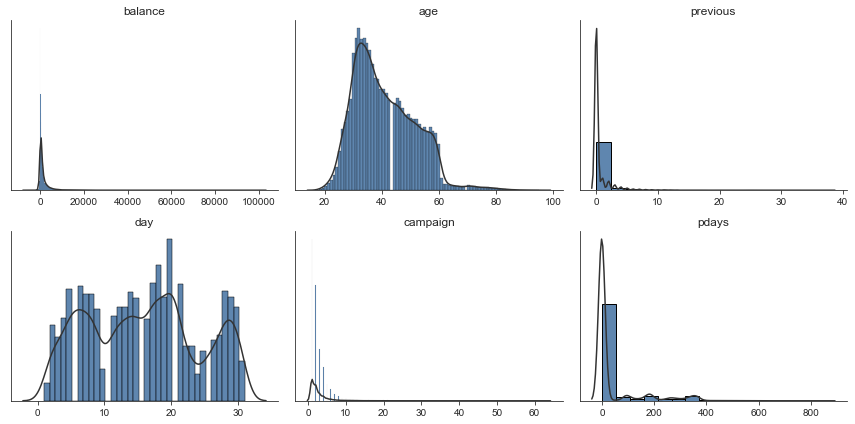

In [10]:
# plot the distributions of numerical variables

distplots(input_train[num]) 

plt.show()

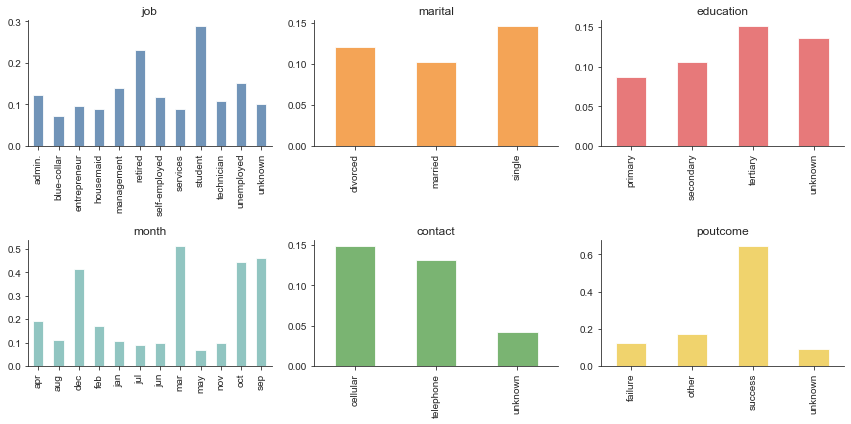

In [14]:
# plot the distributions of nominal variables

crosstabplots(input_train[nominal], input_train['subscribed']) 
plt.show()

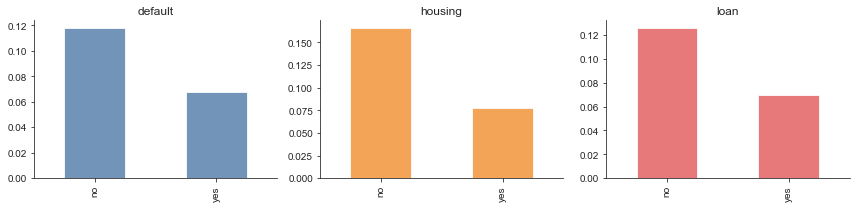

In [10]:
# plot the distributions of binary variables

crosstabplots(input_train[binary], input_train['subscribed']) 
plt.show()

<BarContainer object of 2 artists>

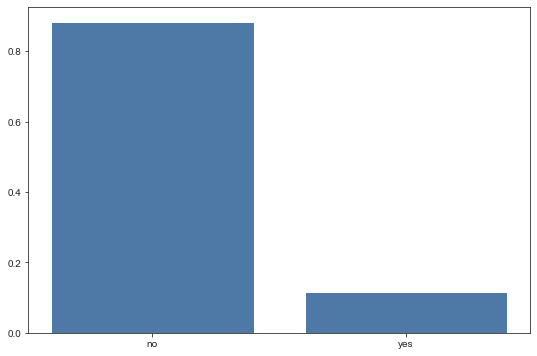

In [11]:
# plot the distribution of the response variable

df = input_train['subscribed'].value_counts(normalize=True)

plt.bar(df.index, df.values)

In [11]:
# manually encode the response variable in order to explore the dependency
input_train['subscribed'][input_train['subscribed'] == 'no'] = 0
input_train['subscribed'][input_train['subscribed'] == 'yes'] = 1
input_train['subscribed'] = input_train['subscribed'].astype('int')

<BarContainer object of 2 artists>

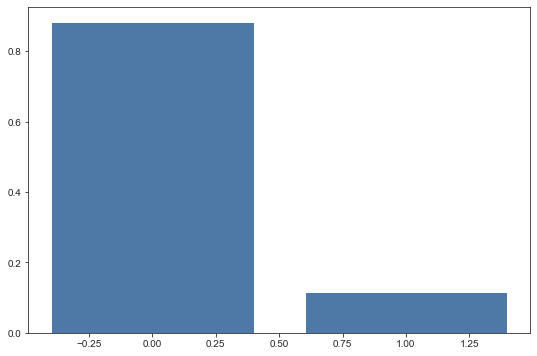

In [15]:
df = input_train['subscribed'].value_counts(normalize=True)

plt.bar(df.index, df.values)

## Dependence measure

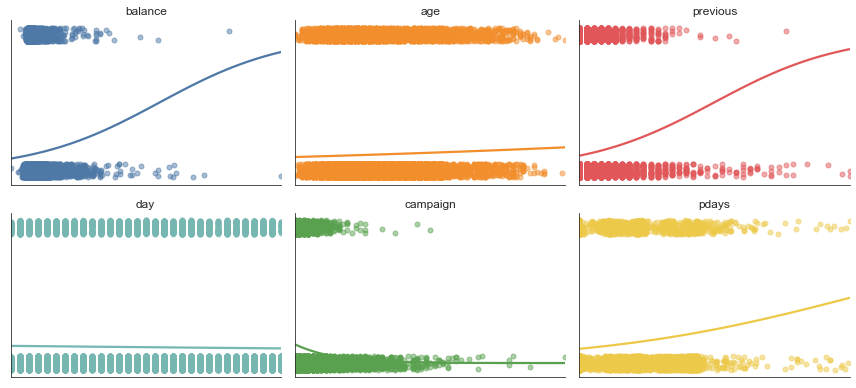

In [16]:
# plot the dependence measure of numerical variables

plot_logistic_regressions(input_train[num], input_train['subscribed'])
plt.show()

#### Mutual information

In [12]:
from sklearn.feature_selection import mutual_info_classif
# Mutual information of numerical features with the response variable
mi = mutual_info_classif(input_train[num], input_train['subscribed'], random_state=1)
results1 = pd.DataFrame(mi, index=num, columns=['MI'])

results1

,MI
balance,0.018625
age,0.010822
previous,0.012392
day,0.007684
campaign,0.005454
pdays,0.025774


In [13]:
from sklearn.preprocessing import OrdinalEncoder
# Mutual information of categorical features with the response variable
features = OrdinalEncoder().fit_transform(input_train[categorical_data])

mi = mutual_info_classif(features, input_train['subscribed'], n_neighbors=5, 
                         random_state=1, discrete_features=True)

results2 = pd.DataFrame(mi, index=categorical_data, columns=['MI'])

results2

,MI
job,0.008529
marital,0.001731
education,0.002644
month,0.023344
contact,0.013038
poutcome,0.027997
default,0.000247
housing,0.009283
loan,0.002309


In [14]:
# combine the results above

results = pd.concat([results1, results2], axis=0).sort_values(by='MI', ascending=False).round(4)
results.round(4)

,MI
poutcome,0.0280
pdays,0.0258
month,0.0233
balance,0.0186
contact,0.0130
previous,0.0124
age,0.0108
housing,0.0093
job,0.0085
day,0.0077


#### Ordinal encoding is suitable for tree-based methods
Tree-based models handle mixed data types in a natural way, while methods such as kNN make more sense when all the predictors are directly comparable.

Naive Bayes favors Ordinal encoding.

However, linear-based models such as logistic regression and SVM require scaling and one-hot encoding/ dummy encoding

We cant abstract missing values from above method. Of the 15 predictors, the missing values are not generally presented by NaN, therefore, a detail of how those are consisted will be presented

# 2. Feature engeering

---

## 2.1 transform data

In [9]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.glmm import GLMMEncoder
from category_encoders.cat_boost import CatBoostEncoder

def featureEngineering(data,transformation = True, dummies = False, Target = False, LeaveOneOut=False, JamesStein=False, GLMM=False, CatBoost=False):

    data = data.copy()
    

    # train test split
    index_train,index_valid = train_test_split(data.index,stratify=data[response],train_size=0.8,random_state=1)
    train = data.loc[index_train,:].copy()
    valid = data.loc[index_valid,:].copy()

 
    binary_features = []
    label = binary 
    for i in label:
        feature = pd.get_dummies(data[i],prefix=i,drop_first=True)
        data = data.join(feature)
        binary_features += list(feature.columns)

    # nominal features 
    #       - dummies
    if dummies:
        nominal_features = []
        for i in nominal:
            feature = pd.get_dummies(data[i],prefix=i,drop_first=True)
            data = data.join(feature)
            nominal_features += list(feature.columns)

    #       - TargetEncoder
    if Target:
        encoder = TargetEncoder().fit(train[nominal], train[response])
        data[nominal] = encoder.transform(data[nominal])
        nominal_features = nominal

    #       - LeaveOneOutEncoder
    if LeaveOneOut:
        encoder = LeaveOneOutEncoder().fit(train[nominal], train[response])
        data[nominal] = encoder.transform(data[nominal])
        nominal_features = nominal
    
    #       - JamesSteinEncoder
    if JamesStein:
        encoder = JamesSteinEncoder().fit(train[nominal], train[response])
        data[nominal] = encoder.transform(data[nominal])
        nominal_features = nominal        
    
    #       - GLMMEncoder
    if GLMM:
        encoder = GLMMEncoder().fit(train[nominal], train[response])
        data[nominal] = encoder.transform(data[nominal])
        nominal_features = nominal     

    #       - CatBoostEncoder
    if CatBoost:
        encoder = CatBoostEncoder().fit(train[nominal], train[response])
        data[nominal] = encoder.transform(data[nominal])
        nominal_features = nominal


    #Yeo-Johnsom transformation for continuous data
    if transformation:
        yj_transf = PowerTransformer(method='yeo-johnson').fit(data.loc[index_train,num])
        data[num] = yj_transf.transform(data[num])

    # standardlize continuous data
    scaler = StandardScaler().fit(data.loc[index_train,num])
    data[num] = scaler.transform(data[num])

    predictor = num + binary_features + nominal_features

    X_train = data.loc[index_train,predictor]
    X_valid = data.loc[index_valid,predictor]

    y_train = data.loc[index_train,response]
    y_valid = data.loc[index_valid,response]

    return X_train, np.ravel(y_train), X_valid, np.ravel(y_valid), predictor

X_train, y_train, X_valid, y_valid, predictor = featureEngineering(input_train,dummies=True)

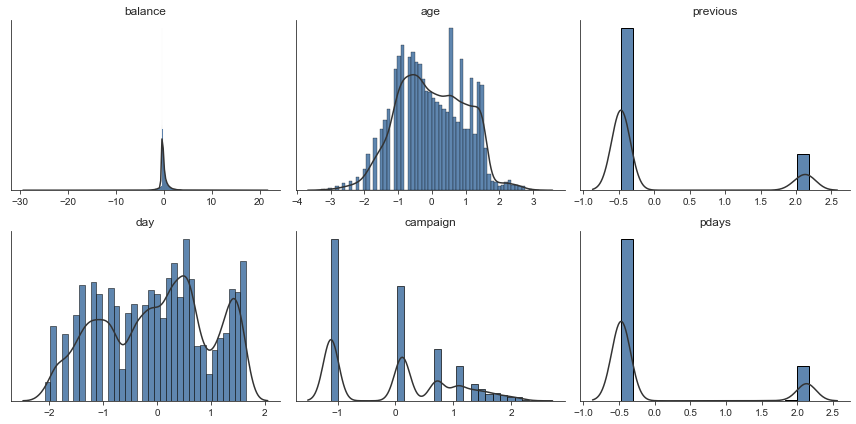

In [16]:
# plot the distributions after transformation

distplots(X_train[num]) 
plt.show()

### Transform Bank_test.csv

In [24]:
def featureEngineering2(data,transformation = True, dummies = False, Target = False, LeaveOneOut=False, JamesStein=False, GLMM=False, CatBoost=False):

    data = data.copy()
 
    binary_features = []
    label = binary 
    for i in label:
        feature = pd.get_dummies(data[i],prefix=i,drop_first=True)
        data = data.join(feature)
        binary_features += list(feature.columns)

    # nominal features 
    #       - dummies
    if dummies:
        nominal_features = []
        for i in nominal:
            feature = pd.get_dummies(data[i],prefix=i,drop_first=True)
            data = data.join(feature)
            nominal_features += list(feature.columns)

    # standardlize continuous data
    data[num] = StandardScaler().fit_transform(data[num])
    
    predictor = num + binary_features + nominal_features

    train_predictor = data.loc[:,predictor]

    return train_predictor

test_predictor = featureEngineering2(input_test,dummies=True)

test_predictor

,balance,age,previous,day,campaign,pdays,default_yes,housing_yes,loan_yes,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,-0.283100,0.190702,2.205948,0.517065,-0.237673,2.200954,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.260123,1.133252,-0.199151,0.396729,-0.572305,-0.413358,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.215811,-1.223123,-0.199151,0.637401,-0.572305,-0.413358,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
3,0.383561,0.567722,0.144435,-0.565963,-0.572305,3.240737,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.007723,-0.374828,-0.199151,-0.806636,-0.572305,-0.413358,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,-0.349406,0.850487,-0.199151,-0.926972,2.439386,-0.413358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15820,-0.442955,-0.940358,-0.199151,-0.565963,0.766224,-0.413358,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
15821,-0.449191,0.567722,-0.199151,0.637401,0.096960,-0.413358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15822,0.000830,1.793038,-0.199151,1.720429,2.439386,-0.413358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 3 Modelling and Methodology

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, log_loss
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from optuna.samplers import TPESampler
import optuna
from sklearn.model_selection import GridSearchCV

### 3.1 Logistic Regression Model

In [19]:
import optuna
from sklearn import linear_model

def objective_lr(trial):

    # Suggest hyperparamter
    C = trial.suggest_float("C", 0.1,1,step = 0.1)
    
    classifier_obj = linear_model.LogisticRegression(C=C)
    
    score = cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5, scoring= 'roc_auc').mean()
    
    return score

study_lr = optuna.create_study(direction="maximize")
study_lr.optimize(objective_lr, n_trials=100)

[I 2021-11-12 09:30:01,182] A new study created in memory with name: no-name-541e3863-5eb0-4ae6-bfd6-7269a478c80a
[I 2021-11-12 09:30:05,181] Trial 0 finished with value: 0.7618246282955073 and parameters: {'C': 0.9}. Best is trial 0 with value: 0.7618246282955073.
[I 2021-11-12 09:30:07,452] Trial 1 finished with value: 0.7622251699390233 and parameters: {'C': 0.2}. Best is trial 1 with value: 0.7622251699390233.
[I 2021-11-12 09:30:08,225] Trial 2 finished with value: 0.7624185703774303 and parameters: {'C': 0.1}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:08,964] Trial 3 finished with value: 0.7624185703774303 and parameters: {'C': 0.1}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:09,862] Trial 4 finished with value: 0.7618568669484704 and parameters: {'C': 0.6}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:10,766] Trial 5 finished with value: 0.7618525715755877 and parameters: {'C': 0.7000000000000001}. Best is

[I 2021-11-12 09:30:45,359] Trial 48 finished with value: 0.7620633064716398 and parameters: {'C': 0.30000000000000004}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:46,040] Trial 49 finished with value: 0.7624185703774303 and parameters: {'C': 0.1}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:46,914] Trial 50 finished with value: 0.7622251699390233 and parameters: {'C': 0.2}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:47,547] Trial 51 finished with value: 0.7624185703774303 and parameters: {'C': 0.1}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:48,245] Trial 52 finished with value: 0.7624185703774303 and parameters: {'C': 0.1}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:48,928] Trial 53 finished with value: 0.7624185703774303 and parameters: {'C': 0.1}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:30:49,752] Trial 54 finished with value: 0.762225

[I 2021-11-12 09:31:23,965] Trial 98 finished with value: 0.7622251699390233 and parameters: {'C': 0.2}. Best is trial 2 with value: 0.7624185703774303.
[I 2021-11-12 09:31:24,643] Trial 99 finished with value: 0.7624185703774303 and parameters: {'C': 0.1}. Best is trial 2 with value: 0.7624185703774303.


In [20]:
# Getting the best trial:
print(f"The best trial is : \n{study_lr.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_lr.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_lr.best_params}")

params_lr = study_lr.best_params

The best trial is : 
FrozenTrial(number=2, values=[0.7624185703774303], datetime_start=datetime.datetime(2021, 11, 12, 9, 30, 7, 454533), datetime_complete=datetime.datetime(2021, 11, 12, 9, 30, 8, 225384), params={'C': 0.1}, distributions={'C': DiscreteUniformDistribution(high=1.0, low=0.1, q=0.1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=2, state=TrialState.COMPLETE, value=None)
The best value is : 
0.7624185703774303
The best parameters are : 
{'C': 0.1}


In [21]:
logistic = LogisticRegression(**params_lr)

logistic.fit(X_train, y_train)

scores_train_lr = cross_val_score(logistic, X_train, y_train, cv = 10, scoring = 'roc_auc')
print('Training set roc_auc: {}'.format(np.mean(scores_train_lr)))

# Validation set 'roc_auc' score
prob_lr = logistic.predict_proba(X_valid)[:,1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_lr)))

Training set roc_auc: 0.7628884532771126
Validation set roc_auc: 0.7541050544428015


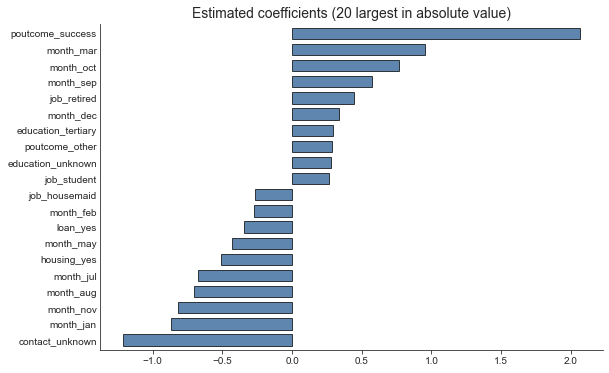

In [66]:
# Logistic coefficient plot for insight discussion
feature_names = list(X_train.columns)

coefplot(logistic, feature_names)
plt.show()

### 3.1.2 Lasso regression 

In [17]:
from sklearn.linear_model import LogisticRegressionCV

logit_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', scoring='roc_auc')
logit_l1.fit(X_train, y_train)

#scores_train_lasso = cross_val_score(logit_l1, X_train, y_train, cv = 10, scoring = 'roc_auc')
#print('Training set roc_auc: {}'.format(np.mean(scores_train_lasso)))

# Validation set 'roc_auc' score
prob_lr = logit_l1.predict_proba(X_valid)[:,1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_lr)))

Validation set roc_auc: 0.7535258995384685


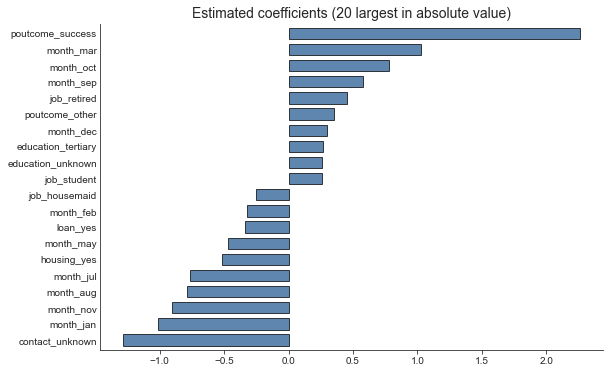

In [19]:
# Lasso coefficient plot for insight discussion
from tutorial4 import coefplot
coefplot(logit_l1, feature_names)
plt.show()

### 3.1.3 Ridge regression 

In [20]:
logit_l2 = LogisticRegressionCV(penalty='l2', solver='lbfgs', scoring='roc_auc')
logit_l2.fit(X_train, y_train)
#scores_train_ridge = cross_val_score(logit_l2, X_train, y_train, cv = 10, scoring = 'roc_auc')
#print('Training set roc_auc: {}'.format(np.mean(scores_train_lasso)))

# Validation set 'roc_auc' score
prob_lr = logit_l2.predict_proba(X_valid)[:,1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_lr)))

Validation set roc_auc: 0.7530934937491598


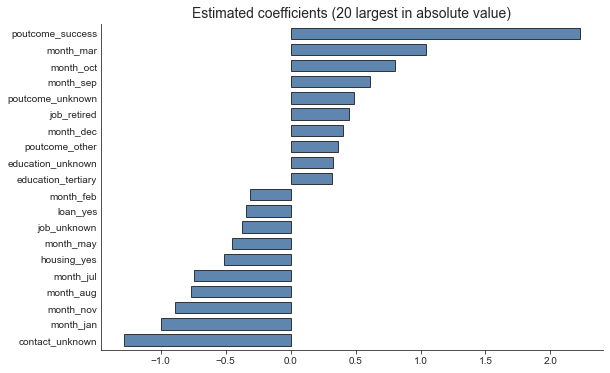

In [21]:
# Ridge coefficient plot for insight discussion

coefplot(logit_l2, feature_names)
plt.show()

### 3.2 Random Forest Model

In [45]:
def objective_rfc(trial):

    # Suggest hyperparamter
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 600)
    rf_criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    rf_max_features = trial.suggest_int('max_features', 1, 10)
    rf_min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    
    classifier_obj = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion, max_features=rf_max_features, min_samples_leaf=rf_min_samples_leaf)
    
    
    score = cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5, scoring= 'roc_auc').mean()
    
    return score

study_rfc = optuna.create_study(direction="maximize")
study_rfc.optimize(objective_rfc, n_trials=20, timeout=120)

[I 2021-11-11 16:18:14,079] A new study created in memory with name: no-name-626a62da-255a-48fe-820b-6dd58414493f
[I 2021-11-11 16:18:16,595] Trial 0 finished with value: 0.7684563533241267 and parameters: {'rf_n_estimators': 161, 'criterion': 'entropy', 'max_features': 1, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.7684563533241267.
[I 2021-11-11 16:18:25,748] Trial 1 finished with value: 0.7853213105343353 and parameters: {'rf_n_estimators': 338, 'criterion': 'entropy', 'max_features': 5, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.7853213105343353.
[I 2021-11-11 16:18:29,470] Trial 2 finished with value: 0.7828076946407299 and parameters: {'rf_n_estimators': 216, 'criterion': 'entropy', 'max_features': 1, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7853213105343353.
[I 2021-11-11 16:18:38,075] Trial 3 finished with value: 0.7883217208843982 and parameters: {'rf_n_estimators': 225, 'criterion': 'entropy', 'max_features': 8, 'min_samples_leaf': 20}. Bes

In [46]:
# Getting the best trial:
print(f"The best trial is : \n{study_rfc.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_rfc.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_rfc.best_params}")

params_rfc = study_rfc.best_params

The best trial is : 
FrozenTrial(number=12, values=[0.7886779590471946], datetime_start=datetime.datetime(2021, 11, 11, 16, 19, 58, 343236), datetime_complete=datetime.datetime(2021, 11, 11, 16, 20, 25, 768378), params={'rf_n_estimators': 575, 'criterion': 'entropy', 'max_features': 7, 'min_samples_leaf': 5}, distributions={'rf_n_estimators': IntUniformDistribution(high=600, low=100, step=1), 'criterion': CategoricalDistribution(choices=('entropy', 'gini')), 'max_features': IntUniformDistribution(high=10, low=1, step=1), 'min_samples_leaf': IntUniformDistribution(high=20, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=12, state=TrialState.COMPLETE, value=None)
The best value is : 
0.7886779590471946
The best parameters are : 
{'rf_n_estimators': 575, 'criterion': 'entropy', 'max_features': 7, 'min_samples_leaf': 5}


In [47]:
random_fc = RandomForestClassifier(n_estimators=575,random_state=48,criterion='entropy', max_features= 7, min_samples_leaf=5)

random_fc.fit(X_train, y_train)

score_train_rfc = cross_val_score(random_fc,X_train,y_train,cv=10,scoring = 'roc_auc').mean()
print('Training set roc_auc: {}'.format(score_train_rfc))

# Validation set 'roc_auc' score
prob_rfc = random_fc.predict_proba(X_valid)[:, 1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_rfc)))

Training set roc_auc: 0.7888943264809105
Validation set roc_auc: 0.7886975175874893


### 3.3 Model Stacking

In [28]:
RANDOM_SEED = 48
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr,random_state=RANDOM_SEED)
#print('10-fold cross validation:\n')
#for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Random Forest', 'Naive Bayes','StackingClassifier']):
    #scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    #print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


In [30]:
sclf.fit(X_train, y_train)
prob_sclf = sclf.predict_proba(X_valid)[:, 1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_sclf)))

Validation set roc_auc: 0.6716418537437828


### 3.4 Gradient Boosting Decision Tree (GBDT)

In [11]:
def objective_GBDT(trial):

    # Suggest hyperparamter
    GBDT_n_estimators = trial.suggest_int("GBDT_n_estimators", 500, 1500)
    GBDT_max_depth = trial.suggest_int("GBDT_max_depth", 3, 10, log=True)
    GBDT_learning_rate = trial.suggest_float("GBDT_learning_rate", 0.01, 0.1)
    
    classifier_obj = GradientBoostingClassifier(n_estimators=GBDT_n_estimators, learning_rate=GBDT_learning_rate, max_depth=GBDT_max_depth)
    
    
    score = cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5, scoring= 'roc_auc').mean()
    
    return score

study_GBDT = optuna.create_study(direction="maximize")
study_GBDT.optimize(objective_GBDT, n_trials=20)

[I 2021-11-12 17:12:07,601] A new study created in memory with name: no-name-29a2ea84-3df8-4b84-9f7b-21ac6bbe46a6
[I 2021-11-12 17:12:38,281] Trial 0 finished with value: 0.7917007434976003 and parameters: {'GBDT_n_estimators': 610, 'GBDT_max_depth': 3, 'GBDT_learning_rate': 0.08254039123765496}. Best is trial 0 with value: 0.7917007434976003.
[I 2021-11-12 17:16:09,464] Trial 1 finished with value: 0.7517921270260995 and parameters: {'GBDT_n_estimators': 1375, 'GBDT_max_depth': 9, 'GBDT_learning_rate': 0.04851803144076336}. Best is trial 0 with value: 0.7917007434976003.


In [12]:
# Getting the best trial:
print(f"The best trial is : \n{study_GBDT.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_GBDT.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_GBDT.best_params}")

params_GBDT = study_GBDT.best_params

The best trial is : 
FrozenTrial(number=0, values=[0.7917007434976003], datetime_start=datetime.datetime(2021, 11, 12, 17, 12, 7, 605153), datetime_complete=datetime.datetime(2021, 11, 12, 17, 12, 38, 280627), params={'GBDT_n_estimators': 610, 'GBDT_max_depth': 3, 'GBDT_learning_rate': 0.08254039123765496}, distributions={'GBDT_n_estimators': IntUniformDistribution(high=1500, low=500, step=1), 'GBDT_max_depth': IntLogUniformDistribution(high=10, low=3, step=1), 'GBDT_learning_rate': UniformDistribution(high=0.1, low=0.01)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)
The best value is : 
0.7917007434976003
The best parameters are : 
{'GBDT_n_estimators': 610, 'GBDT_max_depth': 3, 'GBDT_learning_rate': 0.08254039123765496}


In [13]:
GBDT = GradientBoostingClassifier(n_estimators=859, learning_rate=0.027048666093257498, max_depth=3, random_state=1)

GBDT.fit(X_train, y_train)

#score_train_GBDT = cross_val_score(GBDT,X_train,y_train,cv=10,scoring = 'roc_auc').mean()
#print('Training set roc_auc: {}'.format(score_train_GBDT))

# Validation set 'roc_auc' score
prob_GBDT = GBDT.predict_proba(X_valid)[:, 1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_GBDT)))

Validation set roc_auc: 0.7917090950844647


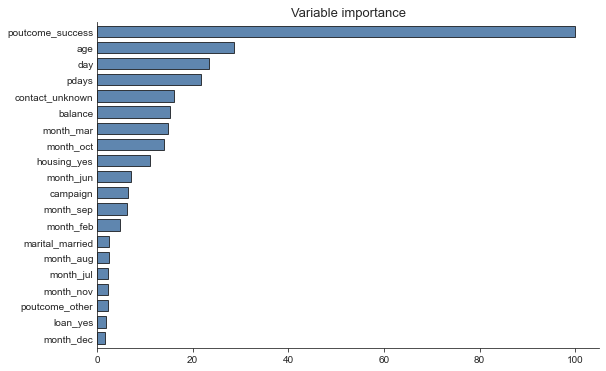

In [14]:
# plot the feature importance of GBDT model

feature_names = list(X_train.columns)
plot_feature_importance(GBDT, feature_names)
plt.show()

### 3.5 LightGBM model

In [13]:
def objective_lgbm(trial):
    
    params = {
    'boosting_type': 'gbdt',
    'n_estimator' : trial.suggest_int('n_estimator', 500, 1500),
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5), 
    'max_depth': trial.suggest_int('max_depth', 1, 8),
    'num_leaves': trial.suggest_int('num_leaves', 1, 50),
    'lambda_l1': trial.suggest_loguniform('lambda_l1',  1e-8, 1), 
    'lambda_l2': trial.suggest_loguniform('lambda_l2',  1e-8, 1), 
    'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
    'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
    'feature_fraction':  trial.suggest_uniform('feature_fraction', 0.5, 1.0),
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 128), 
     }
    
    model = lgb.LGBMClassifier(**params, num_boost_round=500, random_state=48)
    
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'roc_auc').mean()
    
    return scores

sampler = TPESampler(seed = 42) 
study_lgbm = optuna.create_study(direction='maximize', sampler=sampler)
study_lgbm.optimize(objective_lgbm, n_trials=200)  

[I 2021-11-11 22:51:44,556] A new study created in memory with name: no-name-99820a84-6846-4949-90fc-aeca46d65146


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8005575058716043, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8005575058716043
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] lambda_l1 is set=1.77071686435378e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.77071686435378e-07
[LightGBM] [Warning] bagging_fraction is set=0.6232334448672797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6232334448672797
[LightGBM] [Warning] lambda_l2 is set=1.7699302940633311e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7699302940633311e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:51:51,789] Trial 0 finished with value: 0.7264585566480362 and parameters: {'n_estimator': 874, 'learning_rate': 0.4758500101408589, 'max_depth': 6, 'num_leaves': 30, 'lambda_l1': 1.77071686435378e-07, 'lambda_l2': 1.7699302940633311e-07, 'bagging_fraction': 0.6232334448672797, 'bagging_freq': 7, 'feature_fraction': 0.8005575058716043, 'min_data_in_leaf': 91, 'min_split_gain': 0}. Best is trial 0 with value: 0.7264585566480362.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7159725093210578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159725093210578
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] lambda_l1 is set=2.8483918709107956e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8483918709107956e-07
[LightGBM] [Warning] bagging_fraction is set=0.7216968971838151, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7216968971838151
[LightGBM] [Warning] lambda_l2 is set=2.9324868872723725e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9324868872723725e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-11 22:51:56,217] Trial 1 finished with value: 0.732836217788976 and parameters: {'n_estimator': 520, 'learning_rate': 0.48525582755937724, 'max_depth': 7, 'num_leaves': 11, 'lambda_l1': 2.8483918709107956e-07, 'lambda_l2': 2.9324868872723725e-07, 'bagging_fraction': 0.7216968971838151, 'bagging_freq': 4, 'feature_fraction': 0.7159725093210578, 'min_data_in_leaf': 38, 'min_split_gain': 0}. Best is trial 1 with value: 0.732836217788976.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7962072844310213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7962072844310213
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] lambda_l1 is set=4.452048365748842e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.452048365748842e-05
[LightGBM] [Warning] bagging_fraction is set=0.6798695128633439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6798695128633439
[LightGBM] [Warning] lambda_l2 is set=0.019116469627784252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019116469627784252
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:52:01,272] Trial 2 finished with value: 0.7882678548272666 and parameters: {'n_estimator': 1112, 'learning_rate': 0.0783519917195005, 'max_depth': 3, 'num_leaves': 19, 'lambda_l1': 4.452048365748842e-05, 'lambda_l2': 0.019116469627784252, 'bagging_fraction': 0.6798695128633439, 'bagging_freq': 4, 'feature_fraction': 0.7962072844310213, 'min_data_in_leaf': 6, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8421165132560784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8421165132560784
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l1 is set=0.530953226900921, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.530953226900921
[LightGBM] [Warning] bagging_fraction is set=0.7218455076693483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7218455076693483
[LightGBM] [Warning] lambda_l2 is set=0.02932100047183291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02932100047183291
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:52:03,337] Trial 3 finished with value: 0.7773927856391107 and parameters: {'n_estimator': 1108, 'learning_rate': 0.09355682060677284, 'max_depth': 1, 'num_leaves': 48, 'lambda_l1': 0.530953226900921, 'lambda_l2': 0.02932100047183291, 'bagging_fraction': 0.7218455076693483, 'bagging_freq': 1, 'feature_fraction': 0.8421165132560784, 'min_data_in_leaf': 57, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7733551396716398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7733551396716398
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=1.1755466083160747e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1755466083160747e-06
[LightGBM] [Warning] bagging_fraction is set=0.7246844304357644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7246844304357644
[LightGBM] [Warning] lambda_l2 is set=0.0019960815242513743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019960815242513743
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-11 22:52:05,741] Trial 4 finished with value: 0.7757143554246362 and parameters: {'n_estimator': 622, 'learning_rate': 0.2526366859545224, 'max_depth': 1, 'num_leaves': 46, 'lambda_l1': 1.1755466083160747e-06, 'lambda_l2': 0.0019960815242513743, 'bagging_fraction': 0.7246844304357644, 'bagging_freq': 4, 'feature_fraction': 0.7733551396716398, 'min_data_in_leaf': 24, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.522613644455269, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.522613644455269
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] lambda_l1 is set=0.0006070155694141794, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006070155694141794
[LightGBM] [Warning] bagging_fraction is set=0.6353970008207678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6353970008207678
[LightGBM] [Warning] lambda_l2 is set=0.23713402899336497, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23713402899336497
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:52:18,833] Trial 5 finished with value: 0.7322486139687643 and parameters: {'n_estimator': 1470, 'learning_rate': 0.38981508344694615, 'max_depth': 8, 'num_leaves': 45, 'lambda_l1': 0.0006070155694141794, 'lambda_l2': 0.23713402899336497, 'bagging_fraction': 0.6353970008207678, 'bagging_freq': 2, 'feature_fraction': 0.522613644455269, 'min_data_in_leaf': 42, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5372753218398854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5372753218398854
[LightGBM] [Warning] min_data_in_leaf is set=127, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=127
[LightGBM] [Warning] lambda_l1 is set=1.7679748286442581e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7679748286442581e-06
[LightGBM] [Warning] bagging_fraction is set=0.6563696899899051, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6563696899899051
[LightGBM] [Warning] lambda_l2 is set=0.0002195678075127562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002195678075127562
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-11 22:52:29,045] Trial 6 finished with value: 0.7703704543692798 and parameters: {'n_estimator': 889, 'learning_rate': 0.142961025569209, 'max_depth': 7, 'num_leaves': 18, 'lambda_l1': 1.7679748286442581e-06, 'lambda_l2': 0.0002195678075127562, 'bagging_fraction': 0.6563696899899051, 'bagging_freq': 6, 'feature_fraction': 0.5372753218398854, 'min_data_in_leaf': 127, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6792328642721364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6792328642721364
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] lambda_l1 is set=0.0045170900739091345, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0045170900739091345
[LightGBM] [Warning] bagging_fraction is set=0.9085081386743783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9085081386743783
[LightGBM] [Warning] lambda_l2 is set=0.006792933207180863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006792933207180863
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:52:33,280] Trial 7 finished with value: 0.7772345419618544 and parameters: {'n_estimator': 1273, 'learning_rate': 0.10737068395174447, 'max_depth': 1, 'num_leaves': 41, 'lambda_l1': 0.0045170900739091345, 'lambda_l2': 0.006792933207180863, 'bagging_fraction': 0.9085081386743783, 'bagging_freq': 1, 'feature_fraction': 0.6792328642721364, 'min_data_in_leaf': 15, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9436063712881633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9436063712881633
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] lambda_l1 is set=3.075095259104445e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.075095259104445e-06
[LightGBM] [Warning] bagging_fraction is set=0.8918424713352255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8918424713352255
[LightGBM] [Warning] lambda_l2 is set=3.994538177154855e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.994538177154855e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:52:37,566] Trial 8 finished with value: 0.7812535353106345 and parameters: {'n_estimator': 1363, 'learning_rate': 0.3154160821455034, 'max_depth': 3, 'num_leaves': 4, 'lambda_l1': 3.075095259104445e-06, 'lambda_l2': 3.994538177154855e-06, 'bagging_fraction': 0.8918424713352255, 'bagging_freq': 5, 'feature_fraction': 0.9436063712881633, 'min_data_in_leaf': 61, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5127095633720475, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5127095633720475
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] lambda_l1 is set=0.014714226590398758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014714226590398758
[LightGBM] [Warning] bagging_fraction is set=0.8090931317527976, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8090931317527976
[LightGBM] [Warning] lambda_l2 is set=8.919998285789817e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.919998285789817e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:52:46,691] Trial 9 finished with value: 0.7295181895909703 and parameters: {'n_estimator': 619, 'learning_rate': 0.35948994573926757, 'max_depth': 7, 'num_leaves': 29, 'lambda_l1': 0.014714226590398758, 'lambda_l2': 8.919998285789817e-05, 'bagging_fraction': 0.8090931317527976, 'bagging_freq': 3, 'feature_fraction': 0.5127095633720475, 'min_data_in_leaf': 14, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9734809381950746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9734809381950746
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] lambda_l1 is set=5.2470173718162845e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.2470173718162845e-05
[LightGBM] [Warning] bagging_fraction is set=0.983908298378168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.983908298378168
[LightGBM] [Warning] lambda_l2 is set=0.18252332105365732, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18252332105365732
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:52:51,975] Trial 10 finished with value: 0.7879403843158632 and parameters: {'n_estimator': 1089, 'learning_rate': 0.012938619648350358, 'max_depth': 4, 'num_leaves': 18, 'lambda_l1': 5.2470173718162845e-05, 'lambda_l2': 0.18252332105365732, 'bagging_fraction': 0.983908298378168, 'bagging_freq': 5, 'feature_fraction': 0.9734809381950746, 'min_data_in_leaf': 90, 'min_split_gain': 0}. Best is trial 2 with value: 0.7882678548272666.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9743047347372709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9743047347372709
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] lambda_l1 is set=6.049396535434001e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.049396535434001e-05
[LightGBM] [Warning] bagging_fraction is set=0.996380128364447, subsample=1.0 will be ignored. Current value: bagging_fraction=0.996380128364447
[LightGBM] [Warning] lambda_l2 is set=0.4839101568120109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4839101568120109
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:52:57,046] Trial 11 finished with value: 0.7890317554804804 and parameters: {'n_estimator': 1132, 'learning_rate': 0.014435617855859978, 'max_depth': 4, 'num_leaves': 19, 'lambda_l1': 6.049396535434001e-05, 'lambda_l2': 0.4839101568120109, 'bagging_fraction': 0.996380128364447, 'bagging_freq': 5, 'feature_fraction': 0.9743047347372709, 'min_data_in_leaf': 91, 'min_split_gain': 0}. Best is trial 11 with value: 0.7890317554804804.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9234980616943329, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9234980616943329
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] lambda_l1 is set=0.00016117122703530897, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016117122703530897
[LightGBM] [Warning] bagging_fraction is set=0.8068005390606676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8068005390606676
[LightGBM] [Warning] lambda_l2 is set=0.9001737764139106, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9001737764139106
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:53:00,547] Trial 12 finished with value: 0.7820086766705239 and parameters: {'n_estimator': 1208, 'learning_rate': 0.013360550270825314, 'max_depth': 3, 'num_leaves': 20, 'lambda_l1': 0.00016117122703530897, 'lambda_l2': 0.9001737764139106, 'bagging_fraction': 0.8068005390606676, 'bagging_freq': 5, 'feature_fraction': 0.9234980616943329, 'min_data_in_leaf': 96, 'min_split_gain': 0}. Best is trial 11 with value: 0.7890317554804804.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6333047158717455, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6333047158717455
[LightGBM] [Warning] min_data_in_leaf is set=113, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=113
[LightGBM] [Warning] lambda_l1 is set=2.209735675327203e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.209735675327203e-05
[LightGBM] [Warning] bagging_fraction is set=0.9903365350212218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9903365350212218
[LightGBM] [Warning] lambda_l2 is set=0.020836415978918575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020836415978918575
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:53:07,990] Trial 13 finished with value: 0.7691920125821274 and parameters: {'n_estimator': 938, 'learning_rate': 0.2060611214431496, 'max_depth': 5, 'num_leaves': 34, 'lambda_l1': 2.209735675327203e-05, 'lambda_l2': 0.020836415978918575, 'bagging_fraction': 0.9903365350212218, 'bagging_freq': 3, 'feature_fraction': 0.6333047158717455, 'min_data_in_leaf': 113, 'min_split_gain': 0}. Best is trial 11 with value: 0.7890317554804804.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8737275759518561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8737275759518561
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] lambda_l1 is set=0.0034511950337255785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034511950337255785
[LightGBM] [Warning] bagging_fraction is set=0.8789782568256649, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8789782568256649
[LightGBM] [Warning] lambda_l2 is set=0.0004111950175583553, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004111950175583553
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:53:13,662] Trial 14 finished with value: 0.7899326403483087 and parameters: {'n_estimator': 1056, 'learning_rate': 0.08178663075923115, 'max_depth': 3, 'num_leaves': 9, 'lambda_l1': 0.0034511950337255785, 'lambda_l2': 0.0004111950175583553, 'bagging_fraction': 0.8789782568256649, 'bagging_freq': 7, 'feature_fraction': 0.8737275759518561, 'min_data_in_leaf': 74, 'min_split_gain': 0}. Best is trial 14 with value: 0.7899326403483087.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8818736974574265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8818736974574265
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] lambda_l1 is set=1.091241709418957e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.091241709418957e-08
[LightGBM] [Warning] bagging_fraction is set=0.9089810626910786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9089810626910786
[LightGBM] [Warning] lambda_l2 is set=1.4699702043097819e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4699702043097819e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-11 22:53:17,352] Trial 15 finished with value: 0.7890146324009069 and parameters: {'n_estimator': 767, 'learning_rate': 0.18461425182016689, 'max_depth': 4, 'num_leaves': 4, 'lambda_l1': 1.091241709418957e-08, 'lambda_l2': 1.4699702043097819e-08, 'bagging_fraction': 0.9089810626910786, 'bagging_freq': 7, 'feature_fraction': 0.8818736974574265, 'min_data_in_leaf': 74, 'min_split_gain': 0}. Best is trial 14 with value: 0.7899326403483087.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9987673570646978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9987673570646978
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] lambda_l1 is set=0.09226224313222707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09226224313222707
[LightGBM] [Warning] bagging_fraction is set=0.857197812036363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.857197812036363
[LightGBM] [Warning] lambda_l2 is set=0.00022557870020924314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00022557870020924314
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:53:21,268] Trial 16 finished with value: 0.7921421115543683 and parameters: {'n_estimator': 1035, 'learning_rate': 0.05814278292560382, 'max_depth': 2, 'num_leaves': 11, 'lambda_l1': 0.09226224313222707, 'lambda_l2': 0.00022557870020924314, 'bagging_fraction': 0.857197812036363, 'bagging_freq': 6, 'feature_fraction': 0.9987673570646978, 'min_data_in_leaf': 78, 'min_split_gain': 0}. Best is trial 16 with value: 0.7921421115543683.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8811053510659803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8811053510659803
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] lambda_l1 is set=0.6462004895283169, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6462004895283169
[LightGBM] [Warning] bagging_fraction is set=0.8633715154027569, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8633715154027569
[LightGBM] [Warning] lambda_l2 is set=5.685519352190073e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.685519352190073e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:53:24,589] Trial 17 finished with value: 0.7898580979881096 and parameters: {'n_estimator': 756, 'learning_rate': 0.1559053241585893, 'max_depth': 2, 'num_leaves': 9, 'lambda_l1': 0.6462004895283169, 'lambda_l2': 5.685519352190073e-05, 'bagging_fraction': 0.8633715154027569, 'bagging_freq': 6, 'feature_fraction': 0.8811053510659803, 'min_data_in_leaf': 74, 'min_split_gain': 0}. Best is trial 16 with value: 0.7921421115543683.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9996445339580691, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9996445339580691
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] lambda_l1 is set=0.05766627480786343, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05766627480786343
[LightGBM] [Warning] bagging_fraction is set=0.8575020138109825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8575020138109825
[LightGBM] [Warning] lambda_l2 is set=0.0006761718408214543, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006761718408214543
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:53:27,710] Trial 18 finished with value: 0.7923687369712431 and parameters: {'n_estimator': 1000, 'learning_rate': 0.06332519848271087, 'max_depth': 2, 'num_leaves': 11, 'lambda_l1': 0.05766627480786343, 'lambda_l2': 0.0006761718408214543, 'bagging_fraction': 0.8575020138109825, 'bagging_freq': 7, 'feature_fraction': 0.9996445339580691, 'min_data_in_leaf': 74, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.
[W 2021-11-11 22:53:27,918] Trial 19 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9969213925248543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9969213925248543
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] lambda_l1 is set=0.06816138180960846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06816138180960846
[LightGBM] [Warning] bagging_fraction is set=0.8427736551244998, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8427736551244998
[LightGBM] [Warning] lambda_l2 is set=1.263250068087966e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.263250068087966e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[W 2021-11-11 22:53:28,077] Trial 20 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9260813242112176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9260813242112176
[LightGBM] [Warning] min_data_in_leaf is set=108, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=108
[LightGBM] [Warning] lambda_l1 is set=0.06381709944061528, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06381709944061528
[LightGBM] [Warning] bagging_fraction is set=0.8440486208842255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8440486208842255
[LightGBM] [Warning] lambda_l2 is set=8.697477216368867e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.697477216368867e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9913842220836624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9913842220836624
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] lambda_l1 is set=0.11483414762260326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11483414762260326
[LightGBM] [Warning] bagging_fraction is set=0.8387540596841916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8387540596841916
[LightGBM] [Warning] lambda_l2 is set=1.46620180924578e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.46620180924578e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:53:31,072] Trial 21 finished with value: 0.7831453698486446 and parameters: {'n_estimator': 1002, 'learning_rate': 0.24755586787448597, 'max_depth': 2, 'num_leaves': 13, 'lambda_l1': 0.11483414762260326, 'lambda_l2': 1.46620180924578e-05, 'bagging_fraction': 0.8387540596841916, 'bagging_freq': 6, 'feature_fraction': 0.9913842220836624, 'min_data_in_leaf': 46, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.
[W 2021-11-11 22:53:31,240] Trial 22 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9208064623316446, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9208064623316446
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] lambda_l1 is set=0.05180930767831581, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05180930767831581
[LightGBM] [Warning] bagging_fraction is set=0.7712096267398227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7712096267398227
[LightGBM] [Warning] lambda_l2 is set=0.0011806031580191242, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011806031580191242
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9289162588973211, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9289162588973211
[LightGBM] [Warning] min_data_in_leaf is set=109, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=109
[LightGBM] [Warning] lambda_l1 is set=0.052814765445398655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.052814765445398655
[LightGBM] [Warning] bagging_fraction is set=0.9467471464166775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9467471464166775
[LightGBM] [Warning] lambda_l2 is set=2.4409567300095096e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4409567300095096e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:53:33,817] Trial 23 finished with value: 0.7729725140358542 and parameters: {'n_estimator': 797, 'learning_rate': 0.052539866527524376, 'max_depth': 2, 'num_leaves': 2, 'lambda_l1': 0.052814765445398655, 'lambda_l2': 2.4409567300095096e-06, 'bagging_fraction': 0.9467471464166775, 'bagging_freq': 6, 'feature_fraction': 0.9289162588973211, 'min_data_in_leaf': 109, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8762328698279819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8762328698279819
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] lambda_l1 is set=0.0019378047987230905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019378047987230905
[LightGBM] [Warning] bagging_fraction is set=0.7730342849709239, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7730342849709239
[LightGBM] [Warning] lambda_l2 is set=0.000666846579603407, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000666846579603407
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:53:36,665] Trial 24 finished with value: 0.7897638679290149 and parameters: {'n_estimator': 1007, 'learning_rate': 0.12138373876522002, 'max_depth': 2, 'num_leaves': 7, 'lambda_l1': 0.0019378047987230905, 'lambda_l2': 0.000666846579603407, 'bagging_fraction': 0.7730342849709239, 'bagging_freq': 7, 'feature_fraction': 0.8762328698279819, 'min_data_in_leaf': 74, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9879353189988965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9879353189988965
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] lambda_l1 is set=0.017446150374739552, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017446150374739552
[LightGBM] [Warning] bagging_fraction is set=0.8471706419357556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8471706419357556
[LightGBM] [Warning] lambda_l2 is set=0.0010407282069805645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010407282069805645
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:53:40,339] Trial 25 finished with value: 0.7911562961759865 and parameters: {'n_estimator': 1247, 'learning_rate': 0.06284584875348126, 'max_depth': 3, 'num_leaves': 13, 'lambda_l1': 0.017446150374739552, 'lambda_l2': 0.0010407282069805645, 'bagging_fraction': 0.8471706419357556, 'bagging_freq': 7, 'feature_fraction': 0.9879353189988965, 'min_data_in_leaf': 78, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.996495845670876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.996495845670876
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] lambda_l1 is set=0.027307170981021974, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027307170981021974
[LightGBM] [Warning] bagging_fraction is set=0.8437478616214997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8437478616214997
[LightGBM] [Warning] lambda_l2 is set=0.0019632151905208317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019632151905208317
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:53:43,234] Trial 26 finished with value: 0.7915463804018718 and parameters: {'n_estimator': 1242, 'learning_rate': 0.05526577736001719, 'max_depth': 2, 'num_leaves': 13, 'lambda_l1': 0.027307170981021974, 'lambda_l2': 0.0019632151905208317, 'bagging_fraction': 0.8437478616214997, 'bagging_freq': 7, 'feature_fraction': 0.996495845670876, 'min_data_in_leaf': 54, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9344649202084158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9344649202084158
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] lambda_l1 is set=0.1222063134882767, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1222063134882767
[LightGBM] [Warning] bagging_fraction is set=0.7827226650516397, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7827226650516397
[LightGBM] [Warning] lambda_l2 is set=0.003529414189564454, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003529414189564454
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:53:45,585] Trial 27 finished with value: 0.7771338041440441 and parameters: {'n_estimator': 1334, 'learning_rate': 0.17609231381281626, 'max_depth': 1, 'num_leaves': 23, 'lambda_l1': 0.1222063134882767, 'lambda_l2': 0.003529414189564454, 'bagging_fraction': 0.7827226650516397, 'bagging_freq': 6, 'feature_fraction': 0.9344649202084158, 'min_data_in_leaf': 53, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9455800564315221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9455800564315221
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] lambda_l1 is set=0.014816756688483526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014816756688483526
[LightGBM] [Warning] bagging_fraction is set=0.8249027582586268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8249027582586268
[LightGBM] [Warning] lambda_l2 is set=1.6014656670363854e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6014656670363854e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:53:48,321] Trial 28 finished with value: 0.7905301961650107 and parameters: {'n_estimator': 1173, 'learning_rate': 0.048164010081771194, 'max_depth': 2, 'num_leaves': 14, 'lambda_l1': 0.014816756688483526, 'lambda_l2': 1.6014656670363854e-05, 'bagging_fraction': 0.8249027582586268, 'bagging_freq': 7, 'feature_fraction': 0.9455800564315221, 'min_data_in_leaf': 62, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9986018041473455, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9986018041473455
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l1 is set=0.9688770957950649, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9688770957950649
[LightGBM] [Warning] bagging_fraction is set=0.9408593022802816, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9408593022802816
[LightGBM] [Warning] lambda_l2 is set=4.9787667503964337e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.9787667503964337e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:53:51,109] Trial 29 finished with value: 0.7879675618581252 and parameters: {'n_estimator': 1443, 'learning_rate': 0.222153805833477, 'max_depth': 2, 'num_leaves': 15, 'lambda_l1': 0.9688770957950649, 'lambda_l2': 4.9787667503964337e-05, 'bagging_fraction': 0.9408593022802816, 'bagging_freq': 6, 'feature_fraction': 0.9986018041473455, 'min_data_in_leaf': 32, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8351480408809634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8351480408809634
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] lambda_l1 is set=0.0006322201833597402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006322201833597402
[LightGBM] [Warning] bagging_fraction is set=0.754582902338559, subsample=1.0 will be ignored. Current value: bagging_fraction=0.754582902338559
[LightGBM] [Warning] lambda_l2 is set=0.007575792408689661, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007575792408689661
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:53:56,101] Trial 30 finished with value: 0.7750756156021048 and parameters: {'n_estimator': 940, 'learning_rate': 0.1262260200382117, 'max_depth': 5, 'num_leaves': 26, 'lambda_l1': 0.0006322201833597402, 'lambda_l2': 0.007575792408689661, 'bagging_fraction': 0.754582902338559, 'bagging_freq': 7, 'feature_fraction': 0.8351480408809634, 'min_data_in_leaf': 81, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.
[W 2021-11-11 22:53:56,266] Trial 31 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5871319248742303, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5871319248742303
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0.16516928190250213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16516928190250213
[LightGBM] [Warning] bagging_fraction is set=0.8522294824145292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8522294824145292
[LightGBM] [Warning] lambda_l2 is set=0.0767115130380814, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0767115130380814
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9136297445459617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9136297445459617
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] lambda_l1 is set=0.17014570945470972, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17014570945470972
[LightGBM] [Warning] bagging_fraction is set=0.940691701047515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.940691701047515
[LightGBM] [Warning] lambda_l2 is set=0.05994919570719595, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05994919570719595
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:53:58,673] Trial 32 finished with value: 0.7774017042176323 and parameters: {'n_estimator': 1284, 'learning_rate': 0.2888290893804377, 'max_depth': 1, 'num_leaves': 6, 'lambda_l1': 0.17014570945470972, 'lambda_l2': 0.05994919570719595, 'bagging_fraction': 0.940691701047515, 'bagging_freq': 6, 'feature_fraction': 0.9136297445459617, 'min_data_in_leaf': 49, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.959530812989715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.959530812989715
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] lambda_l1 is set=0.033008509809997484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.033008509809997484
[LightGBM] [Warning] bagging_fraction is set=0.8589330817455367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8589330817455367
[LightGBM] [Warning] lambda_l2 is set=0.00044376347492177244, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00044376347492177244
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:54:05,540] Trial 33 finished with value: 0.7350676407506624 and parameters: {'n_estimator': 835, 'learning_rate': 0.4361721521581997, 'max_depth': 5, 'num_leaves': 23, 'lambda_l1': 0.033008509809997484, 'lambda_l2': 0.00044376347492177244, 'bagging_fraction': 0.8589330817455367, 'bagging_freq': 7, 'feature_fraction': 0.959530812989715, 'min_data_in_leaf': 66, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5679756830296798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5679756830296798
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] lambda_l1 is set=0.24219858073415446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24219858073415446
[LightGBM] [Warning] bagging_fraction is set=0.9110662833082515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9110662833082515
[LightGBM] [Warning] lambda_l2 is set=0.00017592266487319625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00017592266487319625
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:54:14,519] Trial 34 finished with value: 0.7915991717401833 and parameters: {'n_estimator': 1038, 'learning_rate': 0.048239844897055115, 'max_depth': 4, 'num_leaves': 34, 'lambda_l1': 0.24219858073415446, 'lambda_l2': 0.00017592266487319625, 'bagging_fraction': 0.9110662833082515, 'bagging_freq': 5, 'feature_fraction': 0.5679756830296798, 'min_data_in_leaf': 102, 'min_split_gain': 0}. Best is trial 18 with value: 0.7923687369712431.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6109513288699826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6109513288699826
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] lambda_l1 is set=0.1826554386336462, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1826554386336462
[LightGBM] [Warning] bagging_fraction is set=0.9069687215246327, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9069687215246327
[LightGBM] [Warning] lambda_l2 is set=0.00016408573778617158, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016408573778617158
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:54:20,771] Trial 35 finished with value: 0.7938436565838577 and parameters: {'n_estimator': 1042, 'learning_rate': 0.042853151084896984, 'max_depth': 4, 'num_leaves': 36, 'lambda_l1': 0.1826554386336462, 'lambda_l2': 0.00016408573778617158, 'bagging_fraction': 0.9069687215246327, 'bagging_freq': 5, 'feature_fraction': 0.6109513288699826, 'min_data_in_leaf': 86, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5848543957773734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5848543957773734
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.24070508472295807, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24070508472295807
[LightGBM] [Warning] bagging_fraction is set=0.9150217027424115, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9150217027424115
[LightGBM] [Warning] lambda_l2 is set=2.4215108523138478e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4215108523138478e-05
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:54:28,383] Trial 36 finished with value: 0.7887229963538364 and parameters: {'n_estimator': 923, 'learning_rate': 0.044276932569739726, 'max_depth': 6, 'num_leaves': 36, 'lambda_l1': 0.24070508472295807, 'lambda_l2': 2.4215108523138478e-05, 'bagging_fraction': 0.9150217027424115, 'bagging_freq': 5, 'feature_fraction': 0.5848543957773734, 'min_data_in_leaf': 100, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5841786569807509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5841786569807509
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] lambda_l1 is set=0.06929805819348127, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06929805819348127
[LightGBM] [Warning] bagging_fraction is set=0.8851230596317222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8851230596317222
[LightGBM] [Warning] lambda_l2 is set=3.2544216176731545e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2544216176731545e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:54:32,792] Trial 37 finished with value: 0.7875636656993723 and parameters: {'n_estimator': 1049, 'learning_rate': 0.1006004108021023, 'max_depth': 4, 'num_leaves': 36, 'lambda_l1': 0.06929805819348127, 'lambda_l2': 3.2544216176731545e-06, 'bagging_fraction': 0.8851230596317222, 'bagging_freq': 4, 'feature_fraction': 0.5841786569807509, 'min_data_in_leaf': 84, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7363786012990703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7363786012990703
[LightGBM] [Warning] min_data_in_leaf is set=106, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=106
[LightGBM] [Warning] lambda_l1 is set=0.26614674353220624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26614674353220624
[LightGBM] [Warning] bagging_fraction is set=0.9526799276751099, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9526799276751099
[LightGBM] [Warning] lambda_l2 is set=0.00025279865652212046, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00025279865652212046
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:54:39,049] Trial 38 finished with value: 0.7903397145943472 and parameters: {'n_estimator': 1008, 'learning_rate': 0.03440776684028801, 'max_depth': 6, 'num_leaves': 33, 'lambda_l1': 0.26614674353220624, 'lambda_l2': 0.00025279865652212046, 'bagging_fraction': 0.9526799276751099, 'bagging_freq': 5, 'feature_fraction': 0.7363786012990703, 'min_data_in_leaf': 106, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6844857869907903, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6844857869907903
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l1 is set=0.009043125288269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009043125288269
[LightGBM] [Warning] bagging_fraction is set=0.923100940670372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.923100940670372
[LightGBM] [Warning] lambda_l2 is set=0.00013368097612886687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013368097612886687
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:54:42,537] Trial 39 finished with value: 0.7920222907179866 and parameters: {'n_estimator': 1157, 'learning_rate': 0.07071859484693425, 'max_depth': 3, 'num_leaves': 39, 'lambda_l1': 0.009043125288269, 'lambda_l2': 0.00013368097612886687, 'bagging_fraction': 0.923100940670372, 'bagging_freq': 4, 'feature_fraction': 0.6844857869907903, 'min_data_in_leaf': 120, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6877781312047117, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6877781312047117
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] lambda_l1 is set=0.006218484197799713, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006218484197799713
[LightGBM] [Warning] bagging_fraction is set=0.9640160150363125, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9640160150363125
[LightGBM] [Warning] lambda_l2 is set=6.905271794170889e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.905271794170889e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:54:46,092] Trial 40 finished with value: 0.7906601155710684 and parameters: {'n_estimator': 1164, 'learning_rate': 0.0909969607771786, 'max_depth': 3, 'num_leaves': 42, 'lambda_l1': 0.006218484197799713, 'lambda_l2': 6.905271794170889e-07, 'bagging_fraction': 0.9640160150363125, 'bagging_freq': 4, 'feature_fraction': 0.6877781312047117, 'min_data_in_leaf': 87, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6226456745031362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6226456745031362
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l1 is set=0.0008643545803903035, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008643545803903035
[LightGBM] [Warning] bagging_fraction is set=0.8699801104171033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8699801104171033
[LightGBM] [Warning] lambda_l2 is set=0.0011749953799850246, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011749953799850246
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-11 22:54:49,568] Trial 41 finished with value: 0.7878583101046377 and parameters: {'n_estimator': 1101, 'learning_rate': 0.14242834573296892, 'max_depth': 3, 'num_leaves': 40, 'lambda_l1': 0.0008643545803903035, 'lambda_l2': 0.0011749953799850246, 'bagging_fraction': 0.8699801104171033, 'bagging_freq': 4, 'feature_fraction': 0.6226456745031362, 'min_data_in_leaf': 120, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6589263969055787, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6589263969055787
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l1 is set=0.008888822294023341, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008888822294023341
[LightGBM] [Warning] bagging_fraction is set=0.6041117501326633, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6041117501326633
[LightGBM] [Warning] lambda_l2 is set=0.00012044509378507212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012044509378507212
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-11 22:54:52,910] Trial 42 finished with value: 0.7899424279642481 and parameters: {'n_estimator': 968, 'learning_rate': 0.08133074460570877, 'max_depth': 3, 'num_leaves': 38, 'lambda_l1': 0.008888822294023341, 'lambda_l2': 0.00012044509378507212, 'bagging_fraction': 0.6041117501326633, 'bagging_freq': 3, 'feature_fraction': 0.6589263969055787, 'min_data_in_leaf': 120, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7756696764073484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7756696764073484
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] lambda_l1 is set=0.0020480073768286027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020480073768286027
[LightGBM] [Warning] bagging_fraction is set=0.9250764118630157, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9250764118630157
[LightGBM] [Warning] lambda_l2 is set=0.006238342182297165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006238342182297165
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:54:55,906] Trial 43 finished with value: 0.778131283220284 and parameters: {'n_estimator': 873, 'learning_rate': 0.1666318205837765, 'max_depth': 1, 'num_leaves': 50, 'lambda_l1': 0.0020480073768286027, 'lambda_l2': 0.006238342182297165, 'bagging_fraction': 0.9250764118630157, 'bagging_freq': 3, 'feature_fraction': 0.7756696764073484, 'min_data_in_leaf': 69, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7265971494326925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7265971494326925
[LightGBM] [Warning] min_data_in_leaf is set=127, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=127
[LightGBM] [Warning] lambda_l1 is set=0.055362575339835796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.055362575339835796
[LightGBM] [Warning] bagging_fraction is set=0.8196864263223007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8196864263223007
[LightGBM] [Warning] lambda_l2 is set=9.036587384673965e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.036587384673965e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:55:01,636] Trial 44 finished with value: 0.7779169574183269 and parameters: {'n_estimator': 683, 'learning_rate': 0.1272530315466003, 'max_depth': 5, 'num_leaves': 29, 'lambda_l1': 0.055362575339835796, 'lambda_l2': 9.036587384673965e-06, 'bagging_fraction': 0.8196864263223007, 'bagging_freq': 4, 'feature_fraction': 0.7265971494326925, 'min_data_in_leaf': 127, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.554983410202307, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.554983410202307
[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Warning] lambda_l1 is set=0.3747159484283769, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3747159484283769
[LightGBM] [Warning] bagging_fraction is set=0.8932105900645074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8932105900645074
[LightGBM] [Warning] lambda_l2 is set=0.00013287525645347997, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013287525645347997
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:55:06,900] Trial 45 finished with value: 0.7892946623603225 and parameters: {'n_estimator': 1049, 'learning_rate': 0.07301891455742641, 'max_depth': 4, 'num_leaves': 32, 'lambda_l1': 0.3747159484283769, 'lambda_l2': 0.00013287525645347997, 'bagging_fraction': 0.8932105900645074, 'bagging_freq': 5, 'feature_fraction': 0.554983410202307, 'min_data_in_leaf': 101, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6027513120426982, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6027513120426982
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] lambda_l1 is set=0.5425904148834562, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5425904148834562
[LightGBM] [Warning] bagging_fraction is set=0.8989883535416295, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8989883535416295
[LightGBM] [Warning] lambda_l2 is set=3.022170572695336e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.022170572695336e-05
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:55:11,903] Trial 46 finished with value: 0.7931461830376066 and parameters: {'n_estimator': 1164, 'learning_rate': 0.03513656617992508, 'max_depth': 4, 'num_leaves': 43, 'lambda_l1': 0.5425904148834562, 'lambda_l2': 3.022170572695336e-05, 'bagging_fraction': 0.8989883535416295, 'bagging_freq': 5, 'feature_fraction': 0.6027513120426982, 'min_data_in_leaf': 95, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6182031510859626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6182031510859626
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] lambda_l1 is set=0.48683381593043884, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48683381593043884
[LightGBM] [Warning] bagging_fraction is set=0.9698913531058831, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9698913531058831
[LightGBM] [Warning] lambda_l2 is set=2.4118433668821917e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4118433668821917e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:55:16,173] Trial 47 finished with value: 0.7909570287169932 and parameters: {'n_estimator': 1151, 'learning_rate': 0.025214957974122605, 'max_depth': 3, 'num_leaves': 43, 'lambda_l1': 0.48683381593043884, 'lambda_l2': 2.4118433668821917e-05, 'bagging_fraction': 0.9698913531058831, 'bagging_freq': 6, 'feature_fraction': 0.6182031510859626, 'min_data_in_leaf': 93, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6771687174912511, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6771687174912511
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] lambda_l1 is set=0.08086703029685532, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08086703029685532
[LightGBM] [Warning] bagging_fraction is set=0.8948743645168004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8948743645168004
[LightGBM] [Warning] lambda_l2 is set=3.9368844829143424e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9368844829143424e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:55:21,799] Trial 48 finished with value: 0.7871517237656468 and parameters: {'n_estimator': 1194, 'learning_rate': 0.09800099097146683, 'max_depth': 4, 'num_leaves': 46, 'lambda_l1': 0.08086703029685532, 'lambda_l2': 3.9368844829143424e-05, 'bagging_fraction': 0.8948743645168004, 'bagging_freq': 2, 'feature_fraction': 0.6771687174912511, 'min_data_in_leaf': 85, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7014866237293194, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7014866237293194
[LightGBM] [Warning] min_data_in_leaf is set=121, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=121
[LightGBM] [Warning] lambda_l1 is set=0.8902345672794826, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8902345672794826
[LightGBM] [Warning] bagging_fraction is set=0.9320274523870093, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9320274523870093
[LightGBM] [Warning] lambda_l2 is set=5.57032364448762e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.57032364448762e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:55:31,464] Trial 49 finished with value: 0.7757539691119851 and parameters: {'n_estimator': 1100, 'learning_rate': 0.07836513527762065, 'max_depth': 8, 'num_leaves': 44, 'lambda_l1': 0.8902345672794826, 'lambda_l2': 5.57032364448762e-06, 'bagging_fraction': 0.9320274523870093, 'bagging_freq': 5, 'feature_fraction': 0.7014866237293194, 'min_data_in_leaf': 121, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6443858831955973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6443858831955973
[LightGBM] [Warning] min_data_in_leaf is set=115, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=115
[LightGBM] [Warning] lambda_l1 is set=0.030111966140309896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030111966140309896
[LightGBM] [Warning] bagging_fraction is set=0.6888993493289395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6888993493289395
[LightGBM] [Warning] lambda_l2 is set=0.0003427771660665149, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003427771660665149
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:55:34,385] Trial 50 finished with value: 0.786162956921915 and parameters: {'n_estimator': 1312, 'learning_rate': 0.03310251545174603, 'max_depth': 2, 'num_leaves': 39, 'lambda_l1': 0.030111966140309896, 'lambda_l2': 0.0003427771660665149, 'bagging_fraction': 0.6888993493289395, 'bagging_freq': 6, 'feature_fraction': 0.6443858831955973, 'min_data_in_leaf': 115, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6034822644053632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6034822644053632
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] lambda_l1 is set=0.00017190614123086665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017190614123086665
[LightGBM] [Warning] bagging_fraction is set=0.8952141372415631, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8952141372415631
[LightGBM] [Warning] lambda_l2 is set=0.00010498689826160452, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010498689826160452
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-11 22:55:38,789] Trial 51 finished with value: 0.7904436173338077 and parameters: {'n_estimator': 1133, 'learning_rate': 0.016196621445097977, 'max_depth': 4, 'num_leaves': 47, 'lambda_l1': 0.00017190614123086665, 'lambda_l2': 0.00010498689826160452, 'bagging_fraction': 0.8952141372415631, 'bagging_freq': 5, 'feature_fraction': 0.6034822644053632, 'min_data_in_leaf': 96, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7643258469670642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7643258469670642
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] lambda_l1 is set=6.120820000144508e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.120820000144508e-06
[LightGBM] [Warning] bagging_fraction is set=0.8713781125256935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8713781125256935
[LightGBM] [Warning] lambda_l2 is set=1.5902427674148804e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5902427674148804e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-11 22:55:43,021] Trial 52 finished with value: 0.788644832568355 and parameters: {'n_estimator': 877, 'learning_rate': 0.11817032828885136, 'max_depth': 3, 'num_leaves': 50, 'lambda_l1': 6.120820000144508e-06, 'lambda_l2': 1.5902427674148804e-06, 'bagging_fraction': 0.8713781125256935, 'bagging_freq': 4, 'feature_fraction': 0.7643258469670642, 'min_data_in_leaf': 66, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.815667053170126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.815667053170126
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] lambda_l1 is set=5.7832520294875103e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7832520294875103e-08
[LightGBM] [Warning] bagging_fraction is set=0.8295746325990658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8295746325990658
[LightGBM] [Warning] lambda_l2 is set=0.002451996389349154, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002451996389349154
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:55:46,576] Trial 53 finished with value: 0.7920074664342762 and parameters: {'n_estimator': 964, 'learning_rate': 0.0667377368464688, 'max_depth': 2, 'num_leaves': 16, 'lambda_l1': 5.7832520294875103e-08, 'lambda_l2': 0.002451996389349154, 'bagging_fraction': 0.8295746325990658, 'bagging_freq': 5, 'feature_fraction': 0.815667053170126, 'min_data_in_leaf': 80, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5482316105973013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5482316105973013
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] lambda_l1 is set=0.14222099431403049, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14222099431403049
[LightGBM] [Warning] bagging_fraction is set=0.7936073786722384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7936073786722384
[LightGBM] [Warning] lambda_l2 is set=1.908405459439367e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.908405459439367e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:55:50,189] Trial 54 finished with value: 0.7712728864418812 and parameters: {'n_estimator': 1229, 'learning_rate': 0.3605285231585401, 'max_depth': 3, 'num_leaves': 37, 'lambda_l1': 0.14222099431403049, 'lambda_l2': 1.908405459439367e-07, 'bagging_fraction': 0.7936073786722384, 'bagging_freq': 4, 'feature_fraction': 0.5482316105973013, 'min_data_in_leaf': 89, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8212029772509121, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8212029772509121
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] lambda_l1 is set=9.315492076740335e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.315492076740335e-06
[LightGBM] [Warning] bagging_fraction is set=0.8300099321675957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8300099321675957
[LightGBM] [Warning] lambda_l2 is set=0.0020421493865085227, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020421493865085227
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:55:52,876] Trial 55 finished with value: 0.7924854665945427 and parameters: {'n_estimator': 954, 'learning_rate': 0.06812140164494233, 'max_depth': 2, 'num_leaves': 11, 'lambda_l1': 9.315492076740335e-06, 'lambda_l2': 0.0020421493865085227, 'bagging_fraction': 0.8300099321675957, 'bagging_freq': 5, 'feature_fraction': 0.8212029772509121, 'min_data_in_leaf': 79, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:55:53,048] Trial 56 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.648598615677101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.648598615677101
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] lambda_l1 is set=6.0372177798014e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.0372177798014e-07
[LightGBM] [Warning] bagging_fraction is set=0.8563779819326919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8563779819326919
[LightGBM] [Warning] lambda_l2 is set=0.0007028415688712487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007028415688712487
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6572702991631603, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6572702991631603
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] lambda_l1 is set=9.342971915625356e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.342971915625356e-06
[LightGBM] [Warning] bagging_fraction is set=0.859217867980167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.859217867980167
[LightGBM] [Warning] lambda_l2 is set=0.0007972978372347092, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007972978372347092
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:55:55,249] Trial 57 finished with value: 0.7772129444124516 and parameters: {'n_estimator': 1077, 'learning_rate': 0.10103140905158244, 'max_depth': 1, 'num_leaves': 10, 'lambda_l1': 9.342971915625356e-06, 'lambda_l2': 0.0007972978372347092, 'bagging_fraction': 0.859217867980167, 'bagging_freq': 6, 'feature_fraction': 0.6572702991631603, 'min_data_in_leaf': 70, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9123206655994656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9123206655994656
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] lambda_l1 is set=6.983545563006526e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.983545563006526e-07
[LightGBM] [Warning] bagging_fraction is set=0.923927320702559, subsample=1.0 will be ignored. Current value: bagging_fraction=0.923927320702559
[LightGBM] [Warning] lambda_l2 is set=6.547652545687304e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.547652545687304e-05
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:55:58,068] Trial 58 finished with value: 0.7873979951374921 and parameters: {'n_estimator': 908, 'learning_rate': 0.03233092916787762, 'max_depth': 2, 'num_leaves': 11, 'lambda_l1': 6.983545563006526e-07, 'lambda_l2': 6.547652545687304e-05, 'bagging_fraction': 0.923927320702559, 'bagging_freq': 5, 'feature_fraction': 0.9123206655994656, 'min_data_in_leaf': 79, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5211447750661193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5211447750661193
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l1 is set=0.009079589196856433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009079589196856433
[LightGBM] [Warning] bagging_fraction is set=0.8541194747293729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8541194747293729
[LightGBM] [Warning] lambda_l2 is set=0.05984599202724039, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05984599202724039
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:56:01,514] Trial 59 finished with value: 0.7847601876592509 and parameters: {'n_estimator': 977, 'learning_rate': 0.14525066603069614, 'max_depth': 3, 'num_leaves': 7, 'lambda_l1': 0.009079589196856433, 'lambda_l2': 0.05984599202724039, 'bagging_fraction': 0.8541194747293729, 'bagging_freq': 5, 'feature_fraction': 0.5211447750661193, 'min_data_in_leaf': 57, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7941562161389271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7941562161389271
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] lambda_l1 is set=2.9176488582604025e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9176488582604025e-05
[LightGBM] [Warning] bagging_fraction is set=0.8782739797740761, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8782739797740761
[LightGBM] [Warning] lambda_l2 is set=0.008666666294527548, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008666666294527548
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:56:03,980] Trial 60 finished with value: 0.7751507306990838 and parameters: {'n_estimator': 1010, 'learning_rate': 0.06208737105137589, 'max_depth': 5, 'num_leaves': 2, 'lambda_l1': 2.9176488582604025e-05, 'lambda_l2': 0.008666666294527548, 'bagging_fraction': 0.8782739797740761, 'bagging_freq': 3, 'feature_fraction': 0.7941562161389271, 'min_data_in_leaf': 94, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9691512846413499, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9691512846413499
[LightGBM] [Warning] min_data_in_leaf is set=108, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=108
[LightGBM] [Warning] lambda_l1 is set=0.00024249223238258694, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024249223238258694
[LightGBM] [Warning] bagging_fraction is set=0.8387721064807822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8387721064807822
[LightGBM] [Warning] lambda_l2 is set=0.0005217829999482864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005217829999482864
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-11 22:56:06,115] Trial 61 finished with value: 0.7776082437700911 and parameters: {'n_estimator': 542, 'learning_rate': 0.10981607776252311, 'max_depth': 1, 'num_leaves': 17, 'lambda_l1': 0.00024249223238258694, 'lambda_l2': 0.0005217829999482864, 'bagging_fraction': 0.8387721064807822, 'bagging_freq': 6, 'feature_fraction': 0.9691512846413499, 'min_data_in_leaf': 108, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.601746147730104, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.601746147730104
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] lambda_l1 is set=0.5058017001987585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5058017001987585
[LightGBM] [Warning] bagging_fraction is set=0.8078760876075654, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8078760876075654
[LightGBM] [Warning] lambda_l2 is set=0.001494804314299469, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001494804314299469
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:56:10,623] Trial 62 finished with value: 0.7890186526563209 and parameters: {'n_estimator': 838, 'learning_rate': 0.013439471754636348, 'max_depth': 4, 'num_leaves': 27, 'lambda_l1': 0.5058017001987585, 'lambda_l2': 0.001494804314299469, 'bagging_fraction': 0.8078760876075654, 'bagging_freq': 6, 'feature_fraction': 0.601746147730104, 'min_data_in_leaf': 1, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5008191656879757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5008191656879757
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] lambda_l1 is set=3.1721825877044264e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1721825877044264e-06
[LightGBM] [Warning] bagging_fraction is set=0.9038826685647303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9038826685647303
[LightGBM] [Warning] lambda_l2 is set=0.00021781756367819248, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021781756367819248
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-11 22:56:13,689] Trial 63 finished with value: 0.7886957916469023 and parameters: {'n_estimator': 1189, 'learning_rate': 0.19331940981686585, 'max_depth': 2, 'num_leaves': 22, 'lambda_l1': 3.1721825877044264e-06, 'lambda_l2': 0.00021781756367819248, 'bagging_fraction': 0.9038826685647303, 'bagging_freq': 4, 'feature_fraction': 0.5008191656879757, 'min_data_in_leaf': 72, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7064025123573497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7064025123573497
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] lambda_l1 is set=0.04137831221282538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04137831221282538
[LightGBM] [Warning] bagging_fraction is set=0.7580471161545772, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7580471161545772
[LightGBM] [Warning] lambda_l2 is set=0.0038435602495507986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0038435602495507986
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:56:16,958] Trial 64 finished with value: 0.7907535916338129 and parameters: {'n_estimator': 1125, 'learning_rate': 0.08466259752657923, 'max_depth': 3, 'num_leaves': 41, 'lambda_l1': 0.04137831221282538, 'lambda_l2': 0.0038435602495507986, 'bagging_fraction': 0.7580471161545772, 'bagging_freq': 5, 'feature_fraction': 0.7064025123573497, 'min_data_in_leaf': 83, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8583745260650029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8583745260650029
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] lambda_l1 is set=0.018204709350416255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.018204709350416255
[LightGBM] [Warning] bagging_fraction is set=0.877397182869249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.877397182869249
[LightGBM] [Warning] lambda_l2 is set=2.4042652717513097e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4042652717513097e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:56:19,552] Trial 65 finished with value: 0.7790656535942457 and parameters: {'n_estimator': 1394, 'learning_rate': 0.4776214077699219, 'max_depth': 2, 'num_leaves': 31, 'lambda_l1': 0.018204709350416255, 'lambda_l2': 2.4042652717513097e-08, 'bagging_fraction': 0.877397182869249, 'bagging_freq': 6, 'feature_fraction': 0.8583745260650029, 'min_data_in_leaf': 89, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7978690766244761, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7978690766244761
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] lambda_l1 is set=1.2841123963566786e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2841123963566786e-07
[LightGBM] [Warning] bagging_fraction is set=0.8229829743526997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8229829743526997
[LightGBM] [Warning] lambda_l2 is set=0.0025408193972526623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0025408193972526623
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-11 22:56:22,242] Trial 66 finished with value: 0.7914902166354637 and parameters: {'n_estimator': 966, 'learning_rate': 0.0657815752475471, 'max_depth': 2, 'num_leaves': 16, 'lambda_l1': 1.2841123963566786e-07, 'lambda_l2': 0.0025408193972526623, 'bagging_fraction': 0.8229829743526997, 'bagging_freq': 5, 'feature_fraction': 0.7978690766244761, 'min_data_in_leaf': 77, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8321277824636368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8321277824636368
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] lambda_l1 is set=8.65807273675262e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.65807273675262e-07
[LightGBM] [Warning] bagging_fraction is set=0.8330250930772285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8330250930772285
[LightGBM] [Warning] lambda_l2 is set=0.000645223618943589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000645223618943589
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:56:24,886] Trial 67 finished with value: 0.79146263681342 and parameters: {'n_estimator': 1034, 'learning_rate': 0.05972179211220742, 'max_depth': 2, 'num_leaves': 12, 'lambda_l1': 8.65807273675262e-07, 'lambda_l2': 0.000645223618943589, 'bagging_fraction': 0.8330250930772285, 'bagging_freq': 5, 'feature_fraction': 0.8321277824636368, 'min_data_in_leaf': 78, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7560025093068807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7560025093068807
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] lambda_l1 is set=1.4388229237717753e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4388229237717753e-08
[LightGBM] [Warning] bagging_fraction is set=0.7890551953316197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7890551953316197
[LightGBM] [Warning] lambda_l2 is set=0.014380467422469857, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014380467422469857
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:56:27,230] Trial 68 finished with value: 0.7716775059193666 and parameters: {'n_estimator': 1085, 'learning_rate': 0.0431808193687591, 'max_depth': 1, 'num_leaves': 9, 'lambda_l1': 1.4388229237717753e-08, 'lambda_l2': 0.014380467422469857, 'bagging_fraction': 0.7890551953316197, 'bagging_freq': 4, 'feature_fraction': 0.7560025093068807, 'min_data_in_leaf': 82, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8974490457431756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8974490457431756
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] lambda_l1 is set=2.560745467281411e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.560745467281411e-07
[LightGBM] [Warning] bagging_fraction is set=0.8494870487885018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8494870487885018
[LightGBM] [Warning] lambda_l2 is set=0.001965329485170299, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001965329485170299
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:56:29,927] Trial 69 finished with value: 0.7920426104728661 and parameters: {'n_estimator': 979, 'learning_rate': 0.066148964912406, 'max_depth': 2, 'num_leaves': 5, 'lambda_l1': 2.560745467281411e-07, 'lambda_l2': 0.001965329485170299, 'bagging_fraction': 0.8494870487885018, 'bagging_freq': 5, 'feature_fraction': 0.8974490457431756, 'min_data_in_leaf': 62, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:56:30,097] Trial 70 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.945933350211567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.945933350211567
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] lambda_l1 is set=2.83704424289676e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.83704424289676e-07
[LightGBM] [Warning] bagging_fraction is set=0.8639975924399749, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8639975924399749
[LightGBM] [Warning] lambda_l2 is set=3.754875677855995e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.754875677855995e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9553556768879242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9553556768879242
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] lambda_l1 is set=3.012674279318183e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.012674279318183e-07
[LightGBM] [Warning] bagging_fraction is set=0.8484756409659886, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8484756409659886
[LightGBM] [Warning] lambda_l2 is set=4.561221076899453e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.561221076899453e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:56:33,070] Trial 71 finished with value: 0.7901080549677085 and parameters: {'n_estimator': 1073, 'learning_rate': 0.025730854932978692, 'max_depth': 3, 'num_leaves': 5, 'lambda_l1': 3.012674279318183e-07, 'lambda_l2': 4.561221076899453e-05, 'bagging_fraction': 0.8484756409659886, 'bagging_freq': 7, 'feature_fraction': 0.9553556768879242, 'min_data_in_leaf': 62, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9056399045848132, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9056399045848132
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] lambda_l1 is set=0.09375137791946071, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09375137791946071
[LightGBM] [Warning] bagging_fraction is set=0.8645423616942879, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8645423616942879
[LightGBM] [Warning] lambda_l2 is set=0.0003012836445767649, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003012836445767649
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:56:35,556] Trial 72 finished with value: 0.7877973371363453 and parameters: {'n_estimator': 929, 'learning_rate': 0.04487449102961964, 'max_depth': 2, 'num_leaves': 3, 'lambda_l1': 0.09375137791946071, 'lambda_l2': 0.0003012836445767649, 'bagging_fraction': 0.8645423616942879, 'bagging_freq': 5, 'feature_fraction': 0.9056399045848132, 'min_data_in_leaf': 41, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8545026500337606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8545026500337606
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l1 is set=7.459338722962236e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.459338722962236e-05
[LightGBM] [Warning] bagging_fraction is set=0.9027112446869157, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9027112446869157
[LightGBM] [Warning] lambda_l2 is set=8.174515725010482e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.174515725010482e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:56:39,075] Trial 73 finished with value: 0.7883984707777122 and parameters: {'n_estimator': 1008, 'learning_rate': 0.09108320262516706, 'max_depth': 4, 'num_leaves': 8, 'lambda_l1': 7.459338722962236e-05, 'lambda_l2': 8.174515725010482e-05, 'bagging_fraction': 0.9027112446869157, 'bagging_freq': 4, 'feature_fraction': 0.8545026500337606, 'min_data_in_leaf': 57, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:56:39,247] Trial 74 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9783234711857128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9783234711857128
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] lambda_l1 is set=3.8622757381336714e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8622757381336714e-08
[LightGBM] [Warning] bagging_fraction is set=0.9206920317179038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9206920317179038
[LightGBM] [Warning] lambda_l2 is set=0.001271189315474247, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001271189315474247
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.947025279493962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.947025279493962
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] lambda_l1 is set=2.7153471756217148e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7153471756217148e-08
[LightGBM] [Warning] bagging_fraction is set=0.8114846687325181, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8114846687325181
[LightGBM] [Warning] lambda_l2 is set=0.0013034079519684105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013034079519684105
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:56:41,772] Trial 75 finished with value: 0.7763686620178472 and parameters: {'n_estimator': 896, 'learning_rate': 0.29916965906858717, 'max_depth': 1, 'num_leaves': 21, 'lambda_l1': 2.7153471756217148e-08, 'lambda_l2': 0.0013034079519684105, 'bagging_fraction': 0.8114846687325181, 'bagging_freq': 6, 'feature_fraction': 0.947025279493962, 'min_data_in_leaf': 66, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9766790629770308, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9766790629770308
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] lambda_l1 is set=1.505361700391093e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.505361700391093e-05
[LightGBM] [Warning] bagging_fraction is set=0.9188443021744299, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9188443021744299
[LightGBM] [Warning] lambda_l2 is set=1.1105832422871828e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1105832422871828e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-11 22:56:45,609] Trial 76 finished with value: 0.7871135402165216 and parameters: {'n_estimator': 1146, 'learning_rate': 0.1333904148689351, 'max_depth': 3, 'num_leaves': 11, 'lambda_l1': 1.505361700391093e-05, 'lambda_l2': 1.1105832422871828e-05, 'bagging_fraction': 0.9188443021744299, 'bagging_freq': 7, 'feature_fraction': 0.9766790629770308, 'min_data_in_leaf': 97, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9310982002343953, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9310982002343953
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] lambda_l1 is set=0.236687777387201, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.236687777387201
[LightGBM] [Warning] bagging_fraction is set=0.8819696980456809, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8819696980456809
[LightGBM] [Warning] lambda_l2 is set=0.004005441272089084, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004005441272089084
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:56:48,298] Trial 77 finished with value: 0.7924427917176676 and parameters: {'n_estimator': 833, 'learning_rate': 0.0749857097498212, 'max_depth': 2, 'num_leaves': 19, 'lambda_l1': 0.236687777387201, 'lambda_l2': 0.004005441272089084, 'bagging_fraction': 0.8819696980456809, 'bagging_freq': 6, 'feature_fraction': 0.9310982002343953, 'min_data_in_leaf': 75, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8860443227275736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8860443227275736
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] lambda_l1 is set=0.1927497940714778, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1927497940714778
[LightGBM] [Warning] bagging_fraction is set=0.8852709164497694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8852709164497694
[LightGBM] [Warning] lambda_l2 is set=0.004066555861340362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004066555861340362
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:56:51,290] Trial 78 finished with value: 0.7926304183604235 and parameters: {'n_estimator': 863, 'learning_rate': 0.07468818544334435, 'max_depth': 2, 'num_leaves': 19, 'lambda_l1': 0.1927497940714778, 'lambda_l2': 0.004066555861340362, 'bagging_fraction': 0.8852709164497694, 'bagging_freq': 6, 'feature_fraction': 0.8860443227275736, 'min_data_in_leaf': 76, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9012909622431715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9012909622431715
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] lambda_l1 is set=0.3153138943299807, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3153138943299807
[LightGBM] [Warning] bagging_fraction is set=0.888361735549919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.888361735549919
[LightGBM] [Warning] lambda_l2 is set=0.041219546497612086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.041219546497612086
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:56:53,873] Trial 79 finished with value: 0.7917714795334081 and parameters: {'n_estimator': 841, 'learning_rate': 0.11209316602630992, 'max_depth': 2, 'num_leaves': 19, 'lambda_l1': 0.3153138943299807, 'lambda_l2': 0.041219546497612086, 'bagging_fraction': 0.888361735549919, 'bagging_freq': 6, 'feature_fraction': 0.9012909622431715, 'min_data_in_leaf': 71, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8869300141432997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8869300141432997
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] lambda_l1 is set=0.16753624610067178, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16753624610067178
[LightGBM] [Warning] bagging_fraction is set=0.8506772076797835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8506772076797835
[LightGBM] [Warning] lambda_l2 is set=0.0039017665057268567, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0039017665057268567
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:56:56,586] Trial 80 finished with value: 0.7915940200629933 and parameters: {'n_estimator': 771, 'learning_rate': 0.05371594737071098, 'max_depth': 2, 'num_leaves': 25, 'lambda_l1': 0.16753624610067178, 'lambda_l2': 0.0039017665057268567, 'bagging_fraction': 0.8506772076797835, 'bagging_freq': 7, 'feature_fraction': 0.8869300141432997, 'min_data_in_leaf': 75, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9294855289624714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9294855289624714
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] lambda_l1 is set=0.2202443442030509, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2202443442030509
[LightGBM] [Warning] bagging_fraction is set=0.8807167080206232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8807167080206232
[LightGBM] [Warning] lambda_l2 is set=0.019346010655291623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019346010655291623
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:56:58,687] Trial 81 finished with value: 0.7766290918488303 and parameters: {'n_estimator': 811, 'learning_rate': 0.07977374084448122, 'max_depth': 1, 'num_leaves': 14, 'lambda_l1': 0.2202443442030509, 'lambda_l2': 0.019346010655291623, 'bagging_fraction': 0.8807167080206232, 'bagging_freq': 6, 'feature_fraction': 0.9294855289624714, 'min_data_in_leaf': 87, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8913167997844287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8913167997844287
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] lambda_l1 is set=0.6080498996482139, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6080498996482139
[LightGBM] [Warning] bagging_fraction is set=0.8661190612811029, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8661190612811029
[LightGBM] [Warning] lambda_l2 is set=0.011750276813573766, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011750276813573766
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:57:01,518] Trial 82 finished with value: 0.776824661040805 and parameters: {'n_estimator': 713, 'learning_rate': 0.4961368699513141, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.6080498996482139, 'lambda_l2': 0.011750276813573766, 'bagging_fraction': 0.8661190612811029, 'bagging_freq': 6, 'feature_fraction': 0.8913167997844287, 'min_data_in_leaf': 61, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8665684764809005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8665684764809005
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] lambda_l1 is set=0.989719284093984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.989719284093984
[LightGBM] [Warning] bagging_fraction is set=0.8456565888376256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8456565888376256
[LightGBM] [Warning] lambda_l2 is set=0.13593322524552995, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13593322524552995
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:57:03,942] Trial 83 finished with value: 0.7688494667537962 and parameters: {'n_estimator': 867, 'learning_rate': 0.03666672348461879, 'max_depth': 1, 'num_leaves': 5, 'lambda_l1': 0.989719284093984, 'lambda_l2': 0.13593322524552995, 'bagging_fraction': 0.8456565888376256, 'bagging_freq': 7, 'feature_fraction': 0.8665684764809005, 'min_data_in_leaf': 75, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:57:04,112] Trial 84 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9789598071081553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9789598071081553
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] lambda_l1 is set=0.12151368005756018, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12151368005756018
[LightGBM] [Warning] bagging_fraction is set=0.9080425144822337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9080425144822337
[LightGBM] [Warning] lambda_l2 is set=0.006180910840224651, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006180910840224651
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9814618528028165, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9814618528028165
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] lambda_l1 is set=0.11251637851847873, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11251637851847873
[LightGBM] [Warning] bagging_fraction is set=0.8152914094362451, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8152914094362451
[LightGBM] [Warning] lambda_l2 is set=0.005042210672940795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005042210672940795
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:57:07,161] Trial 85 finished with value: 0.7673204184570559 and parameters: {'n_estimator': 982, 'learning_rate': 0.010037251776933195, 'max_depth': 2, 'num_leaves': 14, 'lambda_l1': 0.11251637851847873, 'lambda_l2': 0.005042210672940795, 'bagging_fraction': 0.8152914094362451, 'bagging_freq': 5, 'feature_fraction': 0.9814618528028165, 'min_data_in_leaf': 69, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.963471301305402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.963471301305402
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] lambda_l1 is set=0.3474218840974079, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3474218840974079
[LightGBM] [Warning] bagging_fraction is set=0.9050952964619904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9050952964619904
[LightGBM] [Warning] lambda_l2 is set=0.0009956348015319376, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009956348015319376
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:57:14,123] Trial 86 finished with value: 0.7513304030722516 and parameters: {'n_estimator': 938, 'learning_rate': 0.23905815731220093, 'max_depth': 7, 'num_leaves': 24, 'lambda_l1': 0.3474218840974079, 'lambda_l2': 0.0009956348015319376, 'bagging_fraction': 0.9050952964619904, 'bagging_freq': 6, 'feature_fraction': 0.963471301305402, 'min_data_in_leaf': 86, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9369903615863818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9369903615863818
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] lambda_l1 is set=0.05526336887455138, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05526336887455138
[LightGBM] [Warning] bagging_fraction is set=0.836962303112811, subsample=1.0 will be ignored. Current value: bagging_fraction=0.836962303112811
[LightGBM] [Warning] lambda_l2 is set=0.002186406199026427, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002186406199026427
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:57:18,499] Trial 87 finished with value: 0.7543478247522296 and parameters: {'n_estimator': 913, 'learning_rate': 0.45037995158748934, 'max_depth': 5, 'num_leaves': 7, 'lambda_l1': 0.05526336887455138, 'lambda_l2': 0.002186406199026427, 'bagging_fraction': 0.836962303112811, 'bagging_freq': 6, 'feature_fraction': 0.9369903615863818, 'min_data_in_leaf': 33, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:57:18,681] Trial 88 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9853403686975502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9853403686975502
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] lambda_l1 is set=0.026240844680929867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026240844680929867
[LightGBM] [Warning] bagging_fraction is set=0.8702594873082021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8702594873082021
[LightGBM] [Warning] lambda_l2 is set=2.659147724291533e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.659147724291533e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9987308423278689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9987308423278689
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l1 is set=0.08172442575643353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08172442575643353
[LightGBM] [Warning] bagging_fraction is set=0.9327563486599693, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9327563486599693
[LightGBM] [Warning] lambda_l2 is set=2.752135017522412e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.752135017522412e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:57:21,537] Trial 89 finished with value: 0.7914824473388306 and parameters: {'n_estimator': 795, 'learning_rate': 0.09269808132592697, 'max_depth': 2, 'num_leaves': 12, 'lambda_l1': 0.08172442575643353, 'lambda_l2': 2.752135017522412e-05, 'bagging_fraction': 0.9327563486599693, 'bagging_freq': 1, 'feature_fraction': 0.9987308423278689, 'min_data_in_leaf': 48, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:57:21,708] Trial 90 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8125765244603304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8125765244603304
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] lambda_l1 is set=0.17722710461099536, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17722710461099536
[LightGBM] [Warning] bagging_fraction is set=0.8918407413524384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8918407413524384
[LightGBM] [Warning] lambda_l2 is set=0.00047184368279777356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00047184368279777356
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[W 2021-11-11 22:57:21,876] Trial 91 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.9227024346873761, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9227024346873761
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] lambda_l1 is set=0.020919156792470407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020919156792470407
[LightGBM] [Warning] bagging_fraction is set=0.95548331999433, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95548331999433
[LightGBM] [Warning] lambda_l2 is set=0.00017260355675063722, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00017260355675063722
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] f

[W 2021-11-11 22:57:22,046] Trial 92 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.8176332700585449, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8176332700585449
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] lambda_l1 is set=0.1612462243403356, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1612462243403356
[LightGBM] [Warning] bagging_fraction is set=0.8866372155199874, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8866372155199874
[LightGBM] [Warning] lambda_l2 is set=0.00016150444730752517, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016150444730752517
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] f

[W 2021-11-11 22:57:22,191] Trial 93 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.8461231796893449, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8461231796893449
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] lambda_l1 is set=0.0396568052149853, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0396568052149853
[LightGBM] [Warning] bagging_fraction is set=0.9584079890889852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9584079890889852
[LightGBM] [Warning] lambda_l2 is set=0.00044166800117497135, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00044166800117497135
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] fe

[I 2021-11-11 22:57:25,729] Trial 94 finished with value: 0.790860165551955 and parameters: {'n_estimator': 1020, 'learning_rate': 0.07138583636726888, 'max_depth': 3, 'num_leaves': 45, 'lambda_l1': 0.018755974750794928, 'lambda_l2': 0.00016833741748157577, 'bagging_fraction': 0.8859206723543339, 'bagging_freq': 4, 'feature_fraction': 0.9206804917929828, 'min_data_in_leaf': 64, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:57:25,900] Trial 95 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5772010676429324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5772010676429324
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] lambda_l1 is set=0.1555985629197875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1555985629197875
[LightGBM] [Warning] bagging_fraction is set=0.8734686191212044, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8734686191212044
[LightGBM] [Warning] lambda_l2 is set=0.0003951819112905884, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003951819112905884
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8160500495896478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8160500495896478
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] lambda_l1 is set=0.16871785215072885, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16871785215072885
[LightGBM] [Warning] bagging_fraction is set=0.872501200703414, subsample=1.0 will be ignored. Current value: bagging_fraction=0.872501200703414
[LightGBM] [Warning] lambda_l2 is set=0.00041725051046039117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00041725051046039117
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:57:28,542] Trial 96 finished with value: 0.7921987695173685 and parameters: {'n_estimator': 945, 'learning_rate': 0.05704025101252927, 'max_depth': 2, 'num_leaves': 40, 'lambda_l1': 0.16871785215072885, 'lambda_l2': 0.00041725051046039117, 'bagging_fraction': 0.872501200703414, 'bagging_freq': 5, 'feature_fraction': 0.8160500495896478, 'min_data_in_leaf': 104, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8227745969123156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8227745969123156
[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] lambda_l1 is set=0.17294005943242122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17294005943242122
[LightGBM] [Warning] bagging_fraction is set=0.8712577734344696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8712577734344696
[LightGBM] [Warning] lambda_l2 is set=0.0005073442199139926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005073442199139926
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:57:31,339] Trial 97 finished with value: 0.7919236878324085 and parameters: {'n_estimator': 942, 'learning_rate': 0.057362479041511975, 'max_depth': 2, 'num_leaves': 20, 'lambda_l1': 0.17294005943242122, 'lambda_l2': 0.0005073442199139926, 'bagging_fraction': 0.8712577734344696, 'bagging_freq': 5, 'feature_fraction': 0.8227745969123156, 'min_data_in_leaf': 105, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8147674470466884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8147674470466884
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] lambda_l1 is set=1.8114921393881172e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8114921393881172e-06
[LightGBM] [Warning] bagging_fraction is set=0.897603666608749, subsample=1.0 will be ignored. Current value: bagging_fraction=0.897603666608749
[LightGBM] [Warning] lambda_l2 is set=0.0017561732042911298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0017561732042911298
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 22:57:34,083] Trial 98 finished with value: 0.7851104445515981 and parameters: {'n_estimator': 856, 'learning_rate': 0.027226784462050138, 'max_depth': 2, 'num_leaves': 9, 'lambda_l1': 1.8114921393881172e-06, 'lambda_l2': 0.0017561732042911298, 'bagging_fraction': 0.897603666608749, 'bagging_freq': 5, 'feature_fraction': 0.8147674470466884, 'min_data_in_leaf': 92, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8432997099549373, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8432997099549373
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] lambda_l1 is set=0.47032034216216745, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.47032034216216745
[LightGBM] [Warning] bagging_fraction is set=0.8536751503550257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8536751503550257
[LightGBM] [Warning] lambda_l2 is set=0.0003383595283963569, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003383595283963569
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:57:36,256] Trial 99 finished with value: 0.7702717216523935 and parameters: {'n_estimator': 987, 'learning_rate': 0.04205919914328497, 'max_depth': 1, 'num_leaves': 42, 'lambda_l1': 0.47032034216216745, 'lambda_l2': 0.0003383595283963569, 'bagging_fraction': 0.8536751503550257, 'bagging_freq': 5, 'feature_fraction': 0.8432997099549373, 'min_data_in_leaf': 99, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:57:36,434] Trial 100 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8714384377009377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8714384377009377
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] lambda_l1 is set=0.04170249687870987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04170249687870987
[LightGBM] [Warning] bagging_fraction is set=0.9113397300308218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9113397300308218
[LightGBM] [Warning] lambda_l2 is set=0.00083158813558368, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00083158813558368
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[W 2021-11-11 22:57:36,587] Trial 101 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.9523607332976843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9523607332976843
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] lambda_l1 is set=0.03706285850146236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03706285850146236
[LightGBM] [Warning] bagging_fraction is set=0.7991308987180434, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7991308987180434
[LightGBM] [Warning] lambda_l2 is set=0.0011158610272476934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011158610272476934
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] f

[W 2021-11-11 22:57:36,747] Trial 102 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.8423073185752658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8423073185752658
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] lambda_l1 is set=0.03400398916985765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03400398916985765
[LightGBM] [Warning] bagging_fraction is set=0.8006500966924128, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8006500966924128
[LightGBM] [Warning] lambda_l2 is set=0.0008272384612617858, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008272384612617858
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] f

[I 2021-11-11 22:57:39,366] Trial 103 finished with value: 0.791749709775809 and parameters: {'n_estimator': 1060, 'learning_rate': 0.053717753288627525, 'max_depth': 2, 'num_leaves': 28, 'lambda_l1': 0.03859770972966193, 'lambda_l2': 0.0007952081822098765, 'bagging_fraction': 0.8606830190112991, 'bagging_freq': 6, 'feature_fraction': 0.7816022386400576, 'min_data_in_leaf': 111, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.
[W 2021-11-11 22:57:39,535] Trial 104 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9873274695471475, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9873274695471475
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] lambda_l1 is set=0.1135375206845335, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1135375206845335
[LightGBM] [Warning] bagging_fraction is set=0.9149887025651867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9149887025651867
[LightGBM] [Warning] lambda_l2 is set=0.00929620680803206, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00929620680803206
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9504306067222118, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9504306067222118
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] lambda_l1 is set=0.24188929894623432, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24188929894623432
[LightGBM] [Warning] bagging_fraction is set=0.9140898375081831, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9140898375081831
[LightGBM] [Warning] lambda_l2 is set=0.003266075782513469, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003266075782513469
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-11 22:57:42,260] Trial 105 finished with value: 0.79216359257524 and parameters: {'n_estimator': 893, 'learning_rate': 0.07879895812708525, 'max_depth': 2, 'num_leaves': 15, 'lambda_l1': 0.24188929894623432, 'lambda_l2': 0.003266075782513469, 'bagging_fraction': 0.9140898375081831, 'bagging_freq': 5, 'feature_fraction': 0.9504306067222118, 'min_data_in_leaf': 82, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9521084959080399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9521084959080399
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] lambda_l1 is set=0.7014309972468412, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7014309972468412
[LightGBM] [Warning] bagging_fraction is set=0.9141342668121238, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9141342668121238
[LightGBM] [Warning] lambda_l2 is set=0.02759283080439935, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02759283080439935
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:57:45,024] Trial 106 finished with value: 0.7922805878321089 and parameters: {'n_estimator': 886, 'learning_rate': 0.11102473224423823, 'max_depth': 2, 'num_leaves': 16, 'lambda_l1': 0.7014309972468412, 'lambda_l2': 0.02759283080439935, 'bagging_fraction': 0.9141342668121238, 'bagging_freq': 6, 'feature_fraction': 0.9521084959080399, 'min_data_in_leaf': 83, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.943578251974339, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.943578251974339
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] lambda_l1 is set=0.6809670374187814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6809670374187814
[LightGBM] [Warning] bagging_fraction is set=0.949317588773105, subsample=1.0 will be ignored. Current value: bagging_fraction=0.949317588773105
[LightGBM] [Warning] lambda_l2 is set=0.027772297035571925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.027772297035571925
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:57:49,132] Trial 107 finished with value: 0.7904577492717864 and parameters: {'n_estimator': 890, 'learning_rate': 0.10206907860379327, 'max_depth': 3, 'num_leaves': 16, 'lambda_l1': 0.6809670374187814, 'lambda_l2': 0.027772297035571925, 'bagging_fraction': 0.949317588773105, 'bagging_freq': 2, 'feature_fraction': 0.943578251974339, 'min_data_in_leaf': 82, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9849483546678245, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9849483546678245
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] lambda_l1 is set=0.27039800431297595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.27039800431297595
[LightGBM] [Warning] bagging_fraction is set=0.9151502382607863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9151502382607863
[LightGBM] [Warning] lambda_l2 is set=0.010340859949657694, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010340859949657694
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:57:52,032] Trial 108 finished with value: 0.7760465298972374 and parameters: {'n_estimator': 811, 'learning_rate': 0.08507874526022036, 'max_depth': 1, 'num_leaves': 18, 'lambda_l1': 0.27039800431297595, 'lambda_l2': 0.010340859949657694, 'bagging_fraction': 0.9151502382607863, 'bagging_freq': 5, 'feature_fraction': 0.9849483546678245, 'min_data_in_leaf': 89, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9659151703111782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9659151703111782
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] lambda_l1 is set=0.12631261390373558, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12631261390373558
[LightGBM] [Warning] bagging_fraction is set=0.9340441647648454, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9340441647648454
[LightGBM] [Warning] lambda_l2 is set=0.11493217969018338, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11493217969018338
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:57:55,270] Trial 109 finished with value: 0.7924078828354676 and parameters: {'n_estimator': 722, 'learning_rate': 0.0752101860969775, 'max_depth': 2, 'num_leaves': 15, 'lambda_l1': 0.12631261390373558, 'lambda_l2': 0.11493217969018338, 'bagging_fraction': 0.9340441647648454, 'bagging_freq': 6, 'feature_fraction': 0.9659151703111782, 'min_data_in_leaf': 77, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9599032766903381, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9599032766903381
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] lambda_l1 is set=0.1517022708912602, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1517022708912602
[LightGBM] [Warning] bagging_fraction is set=0.9312833869961681, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9312833869961681
[LightGBM] [Warning] lambda_l2 is set=0.2201284218226238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2201284218226238
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:57:58,172] Trial 110 finished with value: 0.7932008436745812 and parameters: {'n_estimator': 665, 'learning_rate': 0.07409649267685357, 'max_depth': 2, 'num_leaves': 15, 'lambda_l1': 0.1517022708912602, 'lambda_l2': 0.2201284218226238, 'bagging_fraction': 0.9312833869961681, 'bagging_freq': 7, 'feature_fraction': 0.9599032766903381, 'min_data_in_leaf': 85, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9643946314180027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9643946314180027
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] lambda_l1 is set=0.15549176320599611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15549176320599611
[LightGBM] [Warning] bagging_fraction is set=0.9603548640978065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9603548640978065
[LightGBM] [Warning] lambda_l2 is set=0.42584925253585815, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.42584925253585815
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:58:01,533] Trial 111 finished with value: 0.7931627827515325 and parameters: {'n_estimator': 674, 'learning_rate': 0.10236301334139808, 'max_depth': 2, 'num_leaves': 20, 'lambda_l1': 0.15549176320599611, 'lambda_l2': 0.42584925253585815, 'bagging_fraction': 0.9603548640978065, 'bagging_freq': 6, 'feature_fraction': 0.9643946314180027, 'min_data_in_leaf': 104, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9617409683697917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9617409683697917
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] lambda_l1 is set=0.4051790630352796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4051790630352796
[LightGBM] [Warning] bagging_fraction is set=0.9717945594246441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9717945594246441
[LightGBM] [Warning] lambda_l2 is set=0.3934487924960974, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3934487924960974
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:58:07,799] Trial 112 finished with value: 0.7762301851598901 and parameters: {'n_estimator': 587, 'learning_rate': 0.11556991096636392, 'max_depth': 6, 'num_leaves': 20, 'lambda_l1': 0.4051790630352796, 'lambda_l2': 0.3934487924960974, 'bagging_fraction': 0.9717945594246441, 'bagging_freq': 7, 'feature_fraction': 0.9617409683697917, 'min_data_in_leaf': 86, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9686965012542923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9686965012542923
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] lambda_l1 is set=0.12780477920698796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12780477920698796
[LightGBM] [Warning] bagging_fraction is set=0.9338678847596609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9338678847596609
[LightGBM] [Warning] lambda_l2 is set=0.11935597724817497, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11935597724817497
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:58:10,755] Trial 113 finished with value: 0.7910363203480082 and parameters: {'n_estimator': 646, 'learning_rate': 0.134075007306521, 'max_depth': 2, 'num_leaves': 17, 'lambda_l1': 0.12780477920698796, 'lambda_l2': 0.11935597724817497, 'bagging_fraction': 0.9338678847596609, 'bagging_freq': 7, 'feature_fraction': 0.9686965012542923, 'min_data_in_leaf': 95, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9197326578242812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9197326578242812
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] lambda_l1 is set=0.05342949789072333, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05342949789072333
[LightGBM] [Warning] bagging_fraction is set=0.9594516491307766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9594516491307766
[LightGBM] [Warning] lambda_l2 is set=0.5275453180278702, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5275453180278702
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:58:13,821] Trial 114 finished with value: 0.7924018156508091 and parameters: {'n_estimator': 723, 'learning_rate': 0.10408713742203868, 'max_depth': 2, 'num_leaves': 22, 'lambda_l1': 0.05342949789072333, 'lambda_l2': 0.5275453180278702, 'bagging_fraction': 0.9594516491307766, 'bagging_freq': 6, 'feature_fraction': 0.9197326578242812, 'min_data_in_leaf': 78, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9170197910651592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9170197910651592
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] lambda_l1 is set=0.044902794113434036, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.044902794113434036
[LightGBM] [Warning] bagging_fraction is set=0.9587446181087937, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9587446181087937
[LightGBM] [Warning] lambda_l2 is set=0.6749480072552704, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6749480072552704
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:58:17,922] Trial 115 finished with value: 0.789905263211641 and parameters: {'n_estimator': 717, 'learning_rate': 0.021623683567601845, 'max_depth': 3, 'num_leaves': 24, 'lambda_l1': 0.044902794113434036, 'lambda_l2': 0.6749480072552704, 'bagging_fraction': 0.9587446181087937, 'bagging_freq': 7, 'feature_fraction': 0.9170197910651592, 'min_data_in_leaf': 78, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9382133553835115, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9382133553835115
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] lambda_l1 is set=0.023708169000667998, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023708169000667998
[LightGBM] [Warning] bagging_fraction is set=0.9773477953422325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9773477953422325
[LightGBM] [Warning] lambda_l2 is set=0.2661314749661208, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2661314749661208
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:58:20,315] Trial 116 finished with value: 0.7766954883203726 and parameters: {'n_estimator': 655, 'learning_rate': 0.09313985926691265, 'max_depth': 1, 'num_leaves': 22, 'lambda_l1': 0.023708169000667998, 'lambda_l2': 0.2661314749661208, 'bagging_fraction': 0.9773477953422325, 'bagging_freq': 7, 'feature_fraction': 0.9382133553835115, 'min_data_in_leaf': 74, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9894270979138988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9894270979138988
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] lambda_l1 is set=0.11497911255143431, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11497911255143431
[LightGBM] [Warning] bagging_fraction is set=0.9967719803665526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9967719803665526
[LightGBM] [Warning] lambda_l2 is set=0.7604519431783299, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7604519431783299
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:58:23,622] Trial 117 finished with value: 0.7917897944194501 and parameters: {'n_estimator': 592, 'learning_rate': 0.15306507498164407, 'max_depth': 2, 'num_leaves': 21, 'lambda_l1': 0.11497911255143431, 'lambda_l2': 0.7604519431783299, 'bagging_fraction': 0.9967719803665526, 'bagging_freq': 6, 'feature_fraction': 0.9894270979138988, 'min_data_in_leaf': 92, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9749276610676797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9749276610676797
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] lambda_l1 is set=0.06394518905278851, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06394518905278851
[LightGBM] [Warning] bagging_fraction is set=0.9469646823664328, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9469646823664328
[LightGBM] [Warning] lambda_l2 is set=0.34978280191850936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34978280191850936
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:58:28,192] Trial 118 finished with value: 0.787612218272813 and parameters: {'n_estimator': 697, 'learning_rate': 0.07546799696107846, 'max_depth': 4, 'num_leaves': 19, 'lambda_l1': 0.06394518905278851, 'lambda_l2': 0.34978280191850936, 'bagging_fraction': 0.9469646823664328, 'bagging_freq': 6, 'feature_fraction': 0.9749276610676797, 'min_data_in_leaf': 72, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.929505192415401, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.929505192415401
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] lambda_l1 is set=0.7936980539038565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7936980539038565
[LightGBM] [Warning] bagging_fraction is set=0.9400170321414939, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9400170321414939
[LightGBM] [Warning] lambda_l2 is set=0.14032864539887946, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14032864539887946
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:58:31,072] Trial 119 finished with value: 0.793110163178343 and parameters: {'n_estimator': 730, 'learning_rate': 0.1079995420667583, 'max_depth': 2, 'num_leaves': 17, 'lambda_l1': 0.7936980539038565, 'lambda_l2': 0.14032864539887946, 'bagging_fraction': 0.9400170321414939, 'bagging_freq': 6, 'feature_fraction': 0.929505192415401, 'min_data_in_leaf': 81, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9326571594442881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9326571594442881
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] lambda_l1 is set=0.3523833708906313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3523833708906313
[LightGBM] [Warning] bagging_fraction is set=0.9392409027805754, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9392409027805754
[LightGBM] [Warning] lambda_l2 is set=0.0912168143958535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0912168143958535
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:58:33,951] Trial 120 finished with value: 0.7916517398007153 and parameters: {'n_estimator': 745, 'learning_rate': 0.1258160079912678, 'max_depth': 2, 'num_leaves': 17, 'lambda_l1': 0.3523833708906313, 'lambda_l2': 0.0912168143958535, 'bagging_fraction': 0.9392409027805754, 'bagging_freq': 6, 'feature_fraction': 0.9326571594442881, 'min_data_in_leaf': 80, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9253122879180014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9253122879180014
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] lambda_l1 is set=0.07501958784807108, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07501958784807108
[LightGBM] [Warning] bagging_fraction is set=0.9545893340173227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9545893340173227
[LightGBM] [Warning] lambda_l2 is set=0.195086590315181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.195086590315181
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:58:36,911] Trial 121 finished with value: 0.7931257428720218 and parameters: {'n_estimator': 742, 'learning_rate': 0.0907536676988924, 'max_depth': 2, 'num_leaves': 13, 'lambda_l1': 0.07501958784807108, 'lambda_l2': 0.195086590315181, 'bagging_fraction': 0.9545893340173227, 'bagging_freq': 6, 'feature_fraction': 0.9253122879180014, 'min_data_in_leaf': 76, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9098425369568071, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9098425369568071
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] lambda_l1 is set=0.20741333235141887, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20741333235141887
[LightGBM] [Warning] bagging_fraction is set=0.9867752247034338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9867752247034338
[LightGBM] [Warning] lambda_l2 is set=0.21001057740279308, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21001057740279308
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:58:39,940] Trial 122 finished with value: 0.7926744265848946 and parameters: {'n_estimator': 737, 'learning_rate': 0.1010326068816346, 'max_depth': 2, 'num_leaves': 15, 'lambda_l1': 0.20741333235141887, 'lambda_l2': 0.21001057740279308, 'bagging_fraction': 0.9867752247034338, 'bagging_freq': 6, 'feature_fraction': 0.9098425369568071, 'min_data_in_leaf': 77, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9127873193287867, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9127873193287867
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] lambda_l1 is set=0.20048467727959898, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20048467727959898
[LightGBM] [Warning] bagging_fraction is set=0.9888794360396473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9888794360396473
[LightGBM] [Warning] lambda_l2 is set=0.20236486156366482, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20236486156366482
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:58:42,876] Trial 123 finished with value: 0.7933538076472846 and parameters: {'n_estimator': 684, 'learning_rate': 0.08421354946791712, 'max_depth': 2, 'num_leaves': 13, 'lambda_l1': 0.20048467727959898, 'lambda_l2': 0.20236486156366482, 'bagging_fraction': 0.9888794360396473, 'bagging_freq': 6, 'feature_fraction': 0.9127873193287867, 'min_data_in_leaf': 69, 'min_split_gain': 0}. Best is trial 35 with value: 0.7938436565838577.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9088425954624219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9088425954624219
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] lambda_l1 is set=0.1945167233620874, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1945167233620874
[LightGBM] [Warning] bagging_fraction is set=0.9873705261927652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9873705261927652
[LightGBM] [Warning] lambda_l2 is set=0.20227918018856791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20227918018856791
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:58:46,173] Trial 124 finished with value: 0.7938864742783365 and parameters: {'n_estimator': 672, 'learning_rate': 0.08712307234773352, 'max_depth': 2, 'num_leaves': 14, 'lambda_l1': 0.1945167233620874, 'lambda_l2': 0.20227918018856791, 'bagging_fraction': 0.9873705261927652, 'bagging_freq': 6, 'feature_fraction': 0.9088425954624219, 'min_data_in_leaf': 68, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9079607040663364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9079607040663364
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] lambda_l1 is set=0.593931849156627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.593931849156627
[LightGBM] [Warning] bagging_fraction is set=0.9818267584078566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9818267584078566
[LightGBM] [Warning] lambda_l2 is set=0.2533383249892798, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2533383249892798
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown para

[I 2021-11-11 22:58:48,673] Trial 125 finished with value: 0.7784153222000165 and parameters: {'n_estimator': 668, 'learning_rate': 0.16924630059730042, 'max_depth': 1, 'num_leaves': 13, 'lambda_l1': 0.593931849156627, 'lambda_l2': 0.2533383249892798, 'bagging_fraction': 0.9818267584078566, 'bagging_freq': 6, 'feature_fraction': 0.9079607040663364, 'min_data_in_leaf': 68, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8963062880923955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8963062880923955
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] lambda_l1 is set=0.20000044691724922, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20000044691724922
[LightGBM] [Warning] bagging_fraction is set=0.9901326698062403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9901326698062403
[LightGBM] [Warning] lambda_l2 is set=0.1766970803337103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1766970803337103
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:58:52,315] Trial 126 finished with value: 0.7919992291562782 and parameters: {'n_estimator': 629, 'learning_rate': 0.08892415640837406, 'max_depth': 3, 'num_leaves': 12, 'lambda_l1': 0.20000044691724922, 'lambda_l2': 0.1766970803337103, 'bagging_fraction': 0.9901326698062403, 'bagging_freq': 6, 'feature_fraction': 0.8963062880923955, 'min_data_in_leaf': 98, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8721159790367619, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8721159790367619
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] lambda_l1 is set=0.7873015501932932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7873015501932932
[LightGBM] [Warning] bagging_fraction is set=0.9855594369697234, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9855594369697234
[LightGBM] [Warning] lambda_l2 is set=0.08296820685508485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08296820685508485
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:58:55,115] Trial 127 finished with value: 0.7924874529281069 and parameters: {'n_estimator': 686, 'learning_rate': 0.1358456490271981, 'max_depth': 2, 'num_leaves': 10, 'lambda_l1': 0.7873015501932932, 'lambda_l2': 0.08296820685508485, 'bagging_fraction': 0.9855594369697234, 'bagging_freq': 6, 'feature_fraction': 0.8721159790367619, 'min_data_in_leaf': 90, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8791265290874211, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8791265290874211
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] lambda_l1 is set=0.983010547473937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.983010547473937
[LightGBM] [Warning] bagging_fraction is set=0.9864854616176384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9864854616176384
[LightGBM] [Warning] lambda_l2 is set=0.08084128572447968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08084128572447968
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:58:59,960] Trial 128 finished with value: 0.7804006261757556 and parameters: {'n_estimator': 679, 'learning_rate': 0.1405114257790119, 'max_depth': 5, 'num_leaves': 14, 'lambda_l1': 0.983010547473937, 'lambda_l2': 0.08084128572447968, 'bagging_fraction': 0.9864854616176384, 'bagging_freq': 6, 'feature_fraction': 0.8791265290874211, 'min_data_in_leaf': 90, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8660375230191147, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8660375230191147
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] lambda_l1 is set=0.4302355406561594, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4302355406561594
[LightGBM] [Warning] bagging_fraction is set=0.9990626001552422, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9990626001552422
[LightGBM] [Warning] lambda_l2 is set=0.1848659978038837, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1848659978038837
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:59:03,423] Trial 129 finished with value: 0.7933820220044182 and parameters: {'n_estimator': 757, 'learning_rate': 0.12165541184278096, 'max_depth': 2, 'num_leaves': 10, 'lambda_l1': 0.4302355406561594, 'lambda_l2': 0.1848659978038837, 'bagging_fraction': 0.9990626001552422, 'bagging_freq': 6, 'feature_fraction': 0.8660375230191147, 'min_data_in_leaf': 85, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8722197299811815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8722197299811815
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] lambda_l1 is set=0.4776159291297861, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4776159291297861
[LightGBM] [Warning] bagging_fraction is set=0.9980010991143314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9980010991143314
[LightGBM] [Warning] lambda_l2 is set=0.19793587057799097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19793587057799097
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:59:06,647] Trial 130 finished with value: 0.7921879717132109 and parameters: {'n_estimator': 759, 'learning_rate': 0.15688109865628502, 'max_depth': 2, 'num_leaves': 13, 'lambda_l1': 0.4776159291297861, 'lambda_l2': 0.19793587057799097, 'bagging_fraction': 0.9980010991143314, 'bagging_freq': 6, 'feature_fraction': 0.8722197299811815, 'min_data_in_leaf': 88, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8633074686896941, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8633074686896941
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] lambda_l1 is set=0.3851955312835232, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3851955312835232
[LightGBM] [Warning] bagging_fraction is set=0.9769347374340572, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9769347374340572
[LightGBM] [Warning] lambda_l2 is set=0.05601970435938268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05601970435938268
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-11 22:59:11,126] Trial 131 finished with value: 0.7858615272668533 and parameters: {'n_estimator': 741, 'learning_rate': 0.0996946040602514, 'max_depth': 7, 'num_leaves': 10, 'lambda_l1': 0.3851955312835232, 'lambda_l2': 0.05601970435938268, 'bagging_fraction': 0.9769347374340572, 'bagging_freq': 6, 'feature_fraction': 0.8633074686896941, 'min_data_in_leaf': 84, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8506757881548127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8506757881548127
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] lambda_l1 is set=0.7203678959623202, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7203678959623202
[LightGBM] [Warning] bagging_fraction is set=0.9558985871372784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9558985871372784
[LightGBM] [Warning] lambda_l2 is set=0.9032365529452709, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9032365529452709
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-11 22:59:14,657] Trial 132 finished with value: 0.7925403526191744 and parameters: {'n_estimator': 610, 'learning_rate': 0.12938239622586933, 'max_depth': 2, 'num_leaves': 15, 'lambda_l1': 0.7203678959623202, 'lambda_l2': 0.9032365529452709, 'bagging_fraction': 0.9558985871372784, 'bagging_freq': 6, 'feature_fraction': 0.8506757881548127, 'min_data_in_leaf': 95, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8843252929816472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8843252929816472
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] lambda_l1 is set=0.08922384776487828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08922384776487828
[LightGBM] [Warning] bagging_fraction is set=0.9708126671808636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9708126671808636
[LightGBM] [Warning] lambda_l2 is set=0.8826476119360779, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8826476119360779
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:59:17,593] Trial 133 finished with value: 0.7926986802379047 and parameters: {'n_estimator': 584, 'learning_rate': 0.11132091319638758, 'max_depth': 2, 'num_leaves': 15, 'lambda_l1': 0.08922384776487828, 'lambda_l2': 0.8826476119360779, 'bagging_fraction': 0.9708126671808636, 'bagging_freq': 6, 'feature_fraction': 0.8843252929816472, 'min_data_in_leaf': 102, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8889602921349302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8889602921349302
[LightGBM] [Warning] min_data_in_leaf is set=101, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=101
[LightGBM] [Warning] lambda_l1 is set=0.07270761559801962, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07270761559801962
[LightGBM] [Warning] bagging_fraction is set=0.9665926732998315, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9665926732998315
[LightGBM] [Warning] lambda_l2 is set=0.34976363288987533, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34976363288987533
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:59:20,417] Trial 134 finished with value: 0.7868409189229378 and parameters: {'n_estimator': 514, 'learning_rate': 0.2752548948806788, 'max_depth': 2, 'num_leaves': 17, 'lambda_l1': 0.07270761559801962, 'lambda_l2': 0.34976363288987533, 'bagging_fraction': 0.9665926732998315, 'bagging_freq': 6, 'feature_fraction': 0.8889602921349302, 'min_data_in_leaf': 101, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5758898582865927, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5758898582865927
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] lambda_l1 is set=0.0994133452464182, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0994133452464182
[LightGBM] [Warning] bagging_fraction is set=0.970216060055473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.970216060055473
[LightGBM] [Warning] lambda_l2 is set=0.5504461027107462, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5504461027107462
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown para

[I 2021-11-11 22:59:24,413] Trial 135 finished with value: 0.7882636345132739 and parameters: {'n_estimator': 776, 'learning_rate': 0.1189311065159111, 'max_depth': 3, 'num_leaves': 13, 'lambda_l1': 0.0994133452464182, 'lambda_l2': 0.5504461027107462, 'bagging_fraction': 0.970216060055473, 'bagging_freq': 6, 'feature_fraction': 0.5758898582865927, 'min_data_in_leaf': 67, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9083825517204152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9083825517204152
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] lambda_l1 is set=0.26999739929681577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26999739929681577
[LightGBM] [Warning] bagging_fraction is set=0.9788885594474914, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9788885594474914
[LightGBM] [Warning] lambda_l2 is set=0.15562245634383085, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15562245634383085
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:59:28,014] Trial 136 finished with value: 0.7889448113661967 and parameters: {'n_estimator': 641, 'learning_rate': 0.10801543394920492, 'max_depth': 3, 'num_leaves': 12, 'lambda_l1': 0.26999739929681577, 'lambda_l2': 0.15562245634383085, 'bagging_fraction': 0.9788885594474914, 'bagging_freq': 7, 'feature_fraction': 0.9083825517204152, 'min_data_in_leaf': 72, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9233165460870226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9233165460870226
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Warning] lambda_l1 is set=0.17245892963197115, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17245892963197115
[LightGBM] [Warning] bagging_fraction is set=0.9635992963866213, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9635992963866213
[LightGBM] [Warning] lambda_l2 is set=0.9890367972077208, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9890367972077208
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:59:33,151] Trial 137 finished with value: 0.7848333463407278 and parameters: {'n_estimator': 569, 'learning_rate': 0.12009761585364158, 'max_depth': 4, 'num_leaves': 16, 'lambda_l1': 0.17245892963197115, 'lambda_l2': 0.9890367972077208, 'bagging_fraction': 0.9635992963866213, 'bagging_freq': 6, 'feature_fraction': 0.9233165460870226, 'min_data_in_leaf': 103, 'min_split_gain': 0}. Best is trial 124 with value: 0.7938864742783365.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8834881088728972, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8834881088728972
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] lambda_l1 is set=0.08851126257325193, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08851126257325193
[LightGBM] [Warning] bagging_fraction is set=0.9999385775758548, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9999385775758548
[LightGBM] [Warning] lambda_l2 is set=0.2705911777292787, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2705911777292787
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 22:59:35,737] Trial 138 finished with value: 0.7942389488312103 and parameters: {'n_estimator': 699, 'learning_rate': 0.08825672447390656, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.08851126257325193, 'lambda_l2': 0.2705911777292787, 'bagging_fraction': 0.9999385775758548, 'bagging_freq': 6, 'feature_fraction': 0.8834881088728972, 'min_data_in_leaf': 116, 'min_split_gain': 0}. Best is trial 138 with value: 0.7942389488312103.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6179880723204804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6179880723204804
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] lambda_l1 is set=0.08473249303495803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08473249303495803
[LightGBM] [Warning] bagging_fraction is set=0.9909534064790504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9909534064790504
[LightGBM] [Warning] lambda_l2 is set=0.24582586979372592, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24582586979372592
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:59:38,989] Trial 139 finished with value: 0.7943746512108862 and parameters: {'n_estimator': 545, 'learning_rate': 0.09541684450765242, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.08473249303495803, 'lambda_l2': 0.24582586979372592, 'bagging_fraction': 0.9909534064790504, 'bagging_freq': 6, 'feature_fraction': 0.6179880723204804, 'min_data_in_leaf': 125, 'min_split_gain': 0}. Best is trial 139 with value: 0.7943746512108862.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6038000932561273, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6038000932561273
[LightGBM] [Warning] min_data_in_leaf is set=126, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=126
[LightGBM] [Warning] lambda_l1 is set=0.08748675175346135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08748675175346135
[LightGBM] [Warning] bagging_fraction is set=0.9869459964019048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9869459964019048
[LightGBM] [Warning] lambda_l2 is set=0.25292453249934027, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.25292453249934027
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:59:41,970] Trial 140 finished with value: 0.7936912248382875 and parameters: {'n_estimator': 559, 'learning_rate': 0.0953347770094798, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.08748675175346135, 'lambda_l2': 0.25292453249934027, 'bagging_fraction': 0.9869459964019048, 'bagging_freq': 6, 'feature_fraction': 0.6038000932561273, 'min_data_in_leaf': 126, 'min_split_gain': 0}. Best is trial 139 with value: 0.7943746512108862.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6094799931654391, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6094799931654391
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] lambda_l1 is set=0.07513094893123741, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07513094893123741
[LightGBM] [Warning] bagging_fraction is set=0.9918309891922827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9918309891922827
[LightGBM] [Warning] lambda_l2 is set=0.25233753189356983, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.25233753189356983
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:59:44,912] Trial 141 finished with value: 0.7941472430400311 and parameters: {'n_estimator': 542, 'learning_rate': 0.09326610340344052, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.07513094893123741, 'lambda_l2': 0.25233753189356983, 'bagging_fraction': 0.9918309891922827, 'bagging_freq': 6, 'feature_fraction': 0.6094799931654391, 'min_data_in_leaf': 125, 'min_split_gain': 0}. Best is trial 139 with value: 0.7943746512108862.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6269774024080816, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6269774024080816
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.030965219061503374, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030965219061503374
[LightGBM] [Warning] bagging_fraction is set=0.9916470970806731, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9916470970806731
[LightGBM] [Warning] lambda_l2 is set=0.3332550500115367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3332550500115367
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:59:48,025] Trial 142 finished with value: 0.7942831268375186 and parameters: {'n_estimator': 538, 'learning_rate': 0.08827825118449599, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.030965219061503374, 'lambda_l2': 0.3332550500115367, 'bagging_fraction': 0.9916470970806731, 'bagging_freq': 6, 'feature_fraction': 0.6269774024080816, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 139 with value: 0.7943746512108862.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6116875093373035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6116875093373035
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] lambda_l1 is set=0.027736171783215684, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027736171783215684
[LightGBM] [Warning] bagging_fraction is set=0.9974220854346729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9974220854346729
[LightGBM] [Warning] lambda_l2 is set=0.2830367609235031, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2830367609235031
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:59:50,888] Trial 143 finished with value: 0.7935309798789849 and parameters: {'n_estimator': 548, 'learning_rate': 0.09097329316824435, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.027736171783215684, 'lambda_l2': 0.2830367609235031, 'bagging_fraction': 0.9974220854346729, 'bagging_freq': 6, 'feature_fraction': 0.6116875093373035, 'min_data_in_leaf': 128, 'min_split_gain': 0}. Best is trial 139 with value: 0.7943746512108862.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6053657904389143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6053657904389143
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] lambda_l1 is set=0.028450627311278554, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.028450627311278554
[LightGBM] [Warning] bagging_fraction is set=0.9984067066059861, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9984067066059861
[LightGBM] [Warning] lambda_l2 is set=0.3563238156133324, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3563238156133324
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 22:59:53,219] Trial 144 finished with value: 0.7716866854369803 and parameters: {'n_estimator': 537, 'learning_rate': 0.04849222341866092, 'max_depth': 1, 'num_leaves': 18, 'lambda_l1': 0.028450627311278554, 'lambda_l2': 0.3563238156133324, 'bagging_fraction': 0.9984067066059861, 'bagging_freq': 6, 'feature_fraction': 0.6053657904389143, 'min_data_in_leaf': 128, 'min_split_gain': 0}. Best is trial 139 with value: 0.7943746512108862.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6339457212130452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6339457212130452
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.0038499544902767316, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0038499544902767316
[LightGBM] [Warning] bagging_fraction is set=0.9996989089237248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9996989089237248
[LightGBM] [Warning] lambda_l2 is set=0.0464137530775363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0464137530775363
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 22:59:56,211] Trial 145 finished with value: 0.7940271645032194 and parameters: {'n_estimator': 555, 'learning_rate': 0.08262633739734254, 'max_depth': 2, 'num_leaves': 20, 'lambda_l1': 0.0038499544902767316, 'lambda_l2': 0.0464137530775363, 'bagging_fraction': 0.9996989089237248, 'bagging_freq': 7, 'feature_fraction': 0.6339457212130452, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 139 with value: 0.7943746512108862.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6295349986732813, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6295349986732813
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] lambda_l1 is set=0.0032630483534047197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032630483534047197
[LightGBM] [Warning] bagging_fraction is set=0.9922269222104492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9922269222104492
[LightGBM] [Warning] lambda_l2 is set=0.49236553640761843, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.49236553640761843
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 22:59:59,626] Trial 146 finished with value: 0.7943806555106475 and parameters: {'n_estimator': 553, 'learning_rate': 0.08636739357287054, 'max_depth': 2, 'num_leaves': 21, 'lambda_l1': 0.0032630483534047197, 'lambda_l2': 0.49236553640761843, 'bagging_fraction': 0.9922269222104492, 'bagging_freq': 7, 'feature_fraction': 0.6295349986732813, 'min_data_in_leaf': 125, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6283359800740016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6283359800740016
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.011521164183772432, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011521164183772432
[LightGBM] [Warning] bagging_fraction is set=0.991208391057419, subsample=1.0 will be ignored. Current value: bagging_fraction=0.991208391057419
[LightGBM] [Warning] lambda_l2 is set=0.29200867111499723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.29200867111499723
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:00:02,669] Trial 147 finished with value: 0.7937095427942009 and parameters: {'n_estimator': 554, 'learning_rate': 0.08381745521094998, 'max_depth': 2, 'num_leaves': 21, 'lambda_l1': 0.011521164183772432, 'lambda_l2': 0.29200867111499723, 'bagging_fraction': 0.991208391057419, 'bagging_freq': 7, 'feature_fraction': 0.6283359800740016, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6378275418297931, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6378275418297931
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] lambda_l1 is set=0.004551888073519461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004551888073519461
[LightGBM] [Warning] bagging_fraction is set=0.990387333099594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.990387333099594
[LightGBM] [Warning] lambda_l2 is set=0.049604725628142776, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.049604725628142776
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:00:05,082] Trial 148 finished with value: 0.7766289237126973 and parameters: {'n_estimator': 502, 'learning_rate': 0.09371399342790641, 'max_depth': 1, 'num_leaves': 21, 'lambda_l1': 0.004551888073519461, 'lambda_l2': 0.049604725628142776, 'bagging_fraction': 0.990387333099594, 'bagging_freq': 7, 'feature_fraction': 0.6378275418297931, 'min_data_in_leaf': 125, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6197658947530561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197658947530561
[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Warning] lambda_l1 is set=0.0022309198870498143, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022309198870498143
[LightGBM] [Warning] bagging_fraction is set=0.9925797396859555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9925797396859555
[LightGBM] [Warning] lambda_l2 is set=0.28423279141679997, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.28423279141679997
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:00:08,052] Trial 149 finished with value: 0.7938087716804149 and parameters: {'n_estimator': 548, 'learning_rate': 0.08234067829696017, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.0022309198870498143, 'lambda_l2': 0.28423279141679997, 'bagging_fraction': 0.9925797396859555, 'bagging_freq': 7, 'feature_fraction': 0.6197658947530561, 'min_data_in_leaf': 123, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6213912195158331, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6213912195158331
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] lambda_l1 is set=0.008084622363575803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008084622363575803
[LightGBM] [Warning] bagging_fraction is set=0.999389681559788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.999389681559788
[LightGBM] [Warning] lambda_l2 is set=0.29311633747292964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.29311633747292964
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:00:10,944] Trial 150 finished with value: 0.7937582791696147 and parameters: {'n_estimator': 546, 'learning_rate': 0.08383129034583366, 'max_depth': 2, 'num_leaves': 23, 'lambda_l1': 0.008084622363575803, 'lambda_l2': 0.29311633747292964, 'bagging_fraction': 0.999389681559788, 'bagging_freq': 7, 'feature_fraction': 0.6213912195158331, 'min_data_in_leaf': 116, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6260000295288765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6260000295288765
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] lambda_l1 is set=0.0013062328908338642, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013062328908338642
[LightGBM] [Warning] bagging_fraction is set=0.9997434069469826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9997434069469826
[LightGBM] [Warning] lambda_l2 is set=0.6097853726063213, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6097853726063213
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:00:13,750] Trial 151 finished with value: 0.792873584604545 and parameters: {'n_estimator': 554, 'learning_rate': 0.06577684046479165, 'max_depth': 2, 'num_leaves': 23, 'lambda_l1': 0.0013062328908338642, 'lambda_l2': 0.6097853726063213, 'bagging_fraction': 0.9997434069469826, 'bagging_freq': 7, 'feature_fraction': 0.6260000295288765, 'min_data_in_leaf': 116, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6162097161542237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6162097161542237
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.010089024659850164, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010089024659850164
[LightGBM] [Warning] bagging_fraction is set=0.9918306536788457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9918306536788457
[LightGBM] [Warning] lambda_l2 is set=0.2921908433405825, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2921908433405825
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:00:16,434] Trial 152 finished with value: 0.793884699755368 and parameters: {'n_estimator': 532, 'learning_rate': 0.0829845479856488, 'max_depth': 2, 'num_leaves': 26, 'lambda_l1': 0.010089024659850164, 'lambda_l2': 0.2921908433405825, 'bagging_fraction': 0.9918306536788457, 'bagging_freq': 7, 'feature_fraction': 0.6162097161542237, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6119455722523448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6119455722523448
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.011908539756015862, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011908539756015862
[LightGBM] [Warning] bagging_fraction is set=0.9906271801611725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9906271801611725
[LightGBM] [Warning] lambda_l2 is set=0.2953955510195816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2953955510195816
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:00:19,381] Trial 153 finished with value: 0.7940334422852942 and parameters: {'n_estimator': 531, 'learning_rate': 0.08665739535452213, 'max_depth': 2, 'num_leaves': 26, 'lambda_l1': 0.011908539756015862, 'lambda_l2': 0.2953955510195816, 'bagging_fraction': 0.9906271801611725, 'bagging_freq': 7, 'feature_fraction': 0.6119455722523448, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5926614972368204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5926614972368204
[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Warning] lambda_l1 is set=0.0028622072258981217, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0028622072258981217
[LightGBM] [Warning] bagging_fraction is set=0.9792874035213056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9792874035213056
[LightGBM] [Warning] lambda_l2 is set=0.4689176427424791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4689176427424791
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:00:22,073] Trial 154 finished with value: 0.7929446415949087 and parameters: {'n_estimator': 535, 'learning_rate': 0.0833117412762885, 'max_depth': 2, 'num_leaves': 24, 'lambda_l1': 0.0028622072258981217, 'lambda_l2': 0.4689176427424791, 'bagging_fraction': 0.9792874035213056, 'bagging_freq': 7, 'feature_fraction': 0.5926614972368204, 'min_data_in_leaf': 123, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6526783290475877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6526783290475877
[LightGBM] [Warning] min_data_in_leaf is set=117, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=117
[LightGBM] [Warning] lambda_l1 is set=0.011072201162802104, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011072201162802104
[LightGBM] [Warning] bagging_fraction is set=0.9915840789614024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9915840789614024
[LightGBM] [Warning] lambda_l2 is set=0.10438285658772521, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10438285658772521
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:00:24,727] Trial 155 finished with value: 0.792754860714542 and parameters: {'n_estimator': 569, 'learning_rate': 0.06393456802195617, 'max_depth': 2, 'num_leaves': 27, 'lambda_l1': 0.011072201162802104, 'lambda_l2': 0.10438285658772521, 'bagging_fraction': 0.9915840789614024, 'bagging_freq': 7, 'feature_fraction': 0.6526783290475877, 'min_data_in_leaf': 117, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6673658864444196, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6673658864444196
[LightGBM] [Warning] min_data_in_leaf is set=122, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=122
[LightGBM] [Warning] lambda_l1 is set=0.00713245363555916, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00713245363555916
[LightGBM] [Warning] bagging_fraction is set=0.9785593004493687, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9785593004493687
[LightGBM] [Warning] lambda_l2 is set=0.3079913823931002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3079913823931002
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:00:27,396] Trial 156 finished with value: 0.7913891995226277 and parameters: {'n_estimator': 521, 'learning_rate': 0.05285171383754622, 'max_depth': 2, 'num_leaves': 25, 'lambda_l1': 0.00713245363555916, 'lambda_l2': 0.3079913823931002, 'bagging_fraction': 0.9785593004493687, 'bagging_freq': 7, 'feature_fraction': 0.6673658864444196, 'min_data_in_leaf': 122, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6301721690758464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6301721690758464
[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] lambda_l1 is set=0.00463302398418458, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00463302398418458
[LightGBM] [Warning] bagging_fraction is set=0.9839294728534644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9839294728534644
[LightGBM] [Warning] lambda_l2 is set=0.03684252509998707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03684252509998707
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:00:30,194] Trial 157 finished with value: 0.7930294981331594 and parameters: {'n_estimator': 615, 'learning_rate': 0.08286110575628412, 'max_depth': 2, 'num_leaves': 26, 'lambda_l1': 0.00463302398418458, 'lambda_l2': 0.03684252509998707, 'bagging_fraction': 0.9839294728534644, 'bagging_freq': 7, 'feature_fraction': 0.6301721690758464, 'min_data_in_leaf': 118, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6153644276612807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6153644276612807
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] lambda_l1 is set=0.011814618726079995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011814618726079995
[LightGBM] [Warning] bagging_fraction is set=0.9721906946472062, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9721906946472062
[LightGBM] [Warning] lambda_l2 is set=0.5397570708782137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5397570708782137
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:00:33,211] Trial 158 finished with value: 0.7851025233648883 and parameters: {'n_estimator': 560, 'learning_rate': 0.3456150095344803, 'max_depth': 2, 'num_leaves': 21, 'lambda_l1': 0.011814618726079995, 'lambda_l2': 0.5397570708782137, 'bagging_fraction': 0.9721906946472062, 'bagging_freq': 7, 'feature_fraction': 0.6153644276612807, 'min_data_in_leaf': 125, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6129009250809118, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6129009250809118
[LightGBM] [Warning] min_data_in_leaf is set=113, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=113
[LightGBM] [Warning] lambda_l1 is set=0.0027782835962822123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027782835962822123
[LightGBM] [Warning] bagging_fraction is set=0.9914586913134684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9914586913134684
[LightGBM] [Warning] lambda_l2 is set=0.31452804933934314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31452804933934314
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:00:36,083] Trial 159 finished with value: 0.7939175875859706 and parameters: {'n_estimator': 524, 'learning_rate': 0.09368089961522463, 'max_depth': 2, 'num_leaves': 19, 'lambda_l1': 0.0027782835962822123, 'lambda_l2': 0.31452804933934314, 'bagging_fraction': 0.9914586913134684, 'bagging_freq': 7, 'feature_fraction': 0.6129009250809118, 'min_data_in_leaf': 113, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5918833300956496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5918833300956496
[LightGBM] [Warning] min_data_in_leaf is set=113, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=113
[LightGBM] [Warning] lambda_l1 is set=0.0026977870014144173, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026977870014144173
[LightGBM] [Warning] bagging_fraction is set=0.988540953732621, subsample=1.0 will be ignored. Current value: bagging_fraction=0.988540953732621
[LightGBM] [Warning] lambda_l2 is set=0.288265629111519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.288265629111519
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:00:39,088] Trial 160 finished with value: 0.7932632334361223 and parameters: {'n_estimator': 523, 'learning_rate': 0.0970731796664937, 'max_depth': 2, 'num_leaves': 19, 'lambda_l1': 0.0026977870014144173, 'lambda_l2': 0.288265629111519, 'bagging_fraction': 0.988540953732621, 'bagging_freq': 7, 'feature_fraction': 0.5918833300956496, 'min_data_in_leaf': 113, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.642924627167843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.642924627167843
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.0008366950312548283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008366950312548283
[LightGBM] [Warning] bagging_fraction is set=0.9916297694795247, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9916297694795247
[LightGBM] [Warning] lambda_l2 is set=0.06881322986100141, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06881322986100141
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:00:42,288] Trial 161 finished with value: 0.7937808722963344 and parameters: {'n_estimator': 506, 'learning_rate': 0.07053693872336694, 'max_depth': 2, 'num_leaves': 22, 'lambda_l1': 0.0008366950312548283, 'lambda_l2': 0.06881322986100141, 'bagging_fraction': 0.9916297694795247, 'bagging_freq': 7, 'feature_fraction': 0.642924627167843, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6405100447775847, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6405100447775847
[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] lambda_l1 is set=0.0017576237790104825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017576237790104825
[LightGBM] [Warning] bagging_fraction is set=0.9745763185224126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9745763185224126
[LightGBM] [Warning] lambda_l2 is set=0.07409377283368991, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07409377283368991
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:00:45,536] Trial 162 finished with value: 0.7924654565063747 and parameters: {'n_estimator': 502, 'learning_rate': 0.06467934759565291, 'max_depth': 2, 'num_leaves': 22, 'lambda_l1': 0.0017576237790104825, 'lambda_l2': 0.07409377283368991, 'bagging_fraction': 0.9745763185224126, 'bagging_freq': 7, 'feature_fraction': 0.6405100447775847, 'min_data_in_leaf': 119, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6256588080897034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6256588080897034
[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Warning] lambda_l1 is set=0.0008799671354680307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008799671354680307
[LightGBM] [Warning] bagging_fraction is set=0.9920105991496554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9920105991496554
[LightGBM] [Warning] lambda_l2 is set=0.14094808748562296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14094808748562296
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:00:48,854] Trial 163 finished with value: 0.7934718911894851 and parameters: {'n_estimator': 598, 'learning_rate': 0.07263188295899715, 'max_depth': 2, 'num_leaves': 20, 'lambda_l1': 0.0008799671354680307, 'lambda_l2': 0.14094808748562296, 'bagging_fraction': 0.9920105991496554, 'bagging_freq': 7, 'feature_fraction': 0.6256588080897034, 'min_data_in_leaf': 123, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.570998164524613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.570998164524613
[LightGBM] [Warning] min_data_in_leaf is set=121, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=121
[LightGBM] [Warning] lambda_l1 is set=0.006049266702278665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006049266702278665
[LightGBM] [Warning] bagging_fraction is set=0.9797776878322484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9797776878322484
[LightGBM] [Warning] lambda_l2 is set=0.48213161334175997, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.48213161334175997
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:00:51,818] Trial 164 finished with value: 0.7888599424218666 and parameters: {'n_estimator': 535, 'learning_rate': 0.042474780142934355, 'max_depth': 2, 'num_leaves': 20, 'lambda_l1': 0.006049266702278665, 'lambda_l2': 0.48213161334175997, 'bagging_fraction': 0.9797776878322484, 'bagging_freq': 7, 'feature_fraction': 0.570998164524613, 'min_data_in_leaf': 121, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6494454895085717, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6494454895085717
[LightGBM] [Warning] min_data_in_leaf is set=114, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=114
[LightGBM] [Warning] lambda_l1 is set=0.000346385770818034, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000346385770818034
[LightGBM] [Warning] bagging_fraction is set=0.966557759729464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.966557759729464
[LightGBM] [Warning] lambda_l2 is set=0.6755661927751251, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6755661927751251
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:00:54,898] Trial 165 finished with value: 0.7928652643239686 and parameters: {'n_estimator': 573, 'learning_rate': 0.08252511647429599, 'max_depth': 2, 'num_leaves': 24, 'lambda_l1': 0.000346385770818034, 'lambda_l2': 0.6755661927751251, 'bagging_fraction': 0.966557759729464, 'bagging_freq': 7, 'feature_fraction': 0.6494454895085717, 'min_data_in_leaf': 114, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6181773281524238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6181773281524238
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.014961049521347863, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014961049521347863
[LightGBM] [Warning] bagging_fraction is set=0.9924722255158003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9924722255158003
[LightGBM] [Warning] lambda_l2 is set=0.11499794595809282, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11499794595809282
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:00:58,536] Trial 166 finished with value: 0.793984315593104 and parameters: {'n_estimator': 521, 'learning_rate': 0.05464816744460001, 'max_depth': 3, 'num_leaves': 30, 'lambda_l1': 0.014961049521347863, 'lambda_l2': 0.11499794595809282, 'bagging_fraction': 0.9924722255158003, 'bagging_freq': 7, 'feature_fraction': 0.6181773281524238, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.615699739743756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.615699739743756
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Warning] lambda_l1 is set=0.0032881412429077625, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032881412429077625
[LightGBM] [Warning] bagging_fraction is set=0.9982022983101975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9982022983101975
[LightGBM] [Warning] lambda_l2 is set=0.1171143336253685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1171143336253685
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:01:02,258] Trial 167 finished with value: 0.7938093642605919 and parameters: {'n_estimator': 502, 'learning_rate': 0.05424388091645146, 'max_depth': 3, 'num_leaves': 30, 'lambda_l1': 0.0032881412429077625, 'lambda_l2': 0.1171143336253685, 'bagging_fraction': 0.9982022983101975, 'bagging_freq': 7, 'feature_fraction': 0.615699739743756, 'min_data_in_leaf': 111, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5883006472278373, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5883006472278373
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] lambda_l1 is set=0.0013007140527198037, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013007140527198037
[LightGBM] [Warning] bagging_fraction is set=0.9810267631584506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9810267631584506
[LightGBM] [Warning] lambda_l2 is set=0.12179238622043542, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12179238622043542
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:01:06,101] Trial 168 finished with value: 0.7937308492121653 and parameters: {'n_estimator': 514, 'learning_rate': 0.0578060336049622, 'max_depth': 3, 'num_leaves': 30, 'lambda_l1': 0.0013007140527198037, 'lambda_l2': 0.12179238622043542, 'bagging_fraction': 0.9810267631584506, 'bagging_freq': 7, 'feature_fraction': 0.5883006472278373, 'min_data_in_leaf': 110, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6163929864613197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6163929864613197
[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] lambda_l1 is set=0.003448800002242948, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003448800002242948
[LightGBM] [Warning] bagging_fraction is set=0.9983312453285064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9983312453285064
[LightGBM] [Warning] lambda_l2 is set=0.07147411555866937, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07147411555866937
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:01:09,758] Trial 169 finished with value: 0.7921512647090634 and parameters: {'n_estimator': 501, 'learning_rate': 0.035430006609444564, 'max_depth': 3, 'num_leaves': 33, 'lambda_l1': 0.003448800002242948, 'lambda_l2': 0.07147411555866937, 'bagging_fraction': 0.9983312453285064, 'bagging_freq': 7, 'feature_fraction': 0.6163929864613197, 'min_data_in_leaf': 119, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6369025120349587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6369025120349587
[LightGBM] [Warning] min_data_in_leaf is set=121, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=121
[LightGBM] [Warning] lambda_l1 is set=0.01532439527091252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01532439527091252
[LightGBM] [Warning] bagging_fraction is set=0.9994255651716468, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9994255651716468
[LightGBM] [Warning] lambda_l2 is set=0.10212732093090954, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10212732093090954
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:01:13,166] Trial 170 finished with value: 0.7934207436144876 and parameters: {'n_estimator': 531, 'learning_rate': 0.048399907828881907, 'max_depth': 3, 'num_leaves': 29, 'lambda_l1': 0.01532439527091252, 'lambda_l2': 0.10212732093090954, 'bagging_fraction': 0.9994255651716468, 'bagging_freq': 7, 'feature_fraction': 0.6369025120349587, 'min_data_in_leaf': 121, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6652868729110778, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6652868729110778
[LightGBM] [Warning] min_data_in_leaf is set=112, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=112
[LightGBM] [Warning] lambda_l1 is set=0.006218429600666414, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006218429600666414
[LightGBM] [Warning] bagging_fraction is set=0.991734326671106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.991734326671106
[LightGBM] [Warning] lambda_l2 is set=0.3906101031107082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3906101031107082
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:01:16,023] Trial 171 finished with value: 0.792404303270154 and parameters: {'n_estimator': 603, 'learning_rate': 0.06897474741235156, 'max_depth': 2, 'num_leaves': 35, 'lambda_l1': 0.006218429600666414, 'lambda_l2': 0.3906101031107082, 'bagging_fraction': 0.991734326671106, 'bagging_freq': 7, 'feature_fraction': 0.6652868729110778, 'min_data_in_leaf': 112, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6104005448631207, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6104005448631207
[LightGBM] [Warning] min_data_in_leaf is set=117, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=117
[LightGBM] [Warning] lambda_l1 is set=0.0021019515323760234, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021019515323760234
[LightGBM] [Warning] bagging_fraction is set=0.9726926920405414, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9726926920405414
[LightGBM] [Warning] lambda_l2 is set=0.15329041431076484, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15329041431076484
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:01:19,787] Trial 172 finished with value: 0.7930004328097082 and parameters: {'n_estimator': 541, 'learning_rate': 0.06100030107572246, 'max_depth': 3, 'num_leaves': 27, 'lambda_l1': 0.0021019515323760234, 'lambda_l2': 0.15329041431076484, 'bagging_fraction': 0.9726926920405414, 'bagging_freq': 7, 'feature_fraction': 0.6104005448631207, 'min_data_in_leaf': 117, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5974558202653673, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5974558202653673
[LightGBM] [Warning] min_data_in_leaf is set=126, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=126
[LightGBM] [Warning] lambda_l1 is set=0.00410244702535163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00410244702535163
[LightGBM] [Warning] bagging_fraction is set=0.9824842282057257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9824842282057257
[LightGBM] [Warning] lambda_l2 is set=0.03882472386811753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03882472386811753
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:01:22,949] Trial 173 finished with value: 0.7927840743940252 and parameters: {'n_estimator': 579, 'learning_rate': 0.07400551986511075, 'max_depth': 2, 'num_leaves': 31, 'lambda_l1': 0.00410244702535163, 'lambda_l2': 0.03882472386811753, 'bagging_fraction': 0.9824842282057257, 'bagging_freq': 7, 'feature_fraction': 0.5974558202653673, 'min_data_in_leaf': 126, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5788145621149734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5788145621149734
[LightGBM] [Warning] min_data_in_leaf is set=115, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=115
[LightGBM] [Warning] lambda_l1 is set=0.007644406684852398, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007644406684852398
[LightGBM] [Warning] bagging_fraction is set=0.9918162452237607, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9918162452237607
[LightGBM] [Warning] lambda_l2 is set=4.417532484368317e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.417532484368317e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 23:01:26,110] Trial 174 finished with value: 0.7936153003817739 and parameters: {'n_estimator': 518, 'learning_rate': 0.1062794557758177, 'max_depth': 2, 'num_leaves': 28, 'lambda_l1': 0.007644406684852398, 'lambda_l2': 4.417532484368317e-07, 'bagging_fraction': 0.9918162452237607, 'bagging_freq': 7, 'feature_fraction': 0.5788145621149734, 'min_data_in_leaf': 115, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6196663017836465, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6196663017836465
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] lambda_l1 is set=0.020901504688873578, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020901504688873578
[LightGBM] [Warning] bagging_fraction is set=0.9847247326359868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9847247326359868
[LightGBM] [Warning] lambda_l2 is set=0.4150642471230155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4150642471230155
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:01:28,398] Trial 175 finished with value: 0.7783765561242799 and parameters: {'n_estimator': 548, 'learning_rate': 0.20927163935419832, 'max_depth': 1, 'num_leaves': 23, 'lambda_l1': 0.020901504688873578, 'lambda_l2': 0.4150642471230155, 'bagging_fraction': 0.9847247326359868, 'bagging_freq': 7, 'feature_fraction': 0.6196663017836465, 'min_data_in_leaf': 128, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6340297480718382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6340297480718382
[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Warning] lambda_l1 is set=0.0016495553689498293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016495553689498293
[LightGBM] [Warning] bagging_fraction is set=0.9659580667838612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9659580667838612
[LightGBM] [Warning] lambda_l2 is set=0.05793291653585531, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05793291653585531
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:01:31,213] Trial 176 finished with value: 0.7932857360069024 and parameters: {'n_estimator': 577, 'learning_rate': 0.08865592012590724, 'max_depth': 2, 'num_leaves': 25, 'lambda_l1': 0.0016495553689498293, 'lambda_l2': 0.05793291653585531, 'bagging_fraction': 0.9659580667838612, 'bagging_freq': 7, 'feature_fraction': 0.6340297480718382, 'min_data_in_leaf': 123, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.557124577247672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.557124577247672
[LightGBM] [Warning] min_data_in_leaf is set=121, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=121
[LightGBM] [Warning] lambda_l1 is set=0.000458143793409084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000458143793409084
[LightGBM] [Warning] bagging_fraction is set=0.9757187361435227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9757187361435227
[LightGBM] [Warning] lambda_l2 is set=0.1631648849181972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1631648849181972
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:01:34,171] Trial 177 finished with value: 0.7910204496072863 and parameters: {'n_estimator': 523, 'learning_rate': 0.05360758789682767, 'max_depth': 2, 'num_leaves': 22, 'lambda_l1': 0.000458143793409084, 'lambda_l2': 0.1631648849181972, 'bagging_fraction': 0.9757187361435227, 'bagging_freq': 7, 'feature_fraction': 0.557124577247672, 'min_data_in_leaf': 121, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6113752930557287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6113752930557287
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] lambda_l1 is set=0.0007886751112869443, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007886751112869443
[LightGBM] [Warning] bagging_fraction is set=0.9917224450153795, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9917224450153795
[LightGBM] [Warning] lambda_l2 is set=0.10050831705121355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10050831705121355
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:01:37,981] Trial 178 finished with value: 0.7925621020164563 and parameters: {'n_estimator': 505, 'learning_rate': 0.03932404810415508, 'max_depth': 3, 'num_leaves': 23, 'lambda_l1': 0.0007886751112869443, 'lambda_l2': 0.10050831705121355, 'bagging_fraction': 0.9917224450153795, 'bagging_freq': 7, 'feature_fraction': 0.6113752930557287, 'min_data_in_leaf': 125, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5885468076563193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5885468076563193
[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] lambda_l1 is set=0.0013069940063074647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013069940063074647
[LightGBM] [Warning] bagging_fraction is set=0.9837570906412683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9837570906412683
[LightGBM] [Warning] lambda_l2 is set=0.13160019823340635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13160019823340635
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:01:41,577] Trial 179 finished with value: 0.7935853450065256 and parameters: {'n_estimator': 519, 'learning_rate': 0.061574692247629036, 'max_depth': 3, 'num_leaves': 30, 'lambda_l1': 0.0013069940063074647, 'lambda_l2': 0.13160019823340635, 'bagging_fraction': 0.9837570906412683, 'bagging_freq': 7, 'feature_fraction': 0.5885468076563193, 'min_data_in_leaf': 118, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6487212832623018, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6487212832623018
[LightGBM] [Warning] min_data_in_leaf is set=109, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=109
[LightGBM] [Warning] lambda_l1 is set=0.0023347245456974133, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0023347245456974133
[LightGBM] [Warning] bagging_fraction is set=0.6724114924886555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6724114924886555
[LightGBM] [Warning] lambda_l2 is set=0.23991079399861212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23991079399861212
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:01:44,825] Trial 180 finished with value: 0.7899655118062622 and parameters: {'n_estimator': 553, 'learning_rate': 0.07441596873264504, 'max_depth': 3, 'num_leaves': 30, 'lambda_l1': 0.0023347245456974133, 'lambda_l2': 0.23991079399861212, 'bagging_fraction': 0.6724114924886555, 'bagging_freq': 7, 'feature_fraction': 0.6487212832623018, 'min_data_in_leaf': 109, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5985482564959291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5985482564959291
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Warning] lambda_l1 is set=0.004997508426588989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004997508426588989
[LightGBM] [Warning] bagging_fraction is set=0.9991893668949454, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9991893668949454
[LightGBM] [Warning] lambda_l2 is set=7.476617156539952e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.476617156539952e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 23:01:48,579] Trial 181 finished with value: 0.793886266761341 and parameters: {'n_estimator': 533, 'learning_rate': 0.055840860482704896, 'max_depth': 3, 'num_leaves': 32, 'lambda_l1': 0.004997508426588989, 'lambda_l2': 7.476617156539952e-08, 'bagging_fraction': 0.9991893668949454, 'bagging_freq': 7, 'feature_fraction': 0.5985482564959291, 'min_data_in_leaf': 111, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.619900503017498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.619900503017498
[LightGBM] [Warning] min_data_in_leaf is set=114, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=114
[LightGBM] [Warning] lambda_l1 is set=0.004978757439179707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004978757439179707
[LightGBM] [Warning] bagging_fraction is set=0.9999023560141808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9999023560141808
[LightGBM] [Warning] lambda_l2 is set=9.816211791768185e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.816211791768185e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:01:51,113] Trial 182 finished with value: 0.7845859746888975 and parameters: {'n_estimator': 620, 'learning_rate': 0.028434917997548558, 'max_depth': 2, 'num_leaves': 33, 'lambda_l1': 0.004978757439179707, 'lambda_l2': 9.816211791768185e-08, 'bagging_fraction': 0.9999023560141808, 'bagging_freq': 7, 'feature_fraction': 0.619900503017498, 'min_data_in_leaf': 114, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6014674556871841, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6014674556871841
[LightGBM] [Warning] min_data_in_leaf is set=108, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=108
[LightGBM] [Warning] lambda_l1 is set=0.009226488440211027, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009226488440211027
[LightGBM] [Warning] bagging_fraction is set=0.9927528552849754, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9927528552849754
[LightGBM] [Warning] lambda_l2 is set=3.987884671457608e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.987884671457608e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 23:01:54,762] Trial 183 finished with value: 0.7907391650830982 and parameters: {'n_estimator': 538, 'learning_rate': 0.09610827623146373, 'max_depth': 3, 'num_leaves': 26, 'lambda_l1': 0.009226488440211027, 'lambda_l2': 3.987884671457608e-08, 'bagging_fraction': 0.9927528552849754, 'bagging_freq': 7, 'feature_fraction': 0.6014674556871841, 'min_data_in_leaf': 108, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6266669390313288, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6266669390313288
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l1 is set=0.0033850993867185508, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033850993867185508
[LightGBM] [Warning] bagging_fraction is set=0.9830986037998133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9830986037998133
[LightGBM] [Warning] lambda_l2 is set=2.1238515912318752e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1238515912318752e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-11 23:01:59,600] Trial 184 finished with value: 0.7881053030440173 and parameters: {'n_estimator': 592, 'learning_rate': 0.07851319692387074, 'max_depth': 4, 'num_leaves': 32, 'lambda_l1': 0.0033850993867185508, 'lambda_l2': 2.1238515912318752e-06, 'bagging_fraction': 0.9830986037998133, 'bagging_freq': 7, 'feature_fraction': 0.6266669390313288, 'min_data_in_leaf': 120, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6423595896933336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6423595896933336
[LightGBM] [Warning] min_data_in_leaf is set=126, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=126
[LightGBM] [Warning] lambda_l1 is set=0.03725461500844585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03725461500844585
[LightGBM] [Warning] bagging_fraction is set=0.9994516442803028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9994516442803028
[LightGBM] [Warning] lambda_l2 is set=0.6806799982662076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6806799982662076
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:02:03,195] Trial 185 finished with value: 0.7907458345850181 and parameters: {'n_estimator': 566, 'learning_rate': 0.04584546726030132, 'max_depth': 2, 'num_leaves': 36, 'lambda_l1': 0.03725461500844585, 'lambda_l2': 0.6806799982662076, 'bagging_fraction': 0.9994516442803028, 'bagging_freq': 7, 'feature_fraction': 0.6423595896933336, 'min_data_in_leaf': 126, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5971638839847261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5971638839847261
[LightGBM] [Warning] min_data_in_leaf is set=122, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=122
[LightGBM] [Warning] lambda_l1 is set=0.015136608169438459, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015136608169438459
[LightGBM] [Warning] bagging_fraction is set=0.9749201414882844, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9749201414882844
[LightGBM] [Warning] lambda_l2 is set=0.2408227811806291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2408227811806291
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:02:06,574] Trial 186 finished with value: 0.7836433677226478 and parameters: {'n_estimator': 501, 'learning_rate': 0.40152803971545104, 'max_depth': 2, 'num_leaves': 20, 'lambda_l1': 0.015136608169438459, 'lambda_l2': 0.2408227811806291, 'bagging_fraction': 0.9749201414882844, 'bagging_freq': 7, 'feature_fraction': 0.5971638839847261, 'min_data_in_leaf': 122, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6094100704036446, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6094100704036446
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.0071452071959206935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0071452071959206935
[LightGBM] [Warning] bagging_fraction is set=0.9878590918146855, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9878590918146855
[LightGBM] [Warning] lambda_l2 is set=0.43862515080262454, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.43862515080262454
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-11 23:02:09,682] Trial 187 finished with value: 0.7936390353425147 and parameters: {'n_estimator': 536, 'learning_rate': 0.06960926343890683, 'max_depth': 2, 'num_leaves': 18, 'lambda_l1': 0.0071452071959206935, 'lambda_l2': 0.43862515080262454, 'bagging_fraction': 0.9878590918146855, 'bagging_freq': 7, 'feature_fraction': 0.6094100704036446, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6615960318886062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6615960318886062
[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] lambda_l1 is set=0.003692393656156584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003692393656156584
[LightGBM] [Warning] bagging_fraction is set=0.9621875930180809, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9621875930180809
[LightGBM] [Warning] lambda_l2 is set=1.0510008740450342e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0510008740450342e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-11 23:02:13,751] Trial 188 finished with value: 0.7912152393577889 and parameters: {'n_estimator': 564, 'learning_rate': 0.087918699450209, 'max_depth': 3, 'num_leaves': 28, 'lambda_l1': 0.003692393656156584, 'lambda_l2': 1.0510008740450342e-06, 'bagging_fraction': 0.9621875930180809, 'bagging_freq': 7, 'feature_fraction': 0.6615960318886062, 'min_data_in_leaf': 118, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.58348592025241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.58348592025241
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] lambda_l1 is set=0.001607899533612141, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001607899533612141
[LightGBM] [Warning] bagging_fraction is set=0.7319848402618494, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7319848402618494
[LightGBM] [Warning] lambda_l2 is set=0.10466796889753668, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10466796889753668
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:02:17,718] Trial 189 finished with value: 0.7884635257469821 and parameters: {'n_estimator': 533, 'learning_rate': 0.10075884602112568, 'max_depth': 3, 'num_leaves': 32, 'lambda_l1': 0.001607899533612141, 'lambda_l2': 0.10466796889753668, 'bagging_fraction': 0.7319848402618494, 'bagging_freq': 7, 'feature_fraction': 0.58348592025241, 'min_data_in_leaf': 110, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5643678056566918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5643678056566918
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] lambda_l1 is set=0.001248385954323778, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001248385954323778
[LightGBM] [Warning] bagging_fraction is set=0.9801716414561163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9801716414561163
[LightGBM] [Warning] lambda_l2 is set=0.17451773569588866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17451773569588866
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:02:22,027] Trial 190 finished with value: 0.7932596065673565 and parameters: {'n_estimator': 515, 'learning_rate': 0.055999291000943974, 'max_depth': 3, 'num_leaves': 31, 'lambda_l1': 0.001248385954323778, 'lambda_l2': 0.17451773569588866, 'bagging_fraction': 0.9801716414561163, 'bagging_freq': 7, 'feature_fraction': 0.5643678056566918, 'min_data_in_leaf': 128, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6221981406566961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6221981406566961
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Warning] lambda_l1 is set=0.002333283145090304, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002333283145090304
[LightGBM] [Warning] bagging_fraction is set=0.9928593441445697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9928593441445697
[LightGBM] [Warning] lambda_l2 is set=0.3168291107449243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3168291107449243
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:02:26,317] Trial 191 finished with value: 0.7936474019559998 and parameters: {'n_estimator': 500, 'learning_rate': 0.06071308896590059, 'max_depth': 3, 'num_leaves': 34, 'lambda_l1': 0.002333283145090304, 'lambda_l2': 0.3168291107449243, 'bagging_fraction': 0.9928593441445697, 'bagging_freq': 7, 'feature_fraction': 0.6221981406566961, 'min_data_in_leaf': 111, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5387416413307112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5387416413307112
[LightGBM] [Warning] min_data_in_leaf is set=115, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=115
[LightGBM] [Warning] lambda_l1 is set=0.00601399515989908, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00601399515989908
[LightGBM] [Warning] bagging_fraction is set=0.9840346485446118, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9840346485446118
[LightGBM] [Warning] lambda_l2 is set=0.07598873244270304, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07598873244270304
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:02:29,501] Trial 192 finished with value: 0.7923324391145283 and parameters: {'n_estimator': 549, 'learning_rate': 0.08201075101503434, 'max_depth': 2, 'num_leaves': 29, 'lambda_l1': 0.00601399515989908, 'lambda_l2': 0.07598873244270304, 'bagging_fraction': 0.9840346485446118, 'bagging_freq': 7, 'feature_fraction': 0.5387416413307112, 'min_data_in_leaf': 115, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5881234192096054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5881234192096054
[LightGBM] [Warning] min_data_in_leaf is set=107, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=107
[LightGBM] [Warning] lambda_l1 is set=0.011853339482459185, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011853339482459185
[LightGBM] [Warning] bagging_fraction is set=0.9706999594668266, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9706999594668266
[LightGBM] [Warning] lambda_l2 is set=4.800080242645895e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.800080242645895e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-11 23:02:33,776] Trial 193 finished with value: 0.7878492963706437 and parameters: {'n_estimator': 585, 'learning_rate': 0.020163001344334828, 'max_depth': 3, 'num_leaves': 38, 'lambda_l1': 0.011853339482459185, 'lambda_l2': 4.800080242645895e-06, 'bagging_fraction': 0.9706999594668266, 'bagging_freq': 7, 'feature_fraction': 0.5881234192096054, 'min_data_in_leaf': 107, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.632973696227251, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.632973696227251
[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Warning] lambda_l1 is set=0.0008604403716814461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008604403716814461
[LightGBM] [Warning] bagging_fraction is set=0.9996127026892033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9996127026892033
[LightGBM] [Warning] lambda_l2 is set=0.20256971324706236, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20256971324706236
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:02:38,527] Trial 194 finished with value: 0.7853665835564847 and parameters: {'n_estimator': 524, 'learning_rate': 0.11365600500611994, 'max_depth': 4, 'num_leaves': 21, 'lambda_l1': 0.0008604403716814461, 'lambda_l2': 0.20256971324706236, 'bagging_fraction': 0.9996127026892033, 'bagging_freq': 7, 'feature_fraction': 0.632973696227251, 'min_data_in_leaf': 123, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6022922634722588, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6022922634722588
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l1 is set=0.021035080662834327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021035080662834327
[LightGBM] [Warning] bagging_fraction is set=0.9802483570430097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9802483570430097
[LightGBM] [Warning] lambda_l2 is set=0.13016068692516955, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13016068692516955
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:02:42,152] Trial 195 finished with value: 0.790993959558038 and parameters: {'n_estimator': 559, 'learning_rate': 0.0524939655803635, 'max_depth': 2, 'num_leaves': 19, 'lambda_l1': 0.021035080662834327, 'lambda_l2': 0.13016068692516955, 'bagging_fraction': 0.9802483570430097, 'bagging_freq': 7, 'feature_fraction': 0.6022922634722588, 'min_data_in_leaf': 120, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6164759543815164, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6164759543815164
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] lambda_l1 is set=0.04790548054536826, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04790548054536826
[LightGBM] [Warning] bagging_fraction is set=0.9904613430428555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9904613430428555
[LightGBM] [Warning] lambda_l2 is set=0.32377209710676985, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.32377209710676985
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:02:45,322] Trial 196 finished with value: 0.79206520060356 and parameters: {'n_estimator': 598, 'learning_rate': 0.06960161119828044, 'max_depth': 2, 'num_leaves': 28, 'lambda_l1': 0.04790548054536826, 'lambda_l2': 0.32377209710676985, 'bagging_fraction': 0.9904613430428555, 'bagging_freq': 7, 'feature_fraction': 0.6164759543815164, 'min_data_in_leaf': 15, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6432080168732771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6432080168732771
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] lambda_l1 is set=0.003130704560504743, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003130704560504743
[LightGBM] [Warning] bagging_fraction is set=0.999762076344496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.999762076344496
[LightGBM] [Warning] lambda_l2 is set=0.5933828916440199, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5933828916440199
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-11 23:02:48,510] Trial 197 finished with value: 0.7937249692896791 and parameters: {'n_estimator': 523, 'learning_rate': 0.09040937286101125, 'max_depth': 2, 'num_leaves': 17, 'lambda_l1': 0.003130704560504743, 'lambda_l2': 0.5933828916440199, 'bagging_fraction': 0.999762076344496, 'bagging_freq': 7, 'feature_fraction': 0.6432080168732771, 'min_data_in_leaf': 116, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6086886401241426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6086886401241426
[LightGBM] [Warning] min_data_in_leaf is set=124, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=124
[LightGBM] [Warning] lambda_l1 is set=0.009315967700493994, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009315967700493994
[LightGBM] [Warning] bagging_fraction is set=0.985891555858533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.985891555858533
[LightGBM] [Warning] lambda_l2 is set=0.020465161024343925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020465161024343925
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-11 23:02:52,153] Trial 198 finished with value: 0.7874568029495581 and parameters: {'n_estimator': 545, 'learning_rate': 0.03549839630038452, 'max_depth': 2, 'num_leaves': 23, 'lambda_l1': 0.009315967700493994, 'lambda_l2': 0.020465161024343925, 'bagging_fraction': 0.985891555858533, 'bagging_freq': 7, 'feature_fraction': 0.6086886401241426, 'min_data_in_leaf': 124, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.642618773584051, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.642618773584051
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] lambda_l1 is set=0.0034055937350707583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034055937350707583
[LightGBM] [Warning] bagging_fraction is set=0.9935050994336438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9935050994336438
[LightGBM] [Warning] lambda_l2 is set=0.5498725970336888, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5498725970336888
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-11 23:02:55,484] Trial 199 finished with value: 0.7939333322615157 and parameters: {'n_estimator': 520, 'learning_rate': 0.09040823121242049, 'max_depth': 2, 'num_leaves': 19, 'lambda_l1': 0.0034055937350707583, 'lambda_l2': 0.5498725970336888, 'bagging_fraction': 0.9935050994336438, 'bagging_freq': 7, 'feature_fraction': 0.642618773584051, 'min_data_in_leaf': 116, 'min_split_gain': 0}. Best is trial 146 with value: 0.7943806555106475.


In [11]:
# get the best parameters

params_lgbm = study_lgbm.best_params
print('Best parameters:')
params_lgbm

Best parameters:


{'n_estimator': 670,
 'learning_rate': 0.1306314369689367,
 'max_depth': 3,
 'num_leaves': 46,
 'lambda_l1': 0.30663905604113995,
 'lambda_l2': 0.00012830217342248046,
 'bagging_fraction': 0.9849054694368297,
 'bagging_freq': 2,
 'feature_fraction': 0.972943660584298,
 'min_data_in_leaf': 96}

In [19]:
lgbm = lgb.LGBMClassifier(n_estimator=1000, boosting_type = 'gbdt', learning_rate = 0.05, num_boost_round=200, random_state=48, **params_lgbm)

lgbm.fit(X_train, y_train)

score_train_lgbm = cross_val_score(lgbm,X_train,y_train,cv=10,scoring = 'roc_auc').mean()
print('Training set roc_auc: {}'.format(score_train_lgbm))

# Validation set 'roc_auc' score
prob_lgbm = lgbm.predict_proba(X_valid)[:, 1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_lgbm)))

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7229331742970976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7229331742970976
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] lambda_l1 is set=0.00047637169713310554, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047637169713310554
[LightGBM] [Warning] bagging_fraction is set=0.7505786899059428, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7505786899059428
[LightGBM] [Warning] lambda_l2 is set=0.22939815954385223, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22939815954385223
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] Un

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7229331742970976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7229331742970976
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] lambda_l1 is set=0.00047637169713310554, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047637169713310554
[LightGBM] [Warning] bagging_fraction is set=0.7505786899059428, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7505786899059428
[LightGBM] [Warning] lambda_l2 is set=0.22939815954385223, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22939815954385223
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
Training set roc_auc: 0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

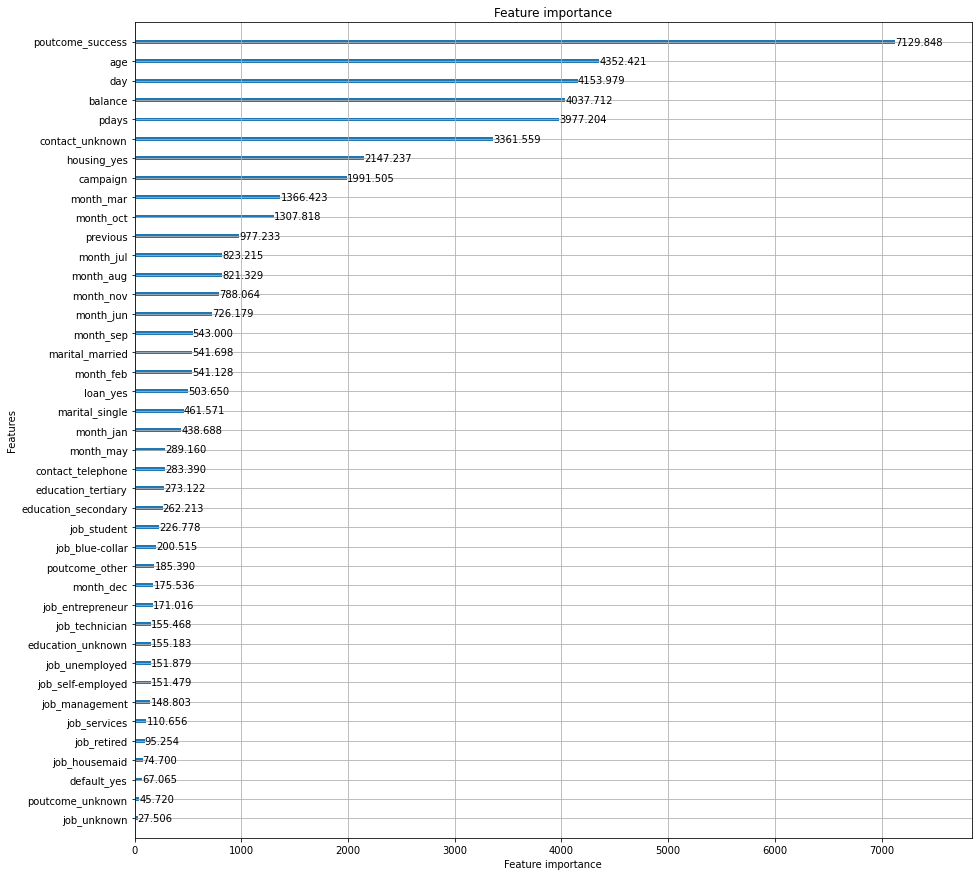

In [20]:
# plot the feature importance of LGBM model

lgb.plot_importance(lgbm, figsize=(15, 15), importance_type='gain')

### Evaluation

In [62]:
# Evaluation Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, average_precision_score, log_loss
columns=['Accuracy', 'Sensitivity', 'False Negative Rate', 'F1 Score', 'AUC']
rows=['Logistic', 'Random Forest', 'Model Stacking', 'GBDT', 'Light GBM']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[logistic, random_fc, sclf, GBDT, lgbm]

y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):
    
    y_prob[:, i] = method.predict_proba(X_valid)[:, 1]
    y_pred = method.predict(X_valid)
        
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel() 

    results.iloc[i,0] =  accuracy_score(y_valid, y_pred)
    results.iloc[i,1] =  tp/(tp+fn)
    results.iloc[i,2] =  fp/(tn+fp)
    results.iloc[i,3] =  tp/(tp+0.5*(fp+fn))
    results.iloc[i,4] =  roc_auc_score(y_valid, y_prob[:,i])
   

results.round(4)

,Accuracy,Sensitivity,False Negative Rate,F1 Score,AUC
Logistic,0.8918,0.1642,0.0118,0.2622,0.7541
Random Forest,0.8942,0.1773,0.0108,0.2818,0.7887
Model Stacking,0.8947,0.2108,0.0146,0.3190,0.6716
GBDT,0.8886,0.2544,0.0274,0.3483,0.7629
Light GBM,0.8927,0.2195,0.0181,0.3237,0.7892


In [21]:
test_predictor

,balance,age,previous,day,campaign,pdays,default_yes,housing_yes,loan_yes,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,-0.283100,0.190702,2.205948,0.517065,-0.237673,2.200954,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.260123,1.133252,-0.199151,0.396729,-0.572305,-0.413358,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.215811,-1.223123,-0.199151,0.637401,-0.572305,-0.413358,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
3,0.383561,0.567722,0.144435,-0.565963,-0.572305,3.240737,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.007723,-0.374828,-0.199151,-0.806636,-0.572305,-0.413358,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,-0.349406,0.850487,-0.199151,-0.926972,2.439386,-0.413358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15820,-0.442955,-0.940358,-0.199151,-0.565963,0.766224,-0.413358,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
15821,-0.449191,0.567722,-0.199151,0.637401,0.096960,-0.413358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15822,0.000830,1.793038,-0.199151,1.720429,2.439386,-0.413358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# make predictions on test dataset

pred_test = sclf.predict_proba(test_predictor)[:, 1]

pred_test

array([0.07839809, 0.07839809, 0.07839809, ..., 0.07839809, 0.07839809,
       0.07839809])

In [32]:
# output submission file

data = []
submission = pd.DataFrame(input_test.index, columns=['id'])
submission['subscribed'] = pred_test
submission.to_csv("submission_sclf.csv", index=False)

In [33]:
submission

,id,subscribed
0,0,0.078398
1,1,0.078398
2,2,0.078398
3,3,0.078398
4,4,0.251828
...,...,...
15819,15819,0.078398
15820,15820,0.078398
15821,15821,0.078398
15822,15822,0.078398


# Fashion Store Dataset

### 1.1 Import Data

In [17]:
store = pd.read_csv('store.csv')

store.head(5)

,ZIP_CODE,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,1001,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,...,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,1028,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,...,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,1056,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,...,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,1118,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,...,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,1107,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,...,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [18]:
store['RESP'].value_counts(normalize = True)

0    0.833901
1    0.166099
Name: RESP, dtype: float64

In [19]:
print(f'there are {store.columns.shape[0]} columns in the dataset, 47 of those are predictors and 1 [{store.columns[-1]}] is response data')

there are 48 columns in the dataset, 47 of those are predictors and 1 [RESP] is response data


In [8]:
store.keys()

Index(['ZIP_CODE', 'FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'PSWEATERS',
       'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS',
       'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY',
       'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND',
       'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP',
       'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES',
       'STORES', 'VALPHON', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI',
       'LTFREDAY', 'CLUSTYPE', 'PERCRET', 'RESP'],
      dtype='object')

## 1.2 Data Insight

In [20]:
# quantitative variables 
discrete = ['ZIP_CODE', 'FRE', 'MON', 'AVRG', 'PC_CALC20','AMSPEND', 'PSSPEND',
            'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD',
            'PROMOS', 'DAYS', 'FREDAYS','CLASSES', 'COUPONS', 'STYLES', 'STORES', 
            'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'CLUSTYPE']

numerical_percent = ['PSWEATERS','PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 
                     'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR',
                     'PJEWELRY','PFASHION', 'PLEGWEAR', 'PCOLLSPND','GMP', 'MARKDOWN','PERCRET']

quantitative = discrete + numerical_percent

# qualitative variables
binary = ['CC_CARD','VALPHON','WEB']

qualitative = binary
# response variable

response = ['RESP']

predictor = quantitative + qualitative

In [21]:
# check data types of the dataset

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ZIP_CODE      21740 non-null  int64  
 1   FRE           21740 non-null  int64  
 2   MON           21740 non-null  float64
 3   CC_CARD       21740 non-null  int64  
 4   AVRG          21740 non-null  float64
 5   PC_CALC20     21740 non-null  int64  
 6   PSWEATERS     21740 non-null  float64
 7   PKNIT_TOPS    21740 non-null  float64
 8   PKNIT_DRES    21740 non-null  float64
 9   PBLOUSES      21740 non-null  float64
 10  PJACKETS      21740 non-null  float64
 11  PCAR_PNTS     21740 non-null  float64
 12  PCAS_PNTS     21740 non-null  float64
 13  PSHIRTS       21740 non-null  float64
 14  PDRESSES      21740 non-null  float64
 15  PSUITS        21740 non-null  float64
 16  POUTERWEAR    21740 non-null  float64
 17  PJEWELRY      21740 non-null  float64
 18  PFASHION      21740 non-nu

In [22]:
def getCol_withmissing(df):
    cols = df.columns
    missing_term = []

    for col in cols:
        vals = df[col].unique()

        if 'unknown' in vals:
            missing_term.append(col)

    return missing_term
    
missing_term = getCol_withmissing(store)

missing_term

[]

Obviously, there is no missing value in the whole dataset.

# 2. Feasure Engineering

## 2.1 Missing values 

According to the above missing value analysis of the discussed dataset, there is no missing value need to amend or supply replacement values.

## 2.2 Outliers

Due to the discussed dataset without any continuous data category, There is no need to analyse whether the outliers in the dataset.

## 2.3 Visulizing distributions for predictor data

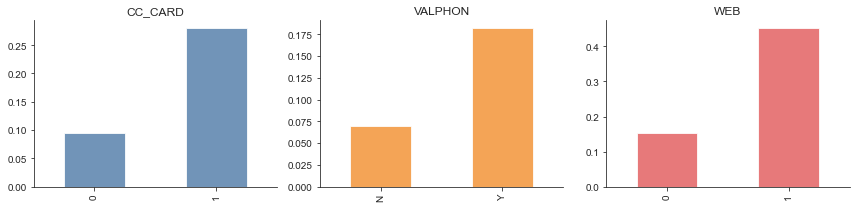

In [35]:
# plot the distribution of the binary variables

crosstabplots(store[binary], store['RESP']) 
plt.show()

<BarContainer object of 2 artists>

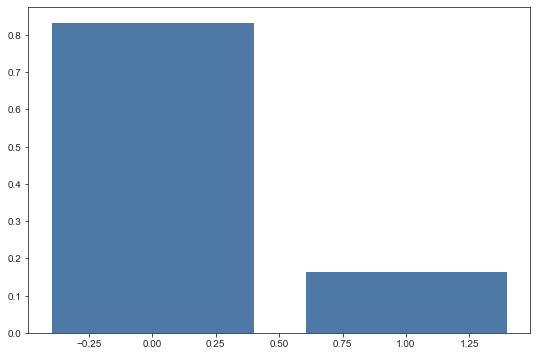

In [36]:
# plot the distribution of the response variable

df = store['RESP'].value_counts(normalize=True)

plt.bar(df.index, df.values)

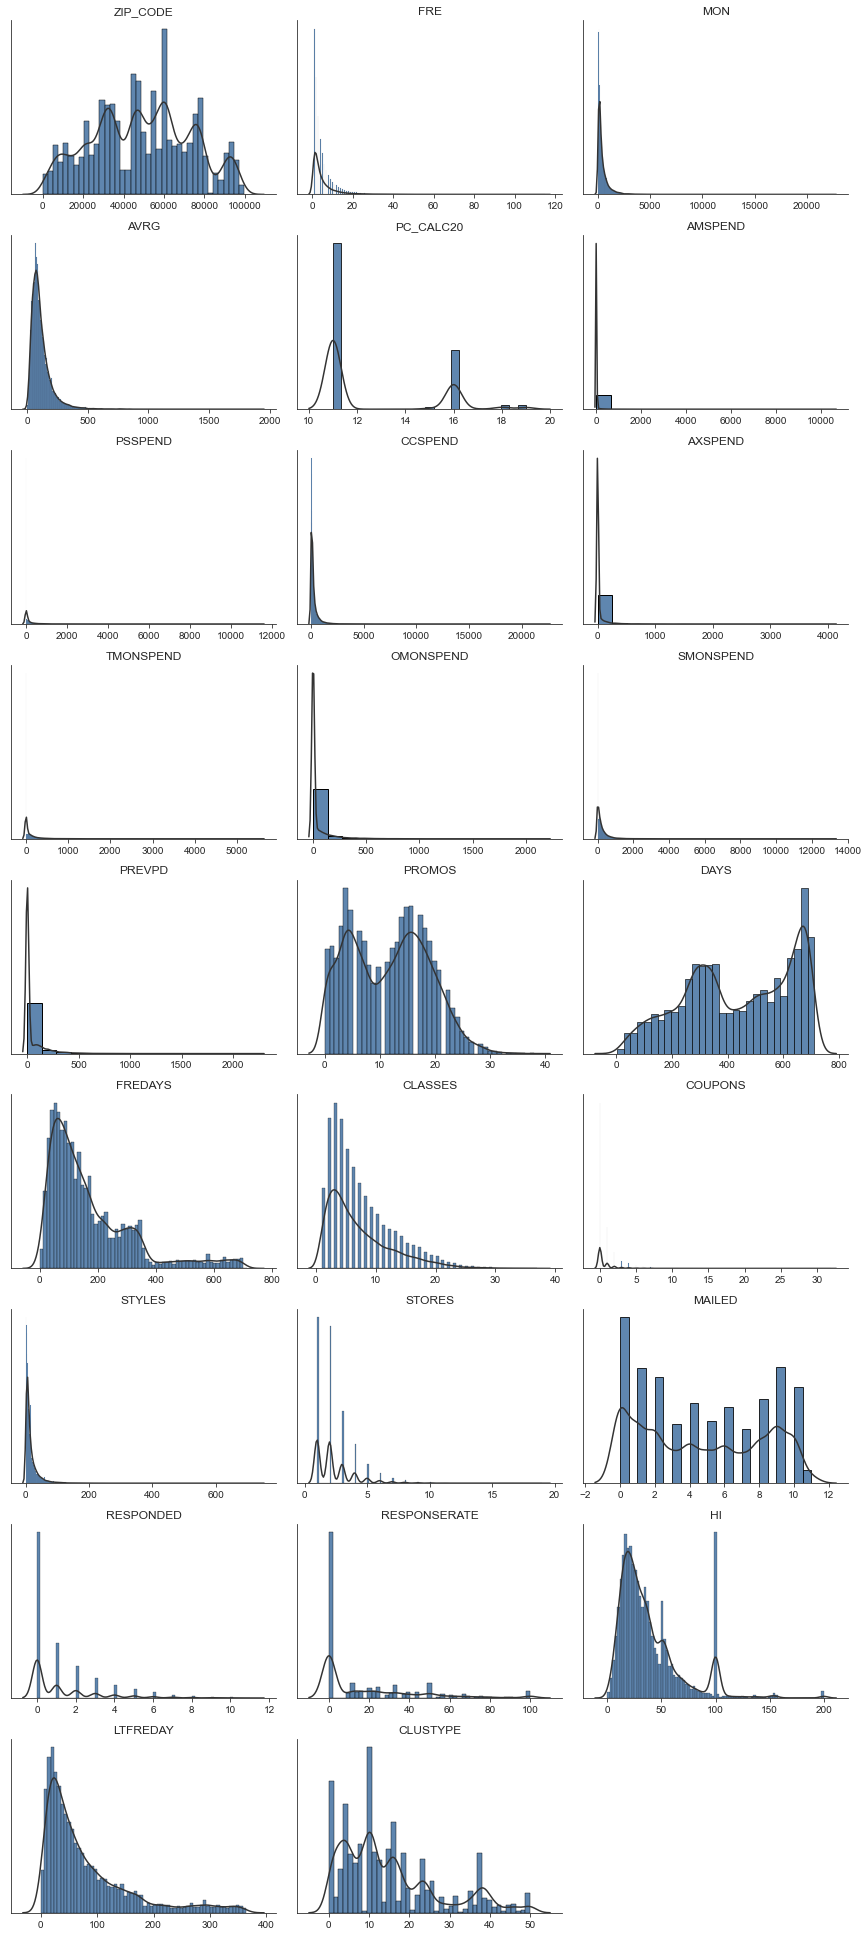

In [23]:
# plot the distributions of the discrete variables

distplots(store[discrete]) 
plt.show()

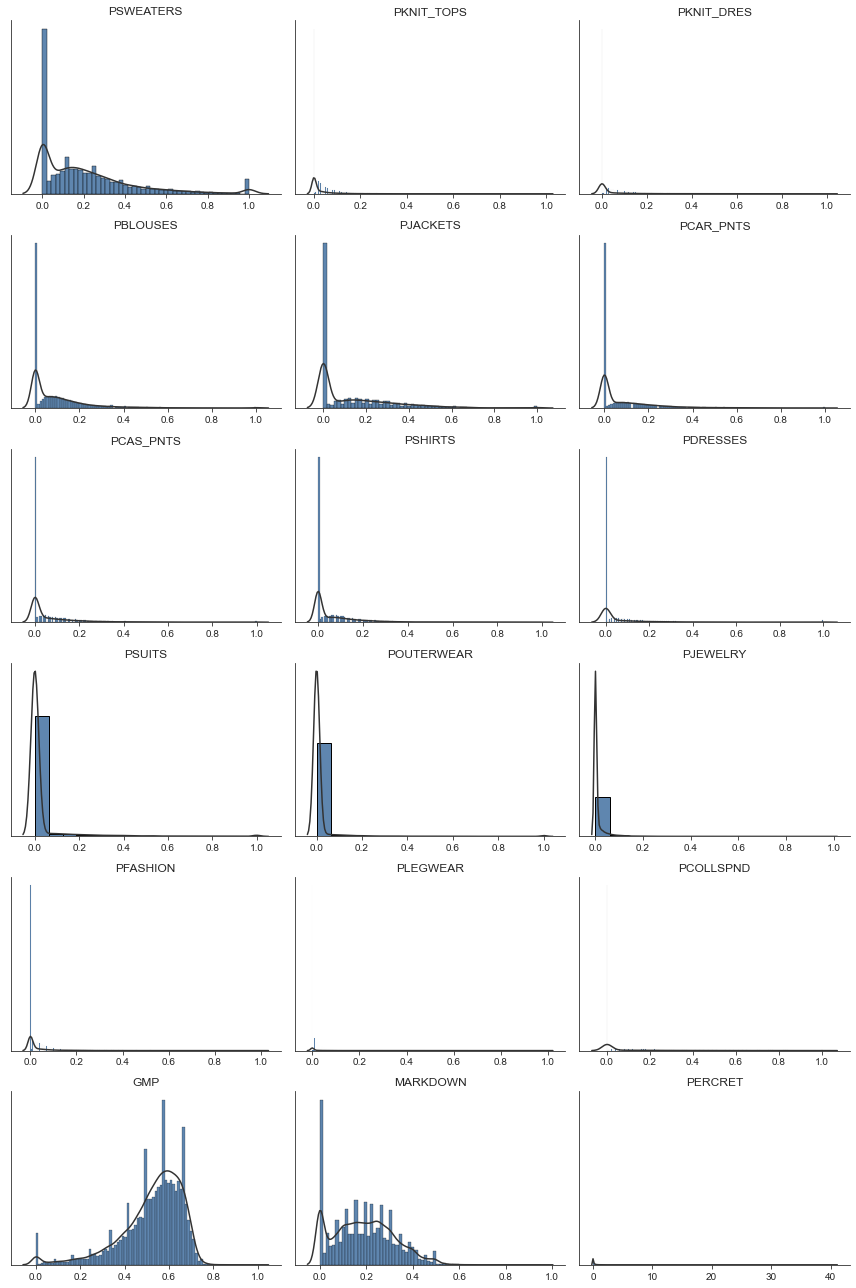

In [24]:
# plot the distributions of the numerical percentage variables

distplots(store[numerical_percent]) 
plt.show()

According to the above plots, most of the data suggest right-skewed distribution and the peak value is 0. Which means that in many items of the datasets, the participation of customers in these items are low. The final RESP variable is also determined that among these customers, only about 18% of them will give some feedback on the merchant's activities.

For the data itself, only VALPHON data needs data transformation, and there are no missing value and outlier problems for the rest of the data。

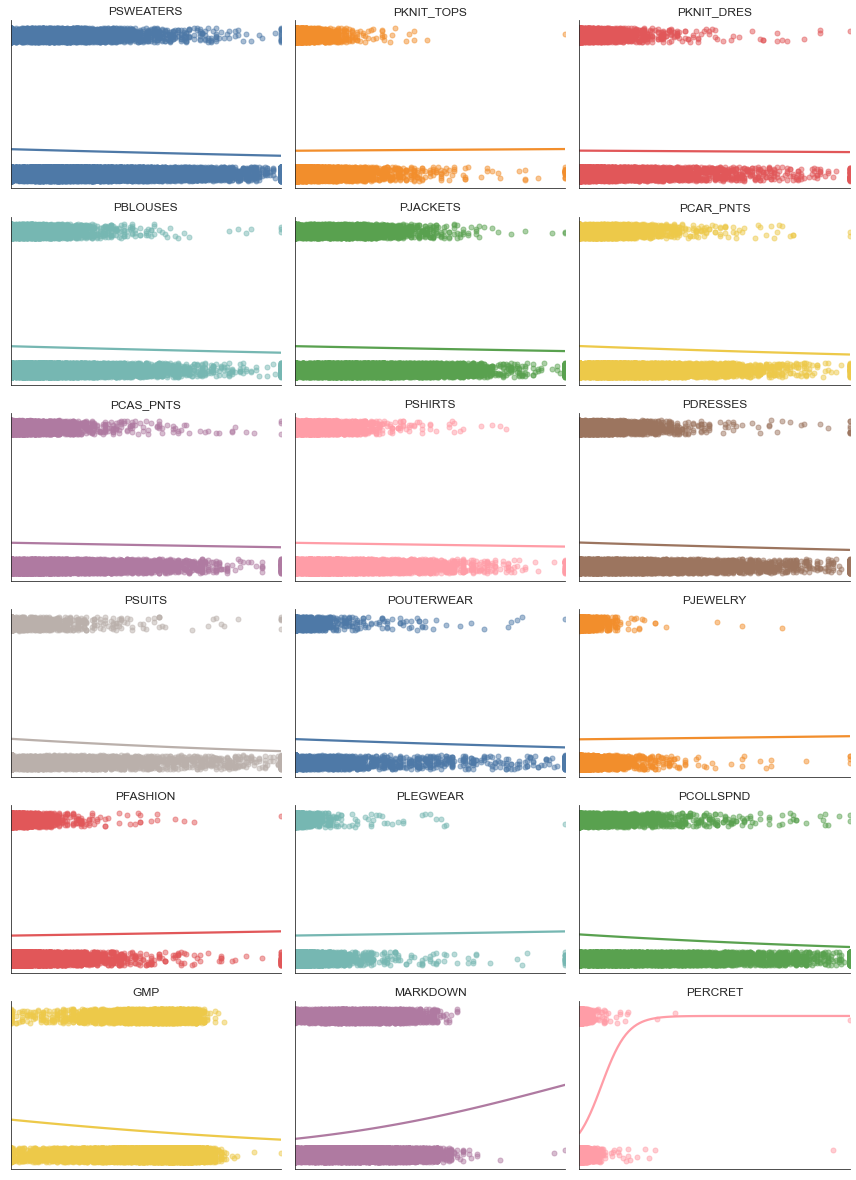

In [39]:
# plot the dependence measure of numercial percentage variables

regplots(store[numerical_percent],store['RESP']) 
plt.show()

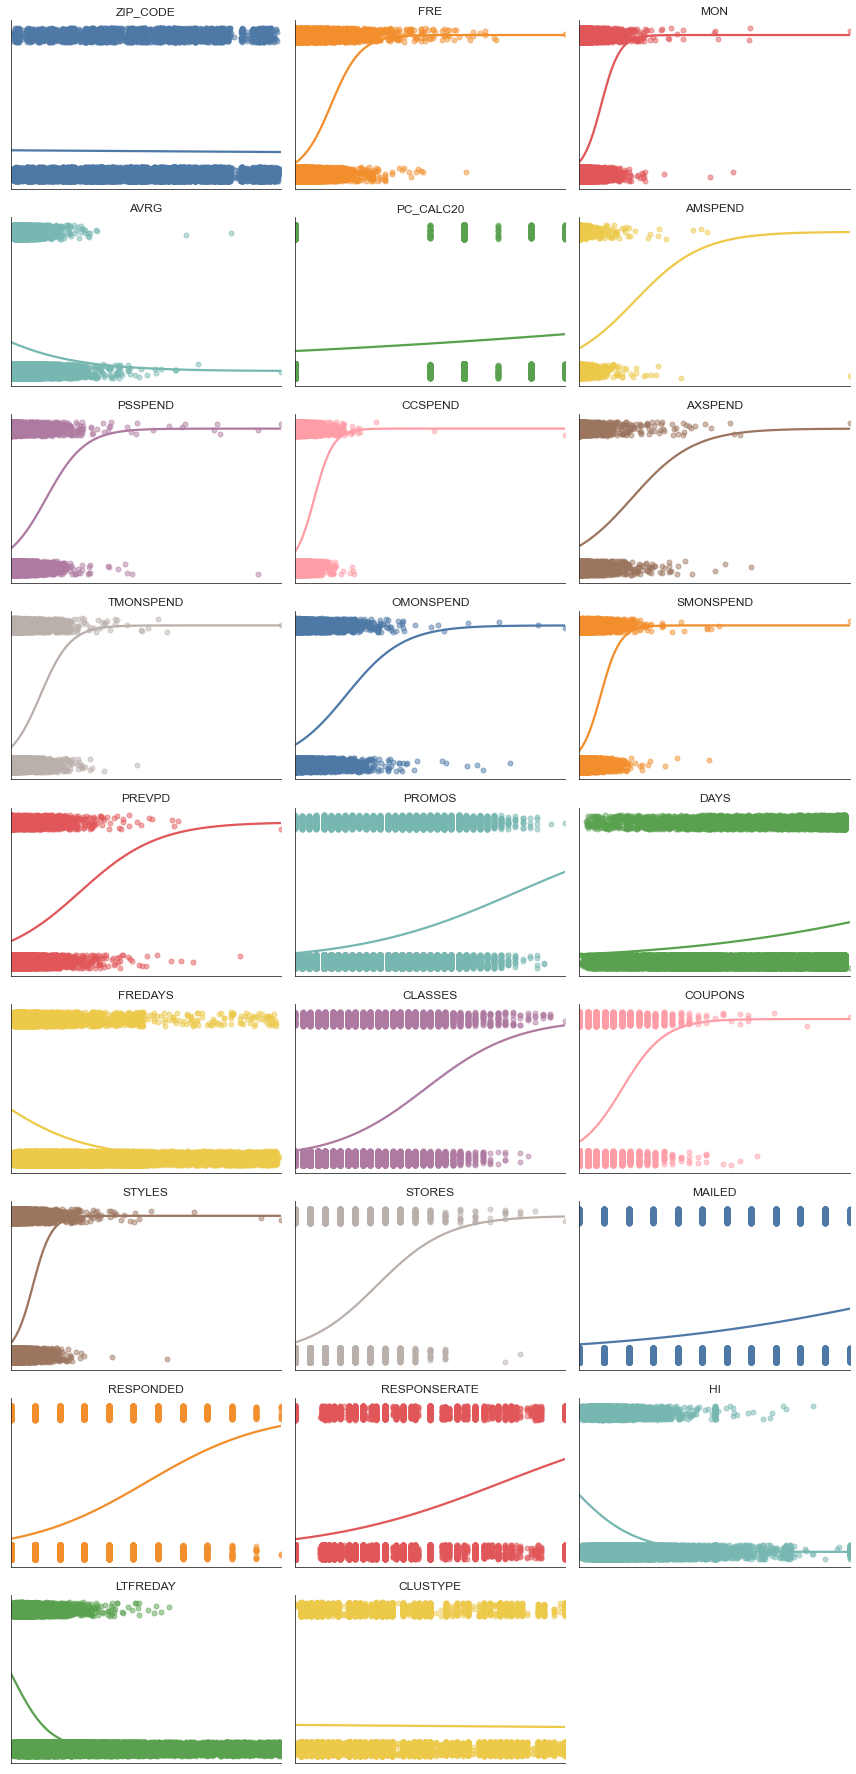

In [40]:
# plot the dependence measure of discrete variables

regplots(store[discrete],store['RESP']) 
plt.show()

## 2.4 transform data

In [12]:
print(store['VALPHON'])

0        N
1        Y
2        N
3        Y
4        Y
        ..
21735    Y
21736    N
21737    N
21738    Y
21739    Y
Name: VALPHON, Length: 21740, dtype: object


In [29]:
from sklearn.model_selection import train_test_split

# transform VALPHON variable to 0 and 1

store['VALPHON'].replace(['Y','N'],['1','0'],inplace = True)
store.VALPHON = store.VALPHON.astype(int)

print(store['VALPHON'])

0        0
1        1
2        0
3        1
4        1
        ..
21735    1
21736    0
21737    0
21738    1
21739    1
Name: VALPHON, Length: 21740, dtype: int32


In [30]:
# train test split
index_train,index_test = train_test_split(store.index,stratify=store[response],train_size=0.8,random_state=42)
train = store.loc[index_train,:].copy()
test = store.loc[index_test,:].copy()

X_train = store.loc[index_train,predictor]
X_valid = store.loc[index_test,predictor]

y_train = store.loc[index_train,response]
y_valid = store.loc[index_test,response]
    
X_train

,ZIP_CODE,FRE,MON,AVRG,PC_CALC20,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,...,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,GMP,MARKDOWN,PERCRET,CC_CARD,VALPHON,WEB
6750,33606,1,196.00,196.00,16,0.0,128.00,68.00,0.0,0.00,...,0.00000,0.00,0.00,0.0,0.68,0.00,0.00,0,1,0
7866,38016,4,706.96,176.74,11,0.0,39.99,666.97,0.0,187.00,...,0.00000,0.02,0.02,0.0,0.60,0.09,0.00,0,1,0
17625,74105,3,150.50,50.16,16,0.0,115.50,35.00,0.0,101.50,...,0.00000,0.07,0.00,0.0,0.44,0.40,0.17,0,1,0
16587,68516,1,209.70,209.70,11,0.0,0.00,209.70,0.0,0.00,...,0.00000,0.00,0.05,0.0,0.65,0.10,0.00,1,1,0
12821,55943,2,30.48,15.24,11,0.0,0.00,47.97,0.0,8.99,...,0.00000,0.00,0.00,0.0,0.32,0.40,0.57,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20879,93277,1,291.58,291.58,11,0.0,0.00,291.58,0.0,0.00,...,0.00000,0.21,0.00,0.0,0.59,0.12,0.00,0,1,0
1420,10954,1,118.48,118.48,11,0.0,0.00,118.48,0.0,0.00,...,0.00000,0.00,0.00,0.0,0.48,0.25,0.00,0,0,0
14295,60440,14,839.24,59.94,11,0.0,49.00,790.24,0.0,151.00,...,0.02000,0.01,0.00,0.0,0.14,0.35,0.14,1,1,0
16624,68506,1,92.70,92.70,11,0.0,0.00,92.70,0.0,0.00,...,0.00000,0.15,0.00,0.0,0.52,0.27,0.00,1,1,0


# 3 Modelling and Methodology

### 3.1 Logistic Regression Model without any parameter modification

In [33]:
import optuna
from sklearn import linear_model

def objective_lr(trial):

    # Suggest hyperparamter
    C = trial.suggest_float("C", 0.1,1,step = 0.1)
    
    classifier_obj = linear_model.LogisticRegression(C=C)
    
    score = cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5, scoring= 'roc_auc').mean()
    
    return score

study_lr = optuna.create_study(direction="maximize")
study_lr.optimize(objective_lr, n_trials=100)

[I 2021-11-12 11:56:36,900] A new study created in memory with name: no-name-23a5cf15-f2ad-43c2-a90f-d5e3639bd6a2
[I 2021-11-12 11:56:40,707] Trial 0 finished with value: 0.7999440156570233 and parameters: {'C': 0.4}. Best is trial 0 with value: 0.7999440156570233.
[I 2021-11-12 11:56:42,980] Trial 1 finished with value: 0.8004558356055022 and parameters: {'C': 0.1}. Best is trial 1 with value: 0.8004558356055022.
[I 2021-11-12 11:56:43,834] Trial 2 finished with value: 0.8004558356055022 and parameters: {'C': 0.1}. Best is trial 1 with value: 0.8004558356055022.
[I 2021-11-12 11:56:44,703] Trial 3 finished with value: 0.7979492497273603 and parameters: {'C': 0.30000000000000004}. Best is trial 1 with value: 0.8004558356055022.
[I 2021-11-12 11:56:45,530] Trial 4 finished with value: 0.7987653762032435 and parameters: {'C': 0.2}. Best is trial 1 with value: 0.8004558356055022.
[I 2021-11-12 11:56:46,358] Trial 5 finished with value: 0.8038070278551599 and parameters: {'C': 0.8}. Best i

[I 2021-11-12 11:57:23,747] Trial 48 finished with value: 0.7979492497273603 and parameters: {'C': 0.30000000000000004}. Best is trial 5 with value: 0.8038070278551599.
[I 2021-11-12 11:57:24,735] Trial 49 finished with value: 0.8004558356055022 and parameters: {'C': 0.1}. Best is trial 5 with value: 0.8038070278551599.
[I 2021-11-12 11:57:25,654] Trial 50 finished with value: 0.8038070278551599 and parameters: {'C': 0.8}. Best is trial 5 with value: 0.8038070278551599.
[I 2021-11-12 11:57:26,498] Trial 51 finished with value: 0.8038070278551599 and parameters: {'C': 0.8}. Best is trial 5 with value: 0.8038070278551599.
[I 2021-11-12 11:57:27,362] Trial 52 finished with value: 0.8038070278551599 and parameters: {'C': 0.8}. Best is trial 5 with value: 0.8038070278551599.
[I 2021-11-12 11:57:28,203] Trial 53 finished with value: 0.7895957080330167 and parameters: {'C': 0.9}. Best is trial 5 with value: 0.8038070278551599.
[I 2021-11-12 11:57:29,041] Trial 54 finished with value: 0.793528

[I 2021-11-12 11:58:04,590] Trial 97 finished with value: 0.7964259897468251 and parameters: {'C': 0.7000000000000001}. Best is trial 5 with value: 0.8038070278551599.
[I 2021-11-12 11:58:05,425] Trial 98 finished with value: 0.7895957080330167 and parameters: {'C': 0.9}. Best is trial 5 with value: 0.8038070278551599.
[I 2021-11-12 11:58:06,280] Trial 99 finished with value: 0.8038070278551599 and parameters: {'C': 0.8}. Best is trial 5 with value: 0.8038070278551599.


In [34]:
# Getting the best trial:
print(f"The best trial is : \n{study_lr.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_lr.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_lr.best_params}")

params_lr = study_lr.best_params

The best trial is : 
FrozenTrial(number=5, values=[0.8038070278551599], datetime_start=datetime.datetime(2021, 11, 12, 11, 56, 45, 532448), datetime_complete=datetime.datetime(2021, 11, 12, 11, 56, 46, 358411), params={'C': 0.8}, distributions={'C': DiscreteUniformDistribution(high=1.0, low=0.1, q=0.1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=5, state=TrialState.COMPLETE, value=None)
The best value is : 
0.8038070278551599
The best parameters are : 
{'C': 0.8}


In [35]:
logistic = LogisticRegression(**params_lr)

logistic.fit(X_train, y_train)

scores_train_lr = cross_val_score(logistic, X_train, y_train, cv = 10, scoring = 'roc_auc')
print('Training set roc_auc: {}'.format(np.mean(scores_train_lr)))

# Validation set 'roc_auc' score
prob_lr = logistic.predict_proba(X_valid)[:,1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_lr)))

Training set roc_auc: 0.7994024998179721
Validation set roc_auc: 0.78132195455108


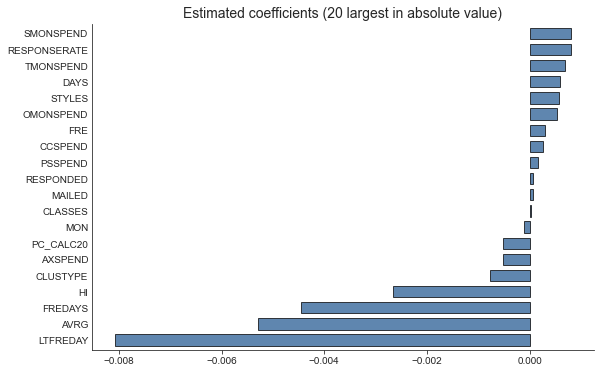

In [76]:
# Logistic coefficient plot for insight discussion
feature_names = list(X_train.columns)

coefplot(logistic, feature_names)
plt.show()

### 3.1.2 Lasso regression 

In [77]:
from sklearn.linear_model import LogisticRegressionCV

logit_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', scoring='roc_auc')
logit_l1.fit(X_train, y_train)

scores_train_lasso = cross_val_score(logit_l1, X_train, y_train, cv = 10, scoring = 'roc_auc')
print('Training set roc_auc: {}'.format(np.mean(scores_train_lasso)))

# Validation set 'roc_auc' score
prob_lr = logit_l1.predict_proba(X_valid)[:,1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_lr)))

Training set roc_auc: 0.8461629184601867
Validation set roc_auc: 0.8321529030868168


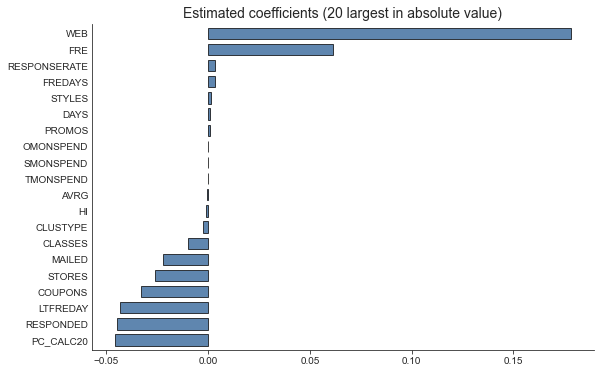

In [78]:
# Lasso coefficient plot for insight discussion
from tutorial4 import coefplot
coefplot(logit_l1, feature_names)
plt.show()

### 3.1.3 Ridge regression 

In [79]:
logit_l2 = LogisticRegressionCV(penalty='l2', solver='lbfgs', scoring='roc_auc')
logit_l2.fit(X_train, y_train)
scores_train_ridge = cross_val_score(logit_l2, X_train, y_train, cv = 10, scoring = 'roc_auc')
print('Training set roc_auc: {}'.format(np.mean(scores_train_lasso)))

# Validation set 'roc_auc' score
prob_lr = logit_l2.predict_proba(X_valid)[:,1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_lr)))

Training set roc_auc: 0.8461629184601867
Validation set roc_auc: 0.8316124083832828


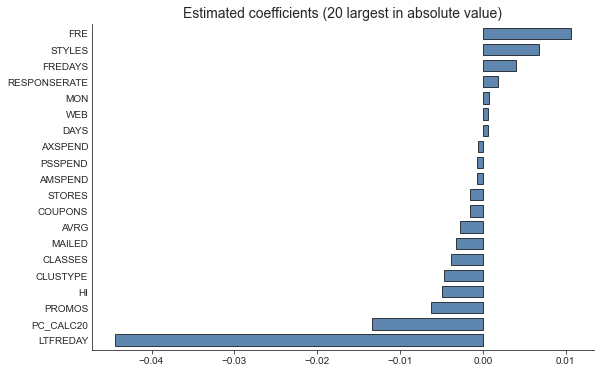

In [80]:
# Ridge coefficient plot for insight discussion

coefplot(logit_l2, feature_names)
plt.show()

### 3.2 Random Forest Model

In [36]:
def objective_rfc(trial):

    # Suggest hyperparamter
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 600)
    rf_criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    rf_max_features = trial.suggest_int('max_features', 1, 10)
    rf_min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    
    classifier_obj = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion, max_features=rf_max_features, min_samples_leaf=rf_min_samples_leaf)
    
    
    score = cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5, scoring= 'roc_auc').mean()
    
    return score

study_rfc = optuna.create_study(direction="maximize")
study_rfc.optimize(objective_rfc, n_trials=20, timeout=120)

[I 2021-11-12 11:59:41,966] A new study created in memory with name: no-name-a83dbfe2-4c66-47ac-8d4c-f745fe7b28b4
[I 2021-11-12 12:00:17,383] Trial 0 finished with value: 0.8443765830418839 and parameters: {'rf_n_estimators': 482, 'criterion': 'entropy', 'max_features': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8443765830418839.
[I 2021-11-12 12:00:44,911] Trial 1 finished with value: 0.841561059026169 and parameters: {'rf_n_estimators': 574, 'criterion': 'gini', 'max_features': 7, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8443765830418839.
[I 2021-11-12 12:00:55,456] Trial 2 finished with value: 0.8326542353087276 and parameters: {'rf_n_estimators': 272, 'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8443765830418839.
[I 2021-11-12 12:01:13,035] Trial 3 finished with value: 0.8375334807485816 and parameters: {'rf_n_estimators': 425, 'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 7}. Best is tria

In [37]:
# Getting the best trial:
print(f"The best trial is : \n{study_rfc.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_rfc.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_rfc.best_params}")

params_rfc = study_rfc.best_params

The best trial is : 
FrozenTrial(number=0, values=[0.8443765830418839], datetime_start=datetime.datetime(2021, 11, 12, 11, 59, 41, 969517), datetime_complete=datetime.datetime(2021, 11, 12, 12, 0, 17, 382752), params={'rf_n_estimators': 482, 'criterion': 'entropy', 'max_features': 7, 'min_samples_leaf': 2}, distributions={'rf_n_estimators': IntUniformDistribution(high=600, low=100, step=1), 'criterion': CategoricalDistribution(choices=('entropy', 'gini')), 'max_features': IntUniformDistribution(high=10, low=1, step=1), 'min_samples_leaf': IntUniformDistribution(high=20, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)
The best value is : 
0.8443765830418839
The best parameters are : 
{'rf_n_estimators': 482, 'criterion': 'entropy', 'max_features': 7, 'min_samples_leaf': 2}


In [39]:
random_fc = RandomForestClassifier(n_estimators=482,random_state=48,criterion='entropy', max_features= 7, min_samples_leaf=2)

random_fc.fit(X_train, y_train)

score_train_rfc = cross_val_score(random_fc,X_train,y_train,cv=5,scoring = 'roc_auc').mean()
print('Training set roc_auc: {}'.format(score_train_rfc))

# Validation set 'roc_auc' score
prob_rfc = random_fc.predict_proba(X_valid)[:, 1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_rfc)))

Training set roc_auc: 0.8432685557306947
Validation set roc_auc: 0.8301267164049119


### 3.3 Model Stacking

In [40]:
RANDOM_SEED = 48
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr,random_state=RANDOM_SEED)
#print('10-fold cross validation:\n')
#for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Random Forest', 'Naive Bayes','StackingClassifier']):
    #scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    #print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [41]:
sclf.fit(X_train, y_train)
prob_sclf = sclf.predict_proba(X_valid)[:, 1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_sclf)))

Validation set roc_auc: 0.6787826607771206


### 3.4 Gradient Boosting Decision Tree (GBDT)

In [42]:
def objective_GBDT(trial):

    # Suggest hyperparamter
    GBDT_n_estimators = trial.suggest_int("GBDT_n_estimators", 500, 1500)
    GBDT_max_depth = trial.suggest_int("GBDT_max_depth", 3, 10, log=True)
    GBDT_learning_rate = trial.suggest_float("GBDT_learning_rate", 0.01, 0.1)
    
    classifier_obj = GradientBoostingClassifier(n_estimators=GBDT_n_estimators, learning_rate=GBDT_learning_rate, max_depth=GBDT_max_depth)
    
    
    score = cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5, scoring= 'roc_auc').mean()
    
    return score

study_GBDT = optuna.create_study(direction="maximize")
study_GBDT.optimize(objective_GBDT, n_trials=20, timeout=120)

[I 2021-11-12 12:07:45,181] A new study created in memory with name: no-name-e974ec4c-b116-4c76-9ec1-eaa4ce5457f4
[I 2021-11-12 12:09:44,184] Trial 0 finished with value: 0.8479019840535782 and parameters: {'GBDT_n_estimators': 689, 'GBDT_max_depth': 5, 'GBDT_learning_rate': 0.013595448582652745}. Best is trial 0 with value: 0.8479019840535782.
[I 2021-11-12 12:11:36,133] Trial 1 finished with value: 0.8404442006086456 and parameters: {'GBDT_n_estimators': 1100, 'GBDT_max_depth': 3, 'GBDT_learning_rate': 0.07823968596197489}. Best is trial 0 with value: 0.8479019840535782.


In [43]:
# Getting the best trial:
print(f"The best trial is : \n{study_GBDT.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_GBDT.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_GBDT.best_params}")

params_GBDT = study_GBDT.best_params

The best trial is : 
FrozenTrial(number=0, values=[0.8479019840535782], datetime_start=datetime.datetime(2021, 11, 12, 12, 7, 45, 185637), datetime_complete=datetime.datetime(2021, 11, 12, 12, 9, 44, 183467), params={'GBDT_n_estimators': 689, 'GBDT_max_depth': 5, 'GBDT_learning_rate': 0.013595448582652745}, distributions={'GBDT_n_estimators': IntUniformDistribution(high=1500, low=500, step=1), 'GBDT_max_depth': IntLogUniformDistribution(high=10, low=3, step=1), 'GBDT_learning_rate': UniformDistribution(high=0.1, low=0.01)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)
The best value is : 
0.8479019840535782
The best parameters are : 
{'GBDT_n_estimators': 689, 'GBDT_max_depth': 5, 'GBDT_learning_rate': 0.013595448582652745}


In [44]:
GBDT = GradientBoostingClassifier(n_estimators=689, learning_rate=0.013595448582652745, max_depth=5, random_state=1)

GBDT.fit(X_train, y_train)

score_train_GBDT = cross_val_score(GBDT,X_train,y_train,cv=5,scoring = 'roc_auc', n_jobs=-1).mean()
print('Training set roc_auc: {}'.format(score_train_GBDT))

# Validation set 'roc_auc' score
prob_GBDT = GBDT.predict_proba(X_valid)[:, 1]

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_GBDT)))

Training set roc_auc: 0.8477608910724885
Validation set roc_auc: 0.8431908362656285


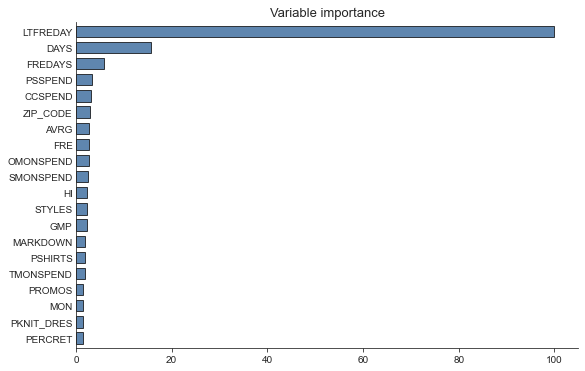

In [49]:
# plot feature importance of GBDT model

feature_names = list(X_train.columns)
plot_feature_importance(GBDT, feature_names)
plt.show()

### 3.5 LightGBM model

In [26]:
def objective_lgbm(trial):
    
    params = {
    'boosting_type': 'gbdt',
    'n_estimator' : trial.suggest_int('n_estimator', 500, 1500),
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5), 
    'max_depth': trial.suggest_int('max_depth', 1, 8),
    'num_leaves': trial.suggest_int('num_leaves', 1, 50),
    'lambda_l1': trial.suggest_loguniform('lambda_l1',  1e-8, 1), 
    'lambda_l2': trial.suggest_loguniform('lambda_l2',  1e-8, 1), 
    'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
    'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
    'feature_fraction':  trial.suggest_uniform('feature_fraction', 0.5, 1.0),
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 128), 
     }
    
    model = lgb.LGBMClassifier(**params, num_boost_round=500, random_state=48)
    
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'roc_auc').mean()
    
    return scores

sampler = TPESampler(seed = 42) 
study_lgbm = optuna.create_study(direction='maximize', sampler=sampler)
study_lgbm.optimize(objective_lgbm, n_trials=120)  

[I 2021-11-12 11:06:08,399] A new study created in memory with name: no-name-8eb2ca19-95dd-46fb-96f0-259fc165b546


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8005575058716043, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8005575058716043
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] lambda_l1 is set=1.77071686435378e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.77071686435378e-07
[LightGBM] [Warning] bagging_fraction is set=0.6232334448672797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6232334448672797
[LightGBM] [Warning] lambda_l2 is set=1.7699302940633311e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7699302940633311e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-12 11:06:13,732] Trial 0 finished with value: 0.8014372245920114 and parameters: {'n_estimator': 874, 'learning_rate': 0.4758500101408589, 'max_depth': 6, 'num_leaves': 30, 'lambda_l1': 1.77071686435378e-07, 'lambda_l2': 1.7699302940633311e-07, 'bagging_fraction': 0.6232334448672797, 'bagging_freq': 7, 'feature_fraction': 0.8005575058716043, 'min_data_in_leaf': 91}. Best is trial 0 with value: 0.8014372245920114.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7159725093210578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7159725093210578
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] lambda_l1 is set=2.8483918709107956e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8483918709107956e-07
[LightGBM] [Warning] bagging_fraction is set=0.7216968971838151, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7216968971838151
[LightGBM] [Warning] lambda_l2 is set=2.9324868872723725e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9324868872723725e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-12 11:06:18,085] Trial 1 finished with value: 0.8005959437364046 and parameters: {'n_estimator': 520, 'learning_rate': 0.48525582755937724, 'max_depth': 7, 'num_leaves': 11, 'lambda_l1': 2.8483918709107956e-07, 'lambda_l2': 2.9324868872723725e-07, 'bagging_fraction': 0.7216968971838151, 'bagging_freq': 4, 'feature_fraction': 0.7159725093210578, 'min_data_in_leaf': 38}. Best is trial 0 with value: 0.8014372245920114.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7962072844310213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7962072844310213
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] lambda_l1 is set=4.452048365748842e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.452048365748842e-05
[LightGBM] [Warning] bagging_fraction is set=0.6798695128633439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6798695128633439
[LightGBM] [Warning] lambda_l2 is set=0.019116469627784252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019116469627784252
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:06:21,041] Trial 2 finished with value: 0.8465005158542083 and parameters: {'n_estimator': 1112, 'learning_rate': 0.0783519917195005, 'max_depth': 3, 'num_leaves': 19, 'lambda_l1': 4.452048365748842e-05, 'lambda_l2': 0.019116469627784252, 'bagging_fraction': 0.6798695128633439, 'bagging_freq': 4, 'feature_fraction': 0.7962072844310213, 'min_data_in_leaf': 6}. Best is trial 2 with value: 0.8465005158542083.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8421165132560784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8421165132560784
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l1 is set=0.530953226900921, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.530953226900921
[LightGBM] [Warning] bagging_fraction is set=0.7218455076693483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7218455076693483
[LightGBM] [Warning] lambda_l2 is set=0.02932100047183291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02932100047183291
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-12 11:06:23,083] Trial 3 finished with value: 0.8526787663165318 and parameters: {'n_estimator': 1108, 'learning_rate': 0.09355682060677284, 'max_depth': 1, 'num_leaves': 48, 'lambda_l1': 0.530953226900921, 'lambda_l2': 0.02932100047183291, 'bagging_fraction': 0.7218455076693483, 'bagging_freq': 1, 'feature_fraction': 0.8421165132560784, 'min_data_in_leaf': 57}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7733551396716398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7733551396716398
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=1.1755466083160747e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1755466083160747e-06
[LightGBM] [Warning] bagging_fraction is set=0.7246844304357644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7246844304357644
[LightGBM] [Warning] lambda_l2 is set=0.0019960815242513743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019960815242513743
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-12 11:06:25,196] Trial 4 finished with value: 0.8486718043735546 and parameters: {'n_estimator': 622, 'learning_rate': 0.2526366859545224, 'max_depth': 1, 'num_leaves': 46, 'lambda_l1': 1.1755466083160747e-06, 'lambda_l2': 0.0019960815242513743, 'bagging_fraction': 0.7246844304357644, 'bagging_freq': 4, 'feature_fraction': 0.7733551396716398, 'min_data_in_leaf': 24}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.522613644455269, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.522613644455269
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] lambda_l1 is set=0.0006070155694141794, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006070155694141794
[LightGBM] [Warning] bagging_fraction is set=0.6353970008207678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6353970008207678
[LightGBM] [Warning] lambda_l2 is set=0.23713402899336497, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23713402899336497
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-12 11:06:34,402] Trial 5 finished with value: 0.8110666009473448 and parameters: {'n_estimator': 1470, 'learning_rate': 0.38981508344694615, 'max_depth': 8, 'num_leaves': 45, 'lambda_l1': 0.0006070155694141794, 'lambda_l2': 0.23713402899336497, 'bagging_fraction': 0.6353970008207678, 'bagging_freq': 2, 'feature_fraction': 0.522613644455269, 'min_data_in_leaf': 42}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5372753218398854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5372753218398854
[LightGBM] [Warning] min_data_in_leaf is set=127, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=127
[LightGBM] [Warning] lambda_l1 is set=1.7679748286442581e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7679748286442581e-06
[LightGBM] [Warning] bagging_fraction is set=0.6563696899899051, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6563696899899051
[LightGBM] [Warning] lambda_l2 is set=0.0002195678075127562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002195678075127562
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-12 11:06:39,247] Trial 6 finished with value: 0.8262575925056052 and parameters: {'n_estimator': 889, 'learning_rate': 0.142961025569209, 'max_depth': 7, 'num_leaves': 18, 'lambda_l1': 1.7679748286442581e-06, 'lambda_l2': 0.0002195678075127562, 'bagging_fraction': 0.6563696899899051, 'bagging_freq': 6, 'feature_fraction': 0.5372753218398854, 'min_data_in_leaf': 127}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6792328642721364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6792328642721364
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] lambda_l1 is set=0.0045170900739091345, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0045170900739091345
[LightGBM] [Warning] bagging_fraction is set=0.9085081386743783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9085081386743783
[LightGBM] [Warning] lambda_l2 is set=0.006792933207180863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006792933207180863
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:06:41,589] Trial 7 finished with value: 0.8522652798982817 and parameters: {'n_estimator': 1273, 'learning_rate': 0.10737068395174447, 'max_depth': 1, 'num_leaves': 41, 'lambda_l1': 0.0045170900739091345, 'lambda_l2': 0.006792933207180863, 'bagging_fraction': 0.9085081386743783, 'bagging_freq': 1, 'feature_fraction': 0.6792328642721364, 'min_data_in_leaf': 15}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9436063712881633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9436063712881633
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] lambda_l1 is set=3.075095259104445e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.075095259104445e-06
[LightGBM] [Warning] bagging_fraction is set=0.8918424713352255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8918424713352255
[LightGBM] [Warning] lambda_l2 is set=3.994538177154855e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.994538177154855e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-12 11:06:44,317] Trial 8 finished with value: 0.8330438681163116 and parameters: {'n_estimator': 1363, 'learning_rate': 0.3154160821455034, 'max_depth': 3, 'num_leaves': 4, 'lambda_l1': 3.075095259104445e-06, 'lambda_l2': 3.994538177154855e-06, 'bagging_fraction': 0.8918424713352255, 'bagging_freq': 5, 'feature_fraction': 0.9436063712881633, 'min_data_in_leaf': 61}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5127095633720475, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5127095633720475
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] lambda_l1 is set=0.014714226590398758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014714226590398758
[LightGBM] [Warning] bagging_fraction is set=0.8090931317527976, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8090931317527976
[LightGBM] [Warning] lambda_l2 is set=8.919998285789817e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.919998285789817e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:06:51,429] Trial 9 finished with value: 0.81536626916456 and parameters: {'n_estimator': 619, 'learning_rate': 0.35948994573926757, 'max_depth': 7, 'num_leaves': 29, 'lambda_l1': 0.014714226590398758, 'lambda_l2': 8.919998285789817e-05, 'bagging_fraction': 0.8090931317527976, 'bagging_freq': 3, 'feature_fraction': 0.5127095633720475, 'min_data_in_leaf': 14}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9753074624888007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9753074624888007
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] lambda_l1 is set=0.7433098422141448, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7433098422141448
[LightGBM] [Warning] bagging_fraction is set=0.983908298378168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.983908298378168
[LightGBM] [Warning] lambda_l2 is set=0.18252332105365732, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18252332105365732
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-12 11:06:55,780] Trial 10 finished with value: 0.8525491633280685 and parameters: {'n_estimator': 1086, 'learning_rate': 0.012938619648350358, 'max_depth': 4, 'num_leaves': 36, 'lambda_l1': 0.7433098422141448, 'lambda_l2': 0.18252332105365732, 'bagging_fraction': 0.983908298378168, 'bagging_freq': 1, 'feature_fraction': 0.9753074624888007, 'min_data_in_leaf': 83}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9800166534444635, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9800166534444635
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] lambda_l1 is set=0.895460581402787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.895460581402787
[LightGBM] [Warning] bagging_fraction is set=0.996380128364447, subsample=1.0 will be ignored. Current value: bagging_fraction=0.996380128364447
[LightGBM] [Warning] lambda_l2 is set=0.4839101568120109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4839101568120109
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parame

[I 2021-11-12 11:07:00,418] Trial 11 finished with value: 0.852381012330296 and parameters: {'n_estimator': 1129, 'learning_rate': 0.01450362048003224, 'max_depth': 4, 'num_leaves': 36, 'lambda_l1': 0.895460581402787, 'lambda_l2': 0.4839101568120109, 'bagging_fraction': 0.996380128364447, 'bagging_freq': 1, 'feature_fraction': 0.9800166534444635, 'min_data_in_leaf': 86}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8877633465249809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8877633465249809
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] lambda_l1 is set=0.8512529462738487, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8512529462738487
[LightGBM] [Warning] bagging_fraction is set=0.8068005390606676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8068005390606676
[LightGBM] [Warning] lambda_l2 is set=0.8808478169079723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8808478169079723
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-12 11:07:03,673] Trial 12 finished with value: 0.8442341683894666 and parameters: {'n_estimator': 989, 'learning_rate': 0.19170169261287165, 'max_depth': 2, 'num_leaves': 37, 'lambda_l1': 0.8512529462738487, 'lambda_l2': 0.8808478169079723, 'bagging_fraction': 0.8068005390606676, 'bagging_freq': 2, 'feature_fraction': 0.8877633465249809, 'min_data_in_leaf': 79}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8904882150992249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8904882150992249
[LightGBM] [Warning] min_data_in_leaf is set=113, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=113
[LightGBM] [Warning] lambda_l1 is set=0.05647299407446415, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05647299407446415
[LightGBM] [Warning] bagging_fraction is set=0.9903570651984264, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9903570651984264
[LightGBM] [Warning] lambda_l2 is set=0.03412479527910636, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03412479527910636
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-12 11:07:10,174] Trial 13 finished with value: 0.8519214013785655 and parameters: {'n_estimator': 1174, 'learning_rate': 0.01118349830135735, 'max_depth': 5, 'num_leaves': 50, 'lambda_l1': 0.05647299407446415, 'lambda_l2': 0.03412479527910636, 'bagging_fraction': 0.9903570651984264, 'bagging_freq': 2, 'feature_fraction': 0.8904882150992249, 'min_data_in_leaf': 113}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8649104394920163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8649104394920163
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] lambda_l1 is set=0.05382225860713218, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05382225860713218
[LightGBM] [Warning] bagging_fraction is set=0.8809076076744822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8809076076744822
[LightGBM] [Warning] lambda_l2 is set=0.0002907688763973438, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002907688763973438
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:07:14,201] Trial 14 finished with value: 0.8413694769578317 and parameters: {'n_estimator': 834, 'learning_rate': 0.08178663075923115, 'max_depth': 4, 'num_leaves': 35, 'lambda_l1': 0.05382225860713218, 'lambda_l2': 0.0002907688763973438, 'bagging_fraction': 0.8809076076744822, 'bagging_freq': 1, 'feature_fraction': 0.8649104394920163, 'min_data_in_leaf': 58}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6354596234664666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6354596234664666
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] lambda_l1 is set=1.091241709418957e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.091241709418957e-08
[LightGBM] [Warning] bagging_fraction is set=0.7697759393952669, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7697759393952669
[LightGBM] [Warning] lambda_l2 is set=0.07181807488291238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07181807488291238
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:07:16,901] Trial 15 finished with value: 0.8436199973761095 and parameters: {'n_estimator': 1005, 'learning_rate': 0.19412337863988077, 'max_depth': 2, 'num_leaves': 49, 'lambda_l1': 1.091241709418957e-08, 'lambda_l2': 0.07181807488291238, 'bagging_fraction': 0.7697759393952669, 'bagging_freq': 3, 'feature_fraction': 0.6354596234664666, 'min_data_in_leaf': 102}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9994514993599168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9994514993599168
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] lambda_l1 is set=0.0007441598646845353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007441598646845353
[LightGBM] [Warning] bagging_fraction is set=0.9406069544760228, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9406069544760228
[LightGBM] [Warning] lambda_l2 is set=0.0014143960253942625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014143960253942625
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-12 11:07:22,904] Trial 16 finished with value: 0.8480587678534415 and parameters: {'n_estimator': 1278, 'learning_rate': 0.03563778876522984, 'max_depth': 5, 'num_leaves': 40, 'lambda_l1': 0.0007441598646845353, 'lambda_l2': 0.0014143960253942625, 'bagging_fraction': 0.9406069544760228, 'bagging_freq': 3, 'feature_fraction': 0.9994514993599168, 'min_data_in_leaf': 74}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8571724956724378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8571724956724378
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] lambda_l1 is set=0.12270132650628393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12270132650628393
[LightGBM] [Warning] bagging_fraction is set=0.8416634198004798, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8416634198004798
[LightGBM] [Warning] lambda_l2 is set=1.2224664718518603e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2224664718518603e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:07:25,720] Trial 17 finished with value: 0.8401453042242636 and parameters: {'n_estimator': 983, 'learning_rate': 0.14036165925419242, 'max_depth': 3, 'num_leaves': 22, 'lambda_l1': 0.12270132650628393, 'lambda_l2': 1.2224664718518603e-08, 'bagging_fraction': 0.8416634198004798, 'bagging_freq': 1, 'feature_fraction': 0.8571724956724378, 'min_data_in_leaf': 47}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9337478604298814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9337478604298814
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] lambda_l1 is set=4.0554088210930326e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0554088210930326e-05
[LightGBM] [Warning] bagging_fraction is set=0.7504674894264103, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7504674894264103
[LightGBM] [Warning] lambda_l2 is set=1.9132132534725103e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9132132534725103e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[I 2021-11-12 11:07:28,388] Trial 18 finished with value: 0.8417746249823221 and parameters: {'n_estimator': 778, 'learning_rate': 0.20799517547364413, 'max_depth': 2, 'num_leaves': 31, 'lambda_l1': 4.0554088210930326e-05, 'lambda_l2': 1.9132132534725103e-05, 'bagging_fraction': 0.7504674894264103, 'bagging_freq': 2, 'feature_fraction': 0.9337478604298814, 'min_data_in_leaf': 68}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8275378112653986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8275378112653986
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] lambda_l1 is set=0.0020067872476010277, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020067872476010277
[LightGBM] [Warning] bagging_fraction is set=0.7039896920674309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7039896920674309
[LightGBM] [Warning] lambda_l2 is set=0.08586807943497311, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08586807943497311
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:07:30,110] Trial 19 finished with value: 0.8520493407904347 and parameters: {'n_estimator': 1238, 'learning_rate': 0.06781584165502524, 'max_depth': 1, 'num_leaves': 43, 'lambda_l1': 0.0020067872476010277, 'lambda_l2': 0.08586807943497311, 'bagging_fraction': 0.7039896920674309, 'bagging_freq': 5, 'feature_fraction': 0.8275378112653986, 'min_data_in_leaf': 98}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9312404495902854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9312404495902854
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.1779280783696332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1779280783696332
[LightGBM] [Warning] bagging_fraction is set=0.8327265297011105, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8327265297011105
[LightGBM] [Warning] lambda_l2 is set=0.003295428309072345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003295428309072345
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-12 11:07:37,543] Trial 20 finished with value: 0.8275330530080215 and parameters: {'n_estimator': 1076, 'learning_rate': 0.13735847550878527, 'max_depth': 6, 'num_leaves': 26, 'lambda_l1': 0.1779280783696332, 'lambda_l2': 0.003295428309072345, 'bagging_fraction': 0.8327265297011105, 'bagging_freq': 2, 'feature_fraction': 0.9312404495902854, 'min_data_in_leaf': 31}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9913842220836624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9913842220836624
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] lambda_l1 is set=0.7105111888933952, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7105111888933952
[LightGBM] [Warning] bagging_fraction is set=0.9886459744068938, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9886459744068938
[LightGBM] [Warning] lambda_l2 is set=0.954461967785947, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.954461967785947
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown para

[I 2021-11-12 11:07:41,650] Trial 21 finished with value: 0.8512053928896555 and parameters: {'n_estimator': 1141, 'learning_rate': 0.03179532605444708, 'max_depth': 4, 'num_leaves': 35, 'lambda_l1': 0.7105111888933952, 'lambda_l2': 0.954461967785947, 'bagging_fraction': 0.9886459744068938, 'bagging_freq': 1, 'feature_fraction': 0.9913842220836624, 'min_data_in_leaf': 86}. Best is trial 3 with value: 0.8526787663165318.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9620694560301217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9620694560301217
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] lambda_l1 is set=0.45572554327335757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.45572554327335757
[LightGBM] [Warning] bagging_fraction is set=0.9463595567820081, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9463595567820081
[LightGBM] [Warning] lambda_l2 is set=0.32226285148634665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.32226285148634665
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-12 11:07:46,057] Trial 22 finished with value: 0.85274363346812 and parameters: {'n_estimator': 1042, 'learning_rate': 0.012097092238033829, 'max_depth': 4, 'num_leaves': 38, 'lambda_l1': 0.45572554327335757, 'lambda_l2': 0.32226285148634665, 'bagging_fraction': 0.9463595567820081, 'bagging_freq': 1, 'feature_fraction': 0.9620694560301217, 'min_data_in_leaf': 53}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9341362243543918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9341362243543918
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] lambda_l1 is set=0.18946072997293067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18946072997293067
[LightGBM] [Warning] bagging_fraction is set=0.9475415198086724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9475415198086724
[LightGBM] [Warning] lambda_l2 is set=0.12973649182641836, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12973649182641836
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-12 11:07:50,804] Trial 23 finished with value: 0.8431460343629009 and parameters: {'n_estimator': 1034, 'learning_rate': 0.0566055365142797, 'max_depth': 5, 'num_leaves': 40, 'lambda_l1': 0.18946072997293067, 'lambda_l2': 0.12973649182641836, 'bagging_fraction': 0.9475415198086724, 'bagging_freq': 1, 'feature_fraction': 0.9341362243543918, 'min_data_in_leaf': 52}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9004076824768042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9004076824768042
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] lambda_l1 is set=0.01725617717782306, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01725617717782306
[LightGBM] [Warning] bagging_fraction is set=0.9378421257371111, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9378421257371111
[LightGBM] [Warning] lambda_l2 is set=0.017496405370448942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017496405370448942
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-12 11:07:53,860] Trial 24 finished with value: 0.8458225919703187 and parameters: {'n_estimator': 929, 'learning_rate': 0.10115932687569212, 'max_depth': 3, 'num_leaves': 48, 'lambda_l1': 0.01725617717782306, 'lambda_l2': 0.017496405370448942, 'bagging_fraction': 0.9378421257371111, 'bagging_freq': 3, 'feature_fraction': 0.9004076824768042, 'min_data_in_leaf': 70}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8462021895624691, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8462021895624691
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] lambda_l1 is set=0.01601149657492068, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01601149657492068
[LightGBM] [Warning] bagging_fraction is set=0.8653322320813146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8653322320813146
[LightGBM] [Warning] lambda_l2 is set=0.15159567025583418, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15159567025583418
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-12 11:08:00,879] Trial 25 finished with value: 0.8431219513499011 and parameters: {'n_estimator': 773, 'learning_rate': 0.04868984992944948, 'max_depth': 6, 'num_leaves': 44, 'lambda_l1': 0.01601149657492068, 'lambda_l2': 0.15159567025583418, 'bagging_fraction': 0.8653322320813146, 'bagging_freq': 2, 'feature_fraction': 0.8462021895624691, 'min_data_in_leaf': 55}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9648965501160756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9648965501160756
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] lambda_l1 is set=0.28292807215112203, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28292807215112203
[LightGBM] [Warning] bagging_fraction is set=0.9640613027966765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9640613027966765
[LightGBM] [Warning] lambda_l2 is set=0.013665946570036686, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013665946570036686
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-12 11:08:05,292] Trial 26 finished with value: 0.8364257325853088 and parameters: {'n_estimator': 1211, 'learning_rate': 0.11670589895998273, 'max_depth': 4, 'num_leaves': 33, 'lambda_l1': 0.28292807215112203, 'lambda_l2': 0.013665946570036686, 'bagging_fraction': 0.9640613027966765, 'bagging_freq': 1, 'feature_fraction': 0.9648965501160756, 'min_data_in_leaf': 77}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7357558357182638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7357558357182638
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] lambda_l1 is set=0.04614685233494903, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04614685233494903
[LightGBM] [Warning] bagging_fraction is set=0.7693262747681536, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7693262747681536
[LightGBM] [Warning] lambda_l2 is set=0.0012582631733656564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012582631733656564
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:08:08,137] Trial 27 finished with value: 0.8478869472929643 and parameters: {'n_estimator': 1365, 'learning_rate': 0.011333082051415727, 'max_depth': 2, 'num_leaves': 38, 'lambda_l1': 0.04614685233494903, 'lambda_l2': 0.0012582631733656564, 'bagging_fraction': 0.7693262747681536, 'bagging_freq': 2, 'feature_fraction': 0.7357558357182638, 'min_data_in_leaf': 64}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9162631052549339, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9162631052549339
[LightGBM] [Warning] min_data_in_leaf is set=108, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=108
[LightGBM] [Warning] lambda_l1 is set=0.0002884706233122996, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002884706233122996
[LightGBM] [Warning] bagging_fraction is set=0.9156134007477924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9156134007477924
[LightGBM] [Warning] lambda_l2 is set=0.047435700604630225, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.047435700604630225
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-12 11:08:13,161] Trial 28 finished with value: 0.8276822029578472 and parameters: {'n_estimator': 1052, 'learning_rate': 0.1680243834357974, 'max_depth': 5, 'num_leaves': 27, 'lambda_l1': 0.0002884706233122996, 'lambda_l2': 0.047435700604630225, 'bagging_fraction': 0.9156134007477924, 'bagging_freq': 1, 'feature_fraction': 0.9162631052549339, 'min_data_in_leaf': 108}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8200956806604199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8200956806604199
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] lambda_l1 is set=0.0021998617026102417, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021998617026102417
[LightGBM] [Warning] bagging_fraction is set=0.9667542595104709, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9667542595104709
[LightGBM] [Warning] lambda_l2 is set=0.205213178213579, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.205213178213579
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknow

[I 2021-11-12 11:08:16,489] Trial 29 finished with value: 0.833722417770692 and parameters: {'n_estimator': 914, 'learning_rate': 0.23732228024759106, 'max_depth': 3, 'num_leaves': 31, 'lambda_l1': 0.0021998617026102417, 'lambda_l2': 0.205213178213579, 'bagging_fraction': 0.9667542595104709, 'bagging_freq': 7, 'feature_fraction': 0.8200956806604199, 'min_data_in_leaf': 31}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9617526968812492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9617526968812492
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] lambda_l1 is set=0.006002837550896803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006002837550896803
[LightGBM] [Warning] bagging_fraction is set=0.6018362524286417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6018362524286417
[LightGBM] [Warning] lambda_l2 is set=0.005105164827253414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005105164827253414
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:08:22,912] Trial 30 finished with value: 0.8036247073129978 and parameters: {'n_estimator': 1316, 'learning_rate': 0.42112013927015374, 'max_depth': 6, 'num_leaves': 42, 'lambda_l1': 0.006002837550896803, 'lambda_l2': 0.005105164827253414, 'bagging_fraction': 0.6018362524286417, 'bagging_freq': 3, 'feature_fraction': 0.9617526968812492, 'min_data_in_leaf': 96}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9734110032822083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9734110032822083
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] lambda_l1 is set=0.9917767127293509, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9917767127293509
[LightGBM] [Warning] bagging_fraction is set=0.9933314470426782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9933314470426782
[LightGBM] [Warning] lambda_l2 is set=0.48580180178224114, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.48580180178224114
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-12 11:08:28,021] Trial 31 finished with value: 0.8522880790397224 and parameters: {'n_estimator': 1131, 'learning_rate': 0.015549753029405559, 'max_depth': 4, 'num_leaves': 36, 'lambda_l1': 0.9917767127293509, 'lambda_l2': 0.48580180178224114, 'bagging_fraction': 0.9933314470426782, 'bagging_freq': 1, 'feature_fraction': 0.9734110032822083, 'min_data_in_leaf': 84}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9917032191347208, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9917032191347208
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] lambda_l1 is set=0.3731975302817623, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3731975302817623
[LightGBM] [Warning] bagging_fraction is set=0.9693396224701302, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9693396224701302
[LightGBM] [Warning] lambda_l2 is set=0.45480647399511365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45480647399511365
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-12 11:08:31,941] Trial 32 finished with value: 0.8482069955662265 and parameters: {'n_estimator': 1189, 'learning_rate': 0.05215203813089047, 'max_depth': 4, 'num_leaves': 33, 'lambda_l1': 0.3731975302817623, 'lambda_l2': 0.45480647399511365, 'bagging_fraction': 0.9693396224701302, 'bagging_freq': 1, 'feature_fraction': 0.9917032191347208, 'min_data_in_leaf': 90}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8846821969650212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8846821969650212
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] lambda_l1 is set=0.08172522620643394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08172522620643394
[LightGBM] [Warning] bagging_fraction is set=0.9165276790317523, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9165276790317523
[LightGBM] [Warning] lambda_l2 is set=0.2762500181972256, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2762500181972256
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-12 11:08:37,759] Trial 33 finished with value: 0.8369646212838472 and parameters: {'n_estimator': 1091, 'learning_rate': 0.09202885967685108, 'max_depth': 5, 'num_leaves': 23, 'lambda_l1': 0.08172522620643394, 'lambda_l2': 0.2762500181972256, 'bagging_fraction': 0.9165276790317523, 'bagging_freq': 2, 'feature_fraction': 0.8846821969650212, 'min_data_in_leaf': 48}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7806242918693461, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7806242918693461
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] lambda_l1 is set=0.3054857822598092, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3054857822598092
[LightGBM] [Warning] bagging_fraction is set=0.9973007622163808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9973007622163808
[LightGBM] [Warning] lambda_l2 is set=0.03065687028823343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03065687028823343
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown 

[I 2021-11-12 11:08:40,911] Trial 34 finished with value: 0.8517239341820673 and parameters: {'n_estimator': 954, 'learning_rate': 0.05179854684689743, 'max_depth': 3, 'num_leaves': 47, 'lambda_l1': 0.3054857822598092, 'lambda_l2': 0.03065687028823343, 'bagging_fraction': 0.9973007622163808, 'bagging_freq': 1, 'feature_fraction': 0.7806242918693461, 'min_data_in_leaf': 83}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9467598958764889, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9467598958764889
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l1 is set=0.9689633303599148, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9689633303599148
[LightGBM] [Warning] bagging_fraction is set=0.6835684569462417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6835684569462417
[LightGBM] [Warning] lambda_l2 is set=0.9536091926100547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9536091926100547
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown pa

[I 2021-11-12 11:08:50,268] Trial 35 finished with value: 0.8141808450596267 and parameters: {'n_estimator': 1127, 'learning_rate': 0.2930943071393601, 'max_depth': 8, 'num_leaves': 39, 'lambda_l1': 0.9689633303599148, 'lambda_l2': 0.9536091926100547, 'bagging_fraction': 0.6835684569462417, 'bagging_freq': 2, 'feature_fraction': 0.9467598958764889, 'min_data_in_leaf': 39}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.9094871315614641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9094871315614641
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] lambda_l1 is set=9.459815803702843e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.459815803702843e-06
[LightGBM] [Warning] bagging_fraction is set=0.7385999023710441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7385999023710441
[LightGBM] [Warning] lambda_l2 is set=0.009931060688251196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009931060688251196
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:08:54,238] Trial 36 finished with value: 0.8417040137003206 and parameters: {'n_estimator': 1482, 'learning_rate': 0.0773188413004572, 'max_depth': 4, 'num_leaves': 16, 'lambda_l1': 9.459815803702843e-06, 'lambda_l2': 0.009931060688251196, 'bagging_fraction': 0.7385999023710441, 'bagging_freq': 1, 'feature_fraction': 0.9094871315614641, 'min_data_in_leaf': 70}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.5841786569807509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5841786569807509
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] lambda_l1 is set=0.024738724778920508, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024738724778920508
[LightGBM] [Warning] bagging_fraction is set=0.9529528279357852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9529528279357852
[LightGBM] [Warning] lambda_l2 is set=1.6709808174997943e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6709808174997943e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-12 11:08:56,629] Trial 37 finished with value: 0.8519353253731538 and parameters: {'n_estimator': 1049, 'learning_rate': 0.12264447162257724, 'max_depth': 1, 'num_leaves': 45, 'lambda_l1': 0.024738724778920508, 'lambda_l2': 1.6709808174997943e-06, 'bagging_fraction': 0.9529528279357852, 'bagging_freq': 4, 'feature_fraction': 0.5841786569807509, 'min_data_in_leaf': 120}. Best is trial 22 with value: 0.85274363346812.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7552756884361408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7552756884361408
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] lambda_l1 is set=7.302422420067998e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.302422420067998e-08
[LightGBM] [Warning] bagging_fraction is set=0.9790064721963859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9790064721963859
[LightGBM] [Warning] lambda_l2 is set=0.08926288085433909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08926288085433909
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:08:58,953] Trial 38 finished with value: 0.8533563666465944 and parameters: {'n_estimator': 866, 'learning_rate': 0.03440776684028801, 'max_depth': 2, 'num_leaves': 6, 'lambda_l1': 7.302422420067998e-08, 'lambda_l2': 0.08926288085433909, 'bagging_fraction': 0.9790064721963859, 'bagging_freq': 5, 'feature_fraction': 0.7552756884361408, 'min_data_in_leaf': 94}. Best is trial 38 with value: 0.8533563666465944.
[W 2021-11-12 11:08:59,152] Trial 39 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7022035329625405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7022035329625405
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] lambda_l1 is set=5.5713551008296996e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.5713551008296996e-08
[LightGBM] [Warning] bagging_fraction is set=0.6626702959148674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6626702959148674
[LightGBM] [Warning] lambda_l2 is set=0.0003159244144586223, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003159244144586223
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6981702069849802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6981702069849802
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] lambda_l1 is set=1.0300205861161309e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0300205861161309e-07
[LightGBM] [Warning] bagging_fraction is set=0.6520090718980736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6520090718980736
[LightGBM] [Warning] lambda_l2 is set=0.0007295531974533721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007295531974533721
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-12 11:09:01,397] Trial 40 finished with value: 0.8513986475710927 and parameters: {'n_estimator': 838, 'learning_rate': 0.16230583463696607, 'max_depth': 1, 'num_leaves': 10, 'lambda_l1': 1.0300205861161309e-07, 'lambda_l2': 0.0007295531974533721, 'bagging_fraction': 0.6520090718980736, 'bagging_freq': 5, 'feature_fraction': 0.6981702069849802, 'min_data_in_leaf': 93}. Best is trial 38 with value: 0.8533563666465944.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7506004514058005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7506004514058005
[LightGBM] [Warning] min_data_in_leaf is set=104, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=104
[LightGBM] [Warning] lambda_l1 is set=3.6527508189701805e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6527508189701805e-07
[LightGBM] [Warning] bagging_fraction is set=0.8893726640985096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8893726640985096
[LightGBM] [Warning] lambda_l2 is set=0.0690896539695644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0690896539695644
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:09:04,455] Trial 41 finished with value: 0.8250693229551673 and parameters: {'n_estimator': 736, 'learning_rate': 0.4987156019713444, 'max_depth': 2, 'num_leaves': 5, 'lambda_l1': 3.6527508189701805e-07, 'lambda_l2': 0.0690896539695644, 'bagging_fraction': 0.8893726640985096, 'bagging_freq': 6, 'feature_fraction': 0.7506004514058005, 'min_data_in_leaf': 104}. Best is trial 38 with value: 0.8533563666465944.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7979733465324195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7979733465324195
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] lambda_l1 is set=2.568903776568421e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.568903776568421e-05
[LightGBM] [Warning] bagging_fraction is set=0.9301517572329161, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9301517572329161
[LightGBM] [Warning] lambda_l2 is set=0.30139579296773406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.30139579296773406
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:09:08,024] Trial 42 finished with value: 0.8536293132203305 and parameters: {'n_estimator': 1164, 'learning_rate': 0.027566654482682328, 'max_depth': 3, 'num_leaves': 13, 'lambda_l1': 2.568903776568421e-05, 'lambda_l2': 0.30139579296773406, 'bagging_fraction': 0.9301517572329161, 'bagging_freq': 6, 'feature_fraction': 0.7979733465324195, 'min_data_in_leaf': 62}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7967200001922569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7967200001922569
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] lambda_l1 is set=1.2692300071346386e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2692300071346386e-08
[LightGBM] [Warning] bagging_fraction is set=0.9270333520216221, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9270333520216221
[LightGBM] [Warning] lambda_l2 is set=0.22761071950087686, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22761071950087686
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:09:11,024] Trial 43 finished with value: 0.8525592291182326 and parameters: {'n_estimator': 878, 'learning_rate': 0.040567218378133735, 'max_depth': 3, 'num_leaves': 8, 'lambda_l1': 1.2692300071346386e-08, 'lambda_l2': 0.22761071950087686, 'bagging_fraction': 0.9270333520216221, 'bagging_freq': 6, 'feature_fraction': 0.7967200001922569, 'min_data_in_leaf': 62}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:09:11,190] Trial 44 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7875369103381291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7875369103381291
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] lambda_l1 is set=1.2917879081649395e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2917879081649395e-08
[LightGBM] [Warning] bagging_fraction is set=0.9240879622082805, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9240879622082805
[LightGBM] [Warning] lambda_l2 is set=0.02793743336687585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02793743336687585
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[W 2021-11-12 11:09:11,344] Trial 45 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.8035893076603395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8035893076603395
[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] lambda_l1 is set=3.123293822924252e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.123293822924252e-08
[LightGBM] [Warning] bagging_fraction is set=0.9326891612838546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9326891612838546
[LightGBM] [Warning] lambda_l2 is set=0.019585121216821832, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019585121216821832
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning]

[I 2021-11-12 11:09:14,237] Trial 46 finished with value: 0.8536133860048079 and parameters: {'n_estimator': 649, 'learning_rate': 0.035579123728212675, 'max_depth': 2, 'num_leaves': 8, 'lambda_l1': 3.792312573202894e-08, 'lambda_l2': 0.02105773902469415, 'bagging_fraction': 0.9269553031866365, 'bagging_freq': 6, 'feature_fraction': 0.782889171535167, 'min_data_in_leaf': 61}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7424771328297164, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7424771328297164
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] lambda_l1 is set=5.6533676571269894e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6533676571269894e-08
[LightGBM] [Warning] bagging_fraction is set=0.8611596479033485, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8611596479033485
[LightGBM] [Warning] lambda_l2 is set=0.025809665508020385, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025809665508020385
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-12 11:09:16,798] Trial 47 finished with value: 0.8515036547135338 and parameters: {'n_estimator': 512, 'learning_rate': 0.07902975769658571, 'max_depth': 2, 'num_leaves': 13, 'lambda_l1': 5.6533676571269894e-08, 'lambda_l2': 0.025809665508020385, 'bagging_fraction': 0.8611596479033485, 'bagging_freq': 6, 'feature_fraction': 0.7424771328297164, 'min_data_in_leaf': 44}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7649749994913146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7649749994913146
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] lambda_l1 is set=6.006677267188184e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.006677267188184e-07
[LightGBM] [Warning] bagging_fraction is set=0.9046142933843041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9046142933843041
[LightGBM] [Warning] lambda_l2 is set=0.007485823374343518, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007485823374343518
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:09:18,854] Trial 48 finished with value: 0.8525844647110317 and parameters: {'n_estimator': 570, 'learning_rate': 0.09800099097146683, 'max_depth': 1, 'num_leaves': 2, 'lambda_l1': 6.006677267188184e-07, 'lambda_l2': 0.007485823374343518, 'bagging_fraction': 0.9046142933843041, 'bagging_freq': 7, 'feature_fraction': 0.7649749994913146, 'min_data_in_leaf': 53}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7155194871074196, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7155194871074196
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l1 is set=3.442463374842957e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.442463374842957e-08
[LightGBM] [Warning] bagging_fraction is set=0.9724347720389785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9724347720389785
[LightGBM] [Warning] lambda_l2 is set=0.0032096971621064134, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0032096971621064134
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-12 11:09:21,602] Trial 49 finished with value: 0.8534433230291413 and parameters: {'n_estimator': 660, 'learning_rate': 0.03877589815271005, 'max_depth': 2, 'num_leaves': 7, 'lambda_l1': 3.442463374842957e-08, 'lambda_l2': 0.0032096971621064134, 'bagging_fraction': 0.9724347720389785, 'bagging_freq': 5, 'feature_fraction': 0.7155194871074196, 'min_data_in_leaf': 36}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6750431017821569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6750431017821569
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=4.7291272327437576e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7291272327437576e-08
[LightGBM] [Warning] bagging_fraction is set=0.9686603157701195, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9686603157701195
[LightGBM] [Warning] lambda_l2 is set=0.0004279125650519261, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004279125650519261
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-12 11:09:24,462] Trial 50 finished with value: 0.8528153600197179 and parameters: {'n_estimator': 684, 'learning_rate': 0.03310251545174603, 'max_depth': 2, 'num_leaves': 6, 'lambda_l1': 4.7291272327437576e-08, 'lambda_l2': 0.0004279125650519261, 'bagging_fraction': 0.9686603157701195, 'bagging_freq': 5, 'feature_fraction': 0.6750431017821569, 'min_data_in_leaf': 20}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6677112590117694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6677112590117694
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] lambda_l1 is set=3.6433473480370226e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6433473480370226e-08
[LightGBM] [Warning] bagging_fraction is set=0.974652655698352, subsample=1.0 will be ignored. Current value: bagging_fraction=0.974652655698352
[LightGBM] [Warning] lambda_l2 is set=8.683345230890726e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.683345230890726e-05
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:09:27,246] Trial 51 finished with value: 0.8518756948805131 and parameters: {'n_estimator': 664, 'learning_rate': 0.0700745952229092, 'max_depth': 2, 'num_leaves': 6, 'lambda_l1': 3.6433473480370226e-08, 'lambda_l2': 8.683345230890726e-05, 'bagging_fraction': 0.974652655698352, 'bagging_freq': 5, 'feature_fraction': 0.6677112590117694, 'min_data_in_leaf': 5}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7154415867518049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7154415867518049
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] lambda_l1 is set=1.49444527039774e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.49444527039774e-07
[LightGBM] [Warning] bagging_fraction is set=0.9312707454301705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9312707454301705
[LightGBM] [Warning] lambda_l2 is set=0.0003874955562695139, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003874955562695139
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:09:29,775] Trial 52 finished with value: 0.8531088534348387 and parameters: {'n_estimator': 683, 'learning_rate': 0.03619846204287835, 'max_depth': 2, 'num_leaves': 13, 'lambda_l1': 1.49444527039774e-07, 'lambda_l2': 0.0003874955562695139, 'bagging_fraction': 0.9312707454301705, 'bagging_freq': 5, 'feature_fraction': 0.7154415867518049, 'min_data_in_leaf': 27}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.709546862417567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.709546862417567
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] lambda_l1 is set=5.204653971427379e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.204653971427379e-06
[LightGBM] [Warning] bagging_fraction is set=0.931654412900513, subsample=1.0 will be ignored. Current value: bagging_fraction=0.931654412900513
[LightGBM] [Warning] lambda_l2 is set=3.089842300307811e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.089842300307811e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:09:32,730] Trial 53 finished with value: 0.8428599617824597 and parameters: {'n_estimator': 569, 'learning_rate': 0.11945464115089072, 'max_depth': 3, 'num_leaves': 14, 'lambda_l1': 5.204653971427379e-06, 'lambda_l2': 3.089842300307811e-05, 'bagging_fraction': 0.931654412900513, 'bagging_freq': 4, 'feature_fraction': 0.709546862417567, 'min_data_in_leaf': 12}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6696851317226464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6696851317226464
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] lambda_l1 is set=1.6820776109729672e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6820776109729672e-07
[LightGBM] [Warning] bagging_fraction is set=0.9582818637098169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9582818637098169
[LightGBM] [Warning] lambda_l2 is set=0.0005030797952207687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005030797952207687
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-12 11:09:35,174] Trial 54 finished with value: 0.8525479737872063 and parameters: {'n_estimator': 681, 'learning_rate': 0.030302970833870697, 'max_depth': 2, 'num_leaves': 10, 'lambda_l1': 1.6820776109729672e-07, 'lambda_l2': 0.0005030797952207687, 'bagging_fraction': 0.9582818637098169, 'bagging_freq': 5, 'feature_fraction': 0.6696851317226464, 'min_data_in_leaf': 26}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:09:35,343] Trial 55 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7270914059229058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7270914059229058
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=3.8574931552988677e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8574931552988677e-08
[LightGBM] [Warning] bagging_fraction is set=0.8992308793732792, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8992308793732792
[LightGBM] [Warning] lambda_l2 is set=0.0029579518044180976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0029579518044180976
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6387907889591227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6387907889591227
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=3.339377108905313e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.339377108905313e-08
[LightGBM] [Warning] bagging_fraction is set=0.9789098353463614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9789098353463614
[LightGBM] [Warning] lambda_l2 is set=0.0003021765917524539, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003021765917524539
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-12 11:09:37,819] Trial 56 finished with value: 0.84743239050102 and parameters: {'n_estimator': 674, 'learning_rate': 0.03372955537846662, 'max_depth': 2, 'num_leaves': 2, 'lambda_l1': 3.339377108905313e-08, 'lambda_l2': 0.0003021765917524539, 'bagging_fraction': 0.9789098353463614, 'bagging_freq': 5, 'feature_fraction': 0.6387907889591227, 'min_data_in_leaf': 20}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7282357789995487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7282357789995487
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] lambda_l1 is set=1.0695047454710651e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0695047454710651e-06
[LightGBM] [Warning] bagging_fraction is set=0.9020811976243778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9020811976243778
[LightGBM] [Warning] lambda_l2 is set=0.00015235554175986872, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015235554175986872
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-12 11:09:39,509] Trial 57 finished with value: 0.8514721212713351 and parameters: {'n_estimator': 726, 'learning_rate': 0.06301464966604384, 'max_depth': 1, 'num_leaves': 7, 'lambda_l1': 1.0695047454710651e-06, 'lambda_l2': 0.00015235554175986872, 'bagging_fraction': 0.9020811976243778, 'bagging_freq': 6, 'feature_fraction': 0.7282357789995487, 'min_data_in_leaf': 1}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6963735936135174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6963735936135174
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] lambda_l1 is set=1.2564383540720402e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2564383540720402e-07
[LightGBM] [Warning] bagging_fraction is set=0.9228736635971122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9228736635971122
[LightGBM] [Warning] lambda_l2 is set=0.001906179605032546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001906179605032546
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[I 2021-11-12 11:09:41,972] Trial 58 finished with value: 0.8525425781882314 and parameters: {'n_estimator': 628, 'learning_rate': 0.030338111816676526, 'max_depth': 2, 'num_leaves': 13, 'lambda_l1': 1.2564383540720402e-07, 'lambda_l2': 0.001906179605032546, 'bagging_fraction': 0.9228736635971122, 'bagging_freq': 5, 'feature_fraction': 0.6963735936135174, 'min_data_in_leaf': 28}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7735239172898091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7735239172898091
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] lambda_l1 is set=2.054722167265451e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.054722167265451e-08
[LightGBM] [Warning] bagging_fraction is set=0.8722872181234335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8722872181234335
[LightGBM] [Warning] lambda_l2 is set=3.41226645340607e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.41226645340607e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:09:45,027] Trial 59 finished with value: 0.8457237476110222 and parameters: {'n_estimator': 586, 'learning_rate': 0.08848057101976096, 'max_depth': 3, 'num_leaves': 8, 'lambda_l1': 2.054722167265451e-08, 'lambda_l2': 3.41226645340607e-05, 'bagging_fraction': 0.8722872181234335, 'bagging_freq': 6, 'feature_fraction': 0.7735239172898091, 'min_data_in_leaf': 21}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.638192486384213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.638192486384213
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l1 is set=5.391806979512019e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.391806979512019e-08
[LightGBM] [Warning] bagging_fraction is set=0.9581404325342749, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9581404325342749
[LightGBM] [Warning] lambda_l2 is set=0.002469459425252535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002469459425252535
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:09:47,295] Trial 60 finished with value: 0.8509209236064386 and parameters: {'n_estimator': 724, 'learning_rate': 0.06111561575248052, 'max_depth': 1, 'num_leaves': 20, 'lambda_l1': 5.391806979512019e-08, 'lambda_l2': 0.002469459425252535, 'bagging_fraction': 0.9581404325342749, 'bagging_freq': 4, 'feature_fraction': 0.638192486384213, 'min_data_in_leaf': 36}. Best is trial 42 with value: 0.8536293132203305.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8174632359528224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8174632359528224
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=3.6529313206337727e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6529313206337727e-07
[LightGBM] [Warning] bagging_fraction is set=0.9364717011137432, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9364717011137432
[LightGBM] [Warning] lambda_l2 is set=0.0007098082821234817, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007098082821234817
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[I 2021-11-12 11:09:49,777] Trial 61 finished with value: 0.8530193324651896 and parameters: {'n_estimator': 767, 'learning_rate': 0.03936859569530397, 'max_depth': 2, 'num_leaves': 3, 'lambda_l1': 3.6529313206337727e-07, 'lambda_l2': 0.0007098082821234817, 'bagging_fraction': 0.9364717011137432, 'bagging_freq': 5, 'feature_fraction': 0.8174632359528224, 'min_data_in_leaf': 10}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:09:49,955] Trial 62 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.814791016391176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.814791016391176
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] lambda_l1 is set=3.096909977005771e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.096909977005771e-07
[LightGBM] [Warning] bagging_fraction is set=0.8437343165464394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8437343165464394
[LightGBM] [Warning] lambda_l2 is set=0.004417799919026617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004417799919026617
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[W 2021-11-12 11:09:50,105] Trial 63 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.8150831804913765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8150831804913765
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] lambda_l1 is set=3.8482922525061067e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8482922525061067e-07
[LightGBM] [Warning] bagging_fraction is set=0.851236001195162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.851236001195162
[LightGBM] [Warning] lambda_l2 is set=0.0010673286424714204, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010673286424714204
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning

[W 2021-11-12 11:09:50,256] Trial 64 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.8011032188359772, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8011032188359772
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] lambda_l1 is set=3.983115712726279e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.983115712726279e-07
[LightGBM] [Warning] bagging_fraction is set=0.894657853510339, subsample=1.0 will be ignored. Current value: bagging_fraction=0.894657853510339
[LightGBM] [Warning] lambda_l2 is set=0.004783358182815001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004783358182815001
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] fe

[I 2021-11-12 11:09:52,645] Trial 65 finished with value: 0.8204703513632359 and parameters: {'n_estimator': 834, 'learning_rate': 0.44715824619184996, 'max_depth': 2, 'num_leaves': 4, 'lambda_l1': 1.821693236162061e-05, 'lambda_l2': 0.003703566273499937, 'bagging_fraction': 0.8883538877111024, 'bagging_freq': 6, 'feature_fraction': 0.7957087574418097, 'min_data_in_leaf': 11}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:09:52,816] Trial 66 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7612043649105091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7612043649105091
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] lambda_l1 is set=4.6565208763386386e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6565208763386386e-07
[LightGBM] [Warning] bagging_fraction is set=0.8496880731356422, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8496880731356422
[LightGBM] [Warning] lambda_l2 is set=0.000908787744271327, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000908787744271327
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[W 2021-11-12 11:09:52,981] Trial 67 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.8175381012031422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8175381012031422
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] lambda_l1 is set=3.791166610915654e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.791166610915654e-07
[LightGBM] [Warning] bagging_fraction is set=0.8435526337685867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8435526337685867
[LightGBM] [Warning] lambda_l2 is set=0.000827960856960018, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000827960856960018
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning]

[I 2021-11-12 11:09:56,052] Trial 68 finished with value: 0.8443635468294101 and parameters: {'n_estimator': 774, 'learning_rate': 0.10596836951900036, 'max_depth': 3, 'num_leaves': 11, 'lambda_l1': 3.376185980009043e-07, 'lambda_l2': 0.0007849363515672573, 'bagging_fraction': 0.9348138068516386, 'bagging_freq': 7, 'feature_fraction': 0.8102748666626836, 'min_data_in_leaf': 36}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:09:56,218] Trial 69 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7590608831448319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7590608831448319
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] lambda_l1 is set=2.0752911274683177e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0752911274683177e-06
[LightGBM] [Warning] bagging_fraction is set=0.8423032082121166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8423032082121166
[LightGBM] [Warning] lambda_l2 is set=0.01715467061141706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01715467061141706
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[W 2021-11-12 11:09:56,369] Trial 70 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7651603317993754, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7651603317993754
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] lambda_l1 is set=2.869620870481972e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.869620870481972e-06
[LightGBM] [Warning] bagging_fraction is set=0.9047966811421657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9047966811421657
[LightGBM] [Warning] lambda_l2 is set=0.018193226404503972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018193226404503972
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning]

[W 2021-11-12 11:09:56,515] Trial 71 failed, because the objective function returned nan.
[W 2021-11-12 11:09:56,658] Trial 72 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.834057587745876, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.834057587745876
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] lambda_l1 is set=2.09825436093259e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.09825436093259e-06
[LightGBM] [Warning] bagging_fraction is set=0.9059322599731354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9059322599731354
[LightGBM] [Warning] lambda_l2 is set=0.01639191908602346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01639191908602346
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7547618181415406, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7547618181415406
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] lambda_l1 is set=7.672591234657057e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.672591234657057e-07
[LightGBM] [Warning] bagging_fraction is set=0.8999282717126109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8999282717126109
[LightGBM] [Warning] lambda_l2 is set=0.01091742741650206, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01091742741650206
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-12 11:09:58,631] Trial 73 finished with value: 0.850137387748348 and parameters: {'n_estimator': 635, 'learning_rate': 0.04762553607052313, 'max_depth': 1, 'num_leaves': 3, 'lambda_l1': 7.672591234657057e-07, 'lambda_l2': 0.01091742741650206, 'bagging_fraction': 0.8999282717126109, 'bagging_freq': 5, 'feature_fraction': 0.7547618181415406, 'min_data_in_leaf': 7}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:09:58,794] Trial 74 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7134066820184868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7134066820184868
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] lambda_l1 is set=6.648135146814398e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.648135146814398e-08
[LightGBM] [Warning] bagging_fraction is set=0.9472451759377813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9472451759377813
[LightGBM] [Warning] lambda_l2 is set=0.0004087740641013197, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004087740641013197
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7119718970872537, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7119718970872537
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] lambda_l1 is set=8.233282435709456e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.233282435709456e-08
[LightGBM] [Warning] bagging_fraction is set=0.9820782797078663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9820782797078663
[LightGBM] [Warning] lambda_l2 is set=0.00010944420930571496, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010944420930571496
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-12 11:10:01,356] Trial 75 finished with value: 0.8522743204864476 and parameters: {'n_estimator': 810, 'learning_rate': 0.027923804212893026, 'max_depth': 2, 'num_leaves': 8, 'lambda_l1': 8.233282435709456e-08, 'lambda_l2': 0.00010944420930571496, 'bagging_fraction': 0.9820782797078663, 'bagging_freq': 5, 'feature_fraction': 0.7119718970872537, 'min_data_in_leaf': 18}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:10:01,531] Trial 76 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8319464152972595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8319464152972595
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=2.1867329020313863e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1867329020313863e-06
[LightGBM] [Warning] bagging_fraction is set=0.9474426270601631, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9474426270601631
[LightGBM] [Warning] lambda_l2 is set=0.00032544995175815304, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00032544995175815304
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [War

[W 2021-11-12 11:10:01,676] Trial 77 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7833257231959944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7833257231959944
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l1 is set=2.497155821906867e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.497155821906867e-08
[LightGBM] [Warning] bagging_fraction is set=0.9494986318882731, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9494986318882731
[LightGBM] [Warning] lambda_l2 is set=0.00025314092812809543, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00025314092812809543
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warn

[W 2021-11-12 11:10:01,842] Trial 78 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.7853191095817774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7853191095817774
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] lambda_l1 is set=2.0072238717094404e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0072238717094404e-06
[LightGBM] [Warning] bagging_fraction is set=0.9444891817925634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9444891817925634
[LightGBM] [Warning] lambda_l2 is set=0.00040535357802482045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00040535357802482045
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [War

[W 2021-11-12 11:10:02,009] Trial 79 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.8393307631576126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8393307631576126
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] lambda_l1 is set=2.9324541450051075e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9324541450051075e-06
[LightGBM] [Warning] bagging_fraction is set=0.9432944305389319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9432944305389319
[LightGBM] [Warning] lambda_l2 is set=0.0003457678457727562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003457678457727562
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warni

[I 2021-11-12 11:10:04,414] Trial 80 finished with value: 0.8344492978175942 and parameters: {'n_estimator': 716, 'learning_rate': 0.35539609524994975, 'max_depth': 2, 'num_leaves': 17, 'lambda_l1': 2.1301630345947098e-06, 'lambda_l2': 0.0003007871350560984, 'bagging_fraction': 0.9442967219655586, 'bagging_freq': 4, 'feature_fraction': 0.8351269898001852, 'min_data_in_leaf': 24}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:10:04,588] Trial 81 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7839481659447702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7839481659447702
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] lambda_l1 is set=2.1382399815939497e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1382399815939497e-08
[LightGBM] [Warning] bagging_fraction is set=0.8444584641291435, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8444584641291435
[LightGBM] [Warning] lambda_l2 is set=0.001153442401042171, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001153442401042171
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[W 2021-11-12 11:10:04,743] Trial 82 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7838055690464527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7838055690464527
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] lambda_l1 is set=2.1913649570312902e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1913649570312902e-07
[LightGBM] [Warning] bagging_fraction is set=0.9747421580545047, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9747421580545047
[LightGBM] [Warning] lambda_l2 is set=0.0011571600446931556, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011571600446931556
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warn

[I 2021-11-12 11:10:07,222] Trial 83 finished with value: 0.8522677312211577 and parameters: {'n_estimator': 537, 'learning_rate': 0.07056954609510091, 'max_depth': 2, 'num_leaves': 11, 'lambda_l1': 2.30965415356508e-07, 'lambda_l2': 0.0010118846710998927, 'bagging_fraction': 0.9704609457875581, 'bagging_freq': 5, 'feature_fraction': 0.7852898958812353, 'min_data_in_leaf': 31}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:10:07,383] Trial 84 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7281152725848565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7281152725848565
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] lambda_l1 is set=2.3750754602230843e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3750754602230843e-08
[LightGBM] [Warning] bagging_fraction is set=0.8489157265743958, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8489157265743958
[LightGBM] [Warning] lambda_l2 is set=6.214808123260863e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.214808123260863e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6107956271969236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6107956271969236
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] lambda_l1 is set=2.2133172842222272e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2133172842222272e-08
[LightGBM] [Warning] bagging_fraction is set=0.8420191988003204, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8420191988003204
[LightGBM] [Warning] lambda_l2 is set=0.0005022914568896311, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005022914568896311
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-12 11:10:10,397] Trial 85 finished with value: 0.8521643139893724 and parameters: {'n_estimator': 694, 'learning_rate': 0.023751757628050096, 'max_depth': 3, 'num_leaves': 5, 'lambda_l1': 2.2133172842222272e-08, 'lambda_l2': 0.0005022914568896311, 'bagging_fraction': 0.8420191988003204, 'bagging_freq': 6, 'feature_fraction': 0.6107956271969236, 'min_data_in_leaf': 16}. Best is trial 42 with value: 0.8536293132203305.
[W 2021-11-12 11:10:10,568] Trial 86 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6834430506978775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6834430506978775
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] lambda_l1 is set=1.6552019496832517e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6552019496832517e-08
[LightGBM] [Warning] bagging_fraction is set=0.9506596943388004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9506596943388004
[LightGBM] [Warning] lambda_l2 is set=0.004889197096725068, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004889197096725068
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[W 2021-11-12 11:10:10,733] Trial 87 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7202620599643326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7202620599643326
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] lambda_l1 is set=1.1030784298260047e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1030784298260047e-08
[LightGBM] [Warning] bagging_fraction is set=0.9517336198166404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9517336198166404
[LightGBM] [Warning] lambda_l2 is set=0.07574435394942536, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07574435394942536
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning]

[W 2021-11-12 11:10:10,895] Trial 88 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.6832947248320214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6832947248320214
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] lambda_l1 is set=0.00011602953371056904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011602953371056904
[LightGBM] [Warning] bagging_fraction is set=0.9494476751522083, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9494476751522083
[LightGBM] [Warning] lambda_l2 is set=0.005353332154785271, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005353332154785271
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning]

[W 2021-11-12 11:10:11,056] Trial 89 failed, because the objective function returned nan.
[W 2021-11-12 11:10:11,213] Trial 90 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7263102514259914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7263102514259914
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l1 is set=1.03508972587451e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.03508972587451e-08
[LightGBM] [Warning] bagging_fraction is set=0.9160960375131777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9160960375131777
[LightGBM] [Warning] lambda_l2 is set=6.208105908782554e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.208105908782554e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning]

[W 2021-11-12 11:10:11,364] Trial 91 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7243970140736831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7243970140736831
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] lambda_l1 is set=1.5879078776142207e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5879078776142207e-08
[LightGBM] [Warning] bagging_fraction is set=0.9509300877080609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9509300877080609
[LightGBM] [Warning] lambda_l2 is set=0.04643654164784838, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04643654164784838
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[W 2021-11-12 11:10:11,520] Trial 92 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7235429638473403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7235429638473403
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] lambda_l1 is set=0.00012151670367824064, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012151670367824064
[LightGBM] [Warning] bagging_fraction is set=0.9504825644019214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9504825644019214
[LightGBM] [Warning] lambda_l2 is set=0.07916764208462113, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07916764208462113
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] f

[W 2021-11-12 11:10:11,684] Trial 93 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7259479875327166, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7259479875327166
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] lambda_l1 is set=1.0246580843594709e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0246580843594709e-08
[LightGBM] [Warning] bagging_fraction is set=0.9994561457577134, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9994561457577134
[LightGBM] [Warning] lambda_l2 is set=5.239282220255547e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.239282220255547e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warnin

[W 2021-11-12 11:10:11,842] Trial 94 failed, because the objective function returned nan.
[W 2021-11-12 11:10:12,016] Trial 95 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.6828877937354175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828877937354175
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] lambda_l1 is set=0.00017827362747693955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017827362747693955
[LightGBM] [Warning] bagging_fraction is set=0.9518497546877654, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9518497546877654
[LightGBM] [Warning] lambda_l2 is set=0.005416382604899177, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005416382604899177
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[W 2021-11-12 11:10:12,174] Trial 96 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7274754578299281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7274754578299281
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=1.0598069240889135e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0598069240889135e-08
[LightGBM] [Warning] bagging_fraction is set=0.9993455456457505, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9993455456457505
[LightGBM] [Warning] lambda_l2 is set=0.05571922943743674, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05571922943743674
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:10:14,777] Trial 97 finished with value: 0.8540261977824709 and parameters: {'n_estimator': 603, 'learning_rate': 0.0439697513507941, 'max_depth': 2, 'num_leaves': 9, 'lambda_l1': 0.00011977708663717876, 'lambda_l2': 0.10451815644367762, 'bagging_fraction': 0.9509997412671383, 'bagging_freq': 6, 'feature_fraction': 0.7238204708235035, 'min_data_in_leaf': 41}. Best is trial 97 with value: 0.8540261977824709.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7317574783441076, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7317574783441076
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] lambda_l1 is set=6.91824956346306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.91824956346306e-05
[LightGBM] [Warning] bagging_fraction is set=0.9208501715969398, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9208501715969398
[LightGBM] [Warning] lambda_l2 is set=0.05713277929537076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05713277929537076
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[I 2021-11-12 11:10:17,280] Trial 98 finished with value: 0.8504034332829438 and parameters: {'n_estimator': 637, 'learning_rate': 0.04724221174040226, 'max_depth': 1, 'num_leaves': 15, 'lambda_l1': 6.91824956346306e-05, 'lambda_l2': 0.05713277929537076, 'bagging_fraction': 0.9208501715969398, 'bagging_freq': 6, 'feature_fraction': 0.7317574783441076, 'min_data_in_leaf': 42}. Best is trial 97 with value: 0.8540261977824709.
[W 2021-11-12 11:10:17,465] Trial 99 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7642289105805178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7642289105805178
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l1 is set=0.0004783939486931172, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004783939486931172
[LightGBM] [Warning] bagging_fraction is set=0.9491005476338726, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9491005476338726
[LightGBM] [Warning] lambda_l2 is set=0.09691550505014992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09691550505014992
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[W 2021-11-12 11:10:17,617] Trial 100 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7618251732141147, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7618251732141147
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] lambda_l1 is set=0.00017473409658033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017473409658033
[LightGBM] [Warning] bagging_fraction is set=0.9502194543912694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9502194543912694
[LightGBM] [Warning] lambda_l2 is set=0.13005809544786065, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13005809544786065
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] featu

[W 2021-11-12 11:10:17,771] Trial 101 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7627674692083445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7627674692083445
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l1 is set=0.000216091787159277, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000216091787159277
[LightGBM] [Warning] bagging_fraction is set=0.9514982924344761, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9514982924344761
[LightGBM] [Warning] lambda_l2 is set=0.12016647785457586, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12016647785457586
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] fea

[I 2021-11-12 11:10:20,031] Trial 102 finished with value: 0.852864754969952 and parameters: {'n_estimator': 754, 'learning_rate': 0.08646932162089321, 'max_depth': 2, 'num_leaves': 9, 'lambda_l1': 2.497068543386907e-05, 'lambda_l2': 0.10439981405370662, 'bagging_fraction': 0.9443165693752992, 'bagging_freq': 7, 'feature_fraction': 0.7641420141276931, 'min_data_in_leaf': 56}. Best is trial 97 with value: 0.8540261977824709.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.689546612890094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.689546612890094
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] lambda_l1 is set=0.0003604046678434327, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003604046678434327
[LightGBM] [Warning] bagging_fraction is set=0.9543555948235702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9543555948235702
[LightGBM] [Warning] lambda_l2 is set=0.018089687138159827, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.018089687138159827
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Un

[I 2021-11-12 11:10:22,999] Trial 103 finished with value: 0.8503091823393583 and parameters: {'n_estimator': 810, 'learning_rate': 0.060507307236445235, 'max_depth': 3, 'num_leaves': 12, 'lambda_l1': 0.0003604046678434327, 'lambda_l2': 0.018089687138159827, 'bagging_fraction': 0.9543555948235702, 'bagging_freq': 6, 'feature_fraction': 0.689546612890094, 'min_data_in_leaf': 76}. Best is trial 97 with value: 0.8540261977824709.
[W 2021-11-12 11:10:23,160] Trial 104 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.814144256900335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.814144256900335
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] lambda_l1 is set=0.00016892023864235227, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016892023864235227
[LightGBM] [Warning] bagging_fraction is set=0.913547605606628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.913547605606628
[LightGBM] [Warning] lambda_l2 is set=0.04007940413067973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04007940413067973
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[W 2021-11-12 11:10:23,313] Trial 105 failed, because the objective function returned nan.


[LightGBM] [Warning] lambda_l2 is set=0.005075897270807504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005075897270807504
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8687558109963601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8687558109963601
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] lambda_l1 is set=0.00015150176766332818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015150176766332818
[LightGBM] [Warning] bagging_fraction is set=0.9326115305749056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9326115305749056
[LightGBM] [Warning

[W 2021-11-12 11:10:23,470] Trial 106 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.816610904656126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.816610904656126
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] lambda_l1 is set=9.945968640890812e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.945968640890812e-05
[LightGBM] [Warning] bagging_fraction is set=0.9153127972259923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9153127972259923
[LightGBM] [Warning] lambda_l2 is set=0.03878369646100853, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03878369646100853
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] fea

[I 2021-11-12 11:10:26,040] Trial 107 finished with value: 0.8492650234573563 and parameters: {'n_estimator': 595, 'learning_rate': 0.012207129482195276, 'max_depth': 2, 'num_leaves': 19, 'lambda_l1': 0.00011371881809828746, 'lambda_l2': 1.7140041662902086e-08, 'bagging_fraction': 0.9103988634746234, 'bagging_freq': 6, 'feature_fraction': 0.8639373602937912, 'min_data_in_leaf': 48}. Best is trial 97 with value: 0.8540261977824709.
[W 2021-11-12 11:10:26,211] Trial 108 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8150128615547986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8150128615547986
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] lambda_l1 is set=4.223906872239621e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.223906872239621e-06
[LightGBM] [Warning] bagging_fraction is set=0.9856108999351012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9856108999351012
[LightGBM] [Warning] lambda_l2 is set=0.040215336595149295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040215336595149295
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.8140769679034355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8140769679034355
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] lambda_l1 is set=0.00011816740611030078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011816740611030078
[LightGBM] [Warning] bagging_fraction is set=0.9999123460369628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9999123460369628
[LightGBM] [Warning] lambda_l2 is set=0.004952242822091247, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004952242822091247
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500


[I 2021-11-12 11:10:28,467] Trial 109 finished with value: 0.848734985741744 and parameters: {'n_estimator': 536, 'learning_rate': 0.13408093431068446, 'max_depth': 3, 'num_leaves': 4, 'lambda_l1': 0.00011816740611030078, 'lambda_l2': 0.004952242822091247, 'bagging_fraction': 0.9999123460369628, 'bagging_freq': 5, 'feature_fraction': 0.8140769679034355, 'min_data_in_leaf': 60}. Best is trial 97 with value: 0.8540261977824709.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7573357692373398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7573357692373398
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] lambda_l1 is set=2.4327987075934528e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4327987075934528e-05
[LightGBM] [Warning] bagging_fraction is set=0.9412060851979591, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9412060851979591
[LightGBM] [Warning] lambda_l2 is set=0.10133152577515123, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10133152577515123
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] 

[I 2021-11-12 11:10:30,868] Trial 110 finished with value: 0.8521074411687815 and parameters: {'n_estimator': 754, 'learning_rate': 0.08742986824649393, 'max_depth': 2, 'num_leaves': 9, 'lambda_l1': 2.4327987075934528e-05, 'lambda_l2': 0.10133152577515123, 'bagging_fraction': 0.9412060851979591, 'bagging_freq': 7, 'feature_fraction': 0.7573357692373398, 'min_data_in_leaf': 65}. Best is trial 97 with value: 0.8540261977824709.
[W 2021-11-12 11:10:31,041] Trial 111 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7271061151717317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7271061151717317
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] lambda_l1 is set=9.010734132900076e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.010734132900076e-06
[LightGBM] [Warning] bagging_fraction is set=0.9310742153015961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9310742153015961
[LightGBM] [Warning] lambda_l2 is set=0.0383006454356921, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0383006454356921
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unkn

[W 2021-11-12 11:10:31,205] Trial 112 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7234383586892468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7234383586892468
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] lambda_l1 is set=4.913513155792641e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.913513155792641e-06
[LightGBM] [Warning] bagging_fraction is set=0.9315285540224741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9315285540224741
[LightGBM] [Warning] lambda_l2 is set=0.03773948173759317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03773948173759317
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] f

[W 2021-11-12 11:10:31,361] Trial 113 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7252231223746902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252231223746902
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] lambda_l1 is set=3.52581146607823e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.52581146607823e-06
[LightGBM] [Warning] bagging_fraction is set=0.9304920643255097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9304920643255097
[LightGBM] [Warning] lambda_l2 is set=0.04445181426852924, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04445181426852924
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] fea

[I 2021-11-12 11:10:33,746] Trial 114 finished with value: 0.8536193028508041 and parameters: {'n_estimator': 650, 'learning_rate': 0.04356093177838129, 'max_depth': 2, 'num_leaves': 9, 'lambda_l1': 0.00019214722493445785, 'lambda_l2': 0.12862190361353448, 'bagging_fraction': 0.9303973718685866, 'bagging_freq': 7, 'feature_fraction': 0.726059522536868, 'min_data_in_leaf': 38}. Best is trial 97 with value: 0.8540261977824709.
[W 2021-11-12 11:10:33,920] Trial 115 failed, because the objective function returned nan.


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7244566006989176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7244566006989176
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l1 is set=0.00020015533744790673, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020015533744790673
[LightGBM] [Warning] bagging_fraction is set=0.9305446344537895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9305446344537895
[LightGBM] [Warning] lambda_l2 is set=0.044778708631253904, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.044778708631253904
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning

[W 2021-11-12 11:10:34,085] Trial 116 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7173582036173055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7173582036173055
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] lambda_l1 is set=0.0004482831812759803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004482831812759803
[LightGBM] [Warning] bagging_fraction is set=0.9323826624525661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9323826624525661
[LightGBM] [Warning] lambda_l2 is set=0.530391693321509, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.530391693321509
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] featu

[W 2021-11-12 11:10:34,253] Trial 117 failed, because the objective function returned nan.


[LightGBM] [Warning] feature_fraction is set=0.7195067083625284, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7195067083625284
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l1 is set=0.0002001676209415528, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002001676209415528
[LightGBM] [Warning] bagging_fraction is set=0.931516382980484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.931516382980484
[LightGBM] [Warning] lambda_l2 is set=0.040520024868398966, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040520024868398966
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] fe

[W 2021-11-12 11:10:34,408] Trial 118 failed, because the objective function returned nan.
[W 2021-11-12 11:10:34,557] Trial 119 failed, because the objective function returned nan.



[LightGBM] [Warning] feature_fraction is set=0.7213463985027921, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7213463985027921
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] lambda_l1 is set=0.0002367898953655893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002367898953655893
[LightGBM] [Warning] bagging_fraction is set=0.92818723192449, subsample=1.0 will be ignored. Current value: bagging_fraction=0.92818723192449
[LightGBM] [Warning] lambda_l2 is set=0.03603449842508002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03603449842508002
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=500, num_boost_round=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] featu

In [27]:
# get the best parameters

params_lgbm = study_lgbm.best_params
print('Best parameters:')
params_lgbm

Best parameters:


{'n_estimator': 603,
 'learning_rate': 0.0439697513507941,
 'max_depth': 2,
 'num_leaves': 9,
 'lambda_l1': 0.00011977708663717876,
 'lambda_l2': 0.10451815644367762,
 'bagging_fraction': 0.9509997412671383,
 'bagging_freq': 6,
 'feature_fraction': 0.7238204708235035,
 'min_data_in_leaf': 41}

In [31]:
lgbm = lgb.LGBMClassifier(num_boost_round=200, random_state=48, **params_lgbm)

lgbm.fit(X_train, y_train)

score_train_lgbm = cross_val_score(lgbm,X_train,y_train,cv=10,scoring = 'roc_auc').mean()
print('Training set roc_auc: {}'.format(score_train_lgbm))

# Validation set 'roc_auc' score
prob_lgbm = lgbm.predict_proba(X_valid)[:, 1]
#y_pred_lgbm = (prob_lgbm[:,1] > 0.5).astype(int)

print('Validation set roc_auc: {}'.format(roc_auc_score(y_valid, prob_lgbm)))

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7238204708235035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7238204708235035
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] lambda_l1 is set=0.00011977708663717876, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011977708663717876
[LightGBM] [Warning] bagging_fraction is set=0.9509997412671383, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9509997412671383
[LightGBM] [Warning] lambda_l2 is set=0.10451815644367762, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10451815644367762
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] 

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] feature_fraction is set=0.7238204708235035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7238204708235035
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] lambda_l1 is set=0.00011977708663717876, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011977708663717876
[LightGBM] [Warning] bagging_fraction is set=0.9509997412671383, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9509997412671383
[LightGBM] [Warning] lambda_l2 is set=0.10451815644367762, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10451815644367762
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
Training set roc_auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

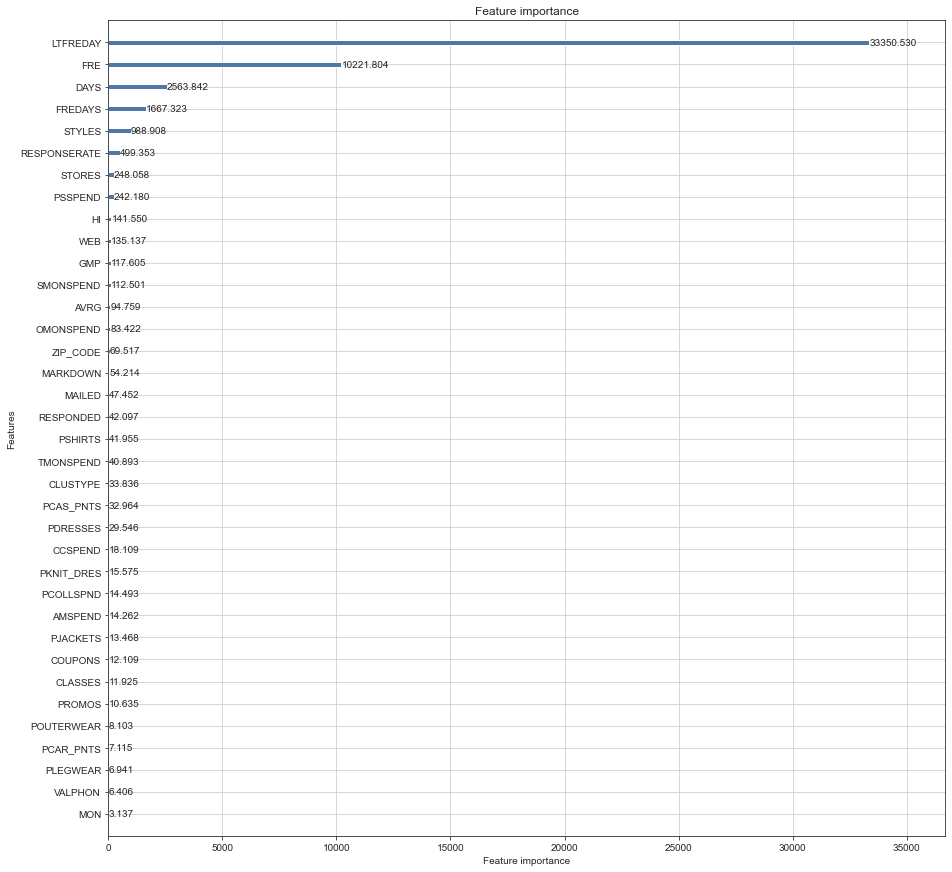

In [32]:
# plot the feature importance of LGBM model

lgb.plot_importance(lgbm, figsize=(15, 15), importance_type='gain')

### Evaluation

### Loss Matrix

<table>
  <tr>
    <th>Actual/ Predicted</th>
    <th>Response</th>
     <th>Unresponsive</th>
  </tr>
  <tr>
    <th>Response</th>
    <td>0</td>
    <td>4</td>
  </tr>
  <tr>
    <th>Unresponsive</th>
    <td>1</td>
    <td>0</td>
  </tr>
</table>

In [45]:
tau = 1/(1+4)
print(f'Decision threshold: tau = {round(tau,3)}')

Decision threshold: tau = 0.2


In [46]:
# Evaluation Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, average_precision_score, log_loss
columns=['Accuracy', 'Sensitivity', 'False Negative Rate', 'F1 Score', 'AUC']
rows=['Logistic', 'Random Forest', 'Model Stacking', 'GBDT', 'Light GBM']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[logistic, random_fc, sclf, GBDT, lgbm]

y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):
    
    y_prob[:, i] = method.predict_proba(X_valid)[:, 1]
    y_pred = (y_prob[:,i] > tau).astype(int)
        
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel() 

    results.iloc[i,0] =  accuracy_score(y_valid, y_pred)
    results.iloc[i,1] =  tp/(tp+fn)
    results.iloc[i,2] =  fp/(tn+fp)
    results.iloc[i,3] =  tp/(tp+0.5*(fp+fn))
    results.iloc[i,4] =  roc_auc_score(y_valid, y_prob[:,i])
   

results.round(4)

,Accuracy,Sensitivity,False Negative Rate,F1 Score,AUC
Logistic,0.7077,0.7050,0.2918,0.4447,0.7813
Random Forest,0.7544,0.7368,0.2421,0.4991,0.8301
Model Stacking,0.8045,0.4391,0.1227,0.4272,0.6788
GBDT,0.7760,0.6981,0.2085,0.5086,0.8432
Light GBM,0.7585,0.7285,0.2355,0.5005,0.8385
